# **Sentiment Analysis**  **(Part - 1)**

#Importing Initial Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# plotting
import seaborn as sns
import matplotlib.pyplot as plt



#Loading Data

The give datasets have data in these range

NKE   ->  12/2017 - 09/2019

IBM   ->  09/2017 - 09/2019

MCD   ->  01/2017 - 09/2019

PG    ->  01/2017 - 09/2019

AAPL  -> 01/2018 - 10/2019

In [ ]:
# Load the data into DataFrame
df = pd.read_csv('PG.csv', error_bad_lines=False)


<ipython-input-2-704ad4c121c7>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('PG.csv', error_bad_lines=False)


In [ ]:
df.head()

Unnamed: 0           author_id                       date_time       Date  \
0           0            45202420  Sun Oct 01 01:04:09 +0000 2017  2017:10:1   
1           1          3170121190  Sun Oct 01 04:52:16 +0000 2017  2017:10:1   
2           2           402353316  Sun Oct 01 05:08:44 +0000 2017  2017:10:1   
3           3          3230471773  Sun Oct 01 08:40:25 +0000 2017  2017:10:1   
4           4  888125801903775744  Sun Oct 01 08:47:50 +0000 2017  2017:10:1   

   favorites  geo                             hashtags                  id  \
0          5  NaN                                  NaN  914294834055274496   
1          0  NaN                               #SP500  914352240210653185   
2          1  NaN  #advertiser #Facebook #digitalmedia  914356383801237504   
3          0  NaN                                  NaN  914409654314323968   
4          0  NaN                                  NaN  914411521056415745   

  mentions                                          permalink  ...  retweets  \
0      NaN  https://twitter.com/clair520/status/9142948340...  ...         2   
1      NaN  https://twitter.com/PortfolioBuzz/status/91435...  ...         0   
2      NaN  https://twitter.com/VistaPResearch/status/9143...  ...         1   
3      NaN  https://twitter.com/FinInvTr/status/9144096543...  ...         0   
4      NaN  https://twitter.com/WeekHerald/status/91441152...  ...         0   

                                                text                name  \
0  Awesome $PG podcast & SWOT Analysis! Love the ...     Clair Lee, M.S.   
1  Trading indices? Check stories for the major c...             FinBuzz   
2  World's biggest #advertiser on challenges of a...  Vista Partners LLC   
3  The Market's Top Companies - Performance Updat...            FinInvTr   
4  Procter & Gamble Company $The $PG Shares Bough...         Week Herald   

      screen_name followers_count  listed_count  friends_count  polarity  \
0        clair520         11519.0          71.0        11315.0  0.659091   
1   PortfolioBuzz          1226.0         558.0          797.0  0.062500   
2  VistaPResearch         12681.0         846.0         2559.0 -0.125000   
3        FinInvTr           171.0          12.0          188.0  0.500000   
4      WeekHerald           571.0          16.0           43.0  0.250000   

   subjectivity  sentiment  
0      0.763636          1  
1      0.500000          1  
2      0.375000         -1  
3      0.500000          1  
4      0.333333          1  

[5 rows x 21 columns]

In [ ]:
# Selecting only Important columns that are useful for the Analysis
feature_columns = ['Date', 'author_id', 'name', 'text', 'followers_count', 'sentiment', 'polarity', 'subjectivity']

df = df[feature_columns]

In [ ]:
#Checking the Size of the dataset
df.shape

(53921, 8)

In [ ]:
#Checking the data types and null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53921 entries, 0 to 53920
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             53921 non-null  object 
 1   author_id        53921 non-null  int64  
 2   name             53921 non-null  object 
 3   text             53921 non-null  object 
 4   followers_count  53921 non-null  float64
 5   sentiment        53921 non-null  int64  
 6   polarity         53921 non-null  float64
 7   subjectivity     53921 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 3.3+ MB


#Setting the Dates Range

In [ ]:
import pandas as pd

# setting date format
df['Date'] = pd.to_datetime(df['Date'], format='%Y:%m:%d')

# Setting Start and End date Variables
start_date = df['Date'].min()
end_date = df['Date'].max()

# Printing the Start and End date of tweets
print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")


Start Date: 2017-01-01 00:00:00
End Date: 2019-09-19 00:00:00


In [ ]:
# Ask for user input to specify the date range
user_start_date = input("Enter the start date From Range above (YYYY-MM-DD): ")
user_end_date = input("Enter the end date (YYYY-MM-DD): ")

# Filter the DataFrame based on user input
mask = (df['Date'] >= user_start_date) & (df['Date'] <= user_end_date)
df = df.loc[mask]


Enter the start date From Range above (YYYY-MM-DD): 2017-01-01
Enter the end date (YYYY-MM-DD): 2019-09-19


In [ ]:
# Print start and end dates
print("Current start date:", df['Date'].min())
print("Current end date:", df['Date'].max())


Current start date: 2017-01-01 00:00:00
Current end date: 2019-09-19 00:00:00


In [ ]:
df.head()

Date           author_id                name  \
0 2017-10-01            45202420     Clair Lee, M.S.   
1 2017-10-01          3170121190             FinBuzz   
2 2017-10-01           402353316  Vista Partners LLC   
3 2017-10-01          3230471773            FinInvTr   
4 2017-10-01  888125801903775744         Week Herald   

                                                text  followers_count  \
0  Awesome $PG podcast & SWOT Analysis! Love the ...          11519.0   
1  Trading indices? Check stories for the major c...           1226.0   
2  World's biggest #advertiser on challenges of a...          12681.0   
3  The Market's Top Companies - Performance Updat...            171.0   
4  Procter & Gamble Company $The $PG Shares Bough...            571.0   

   sentiment  polarity  subjectivity  
0          1  0.659091      0.763636  
1          1  0.062500      0.500000  
2         -1 -0.125000      0.375000  
3          1  0.500000      0.500000  
4          1  0.250000      0.333333

In [ ]:
df.shape

(53921, 8)

#EDA

##Visualizing

Plotting Sentiment Distribution

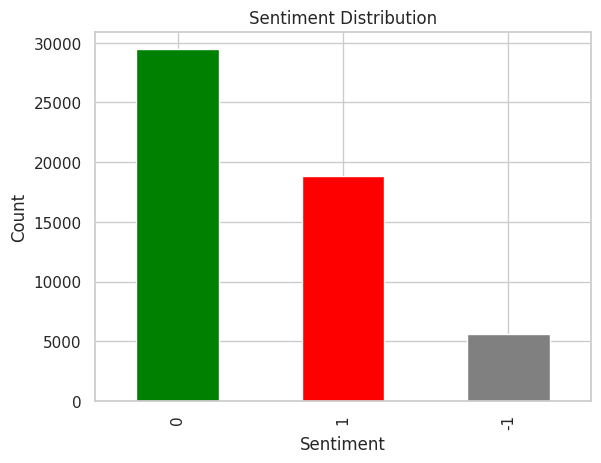

In [ ]:

# Plotting the sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Ploting the Polarity from the dataset

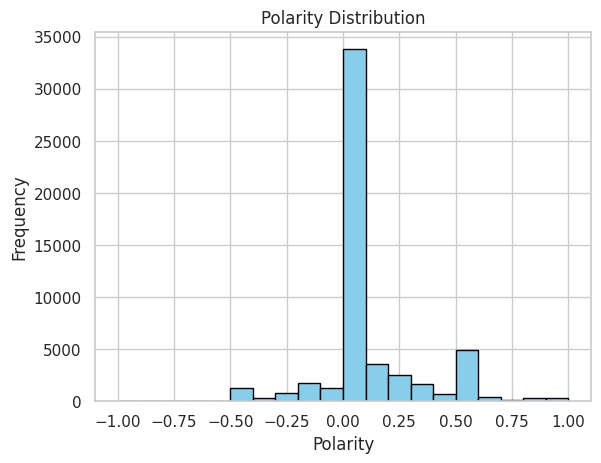

In [ ]:

# Plotting the polarity distribution
plt.hist(df['polarity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()


Ploting the Posts with respect to time

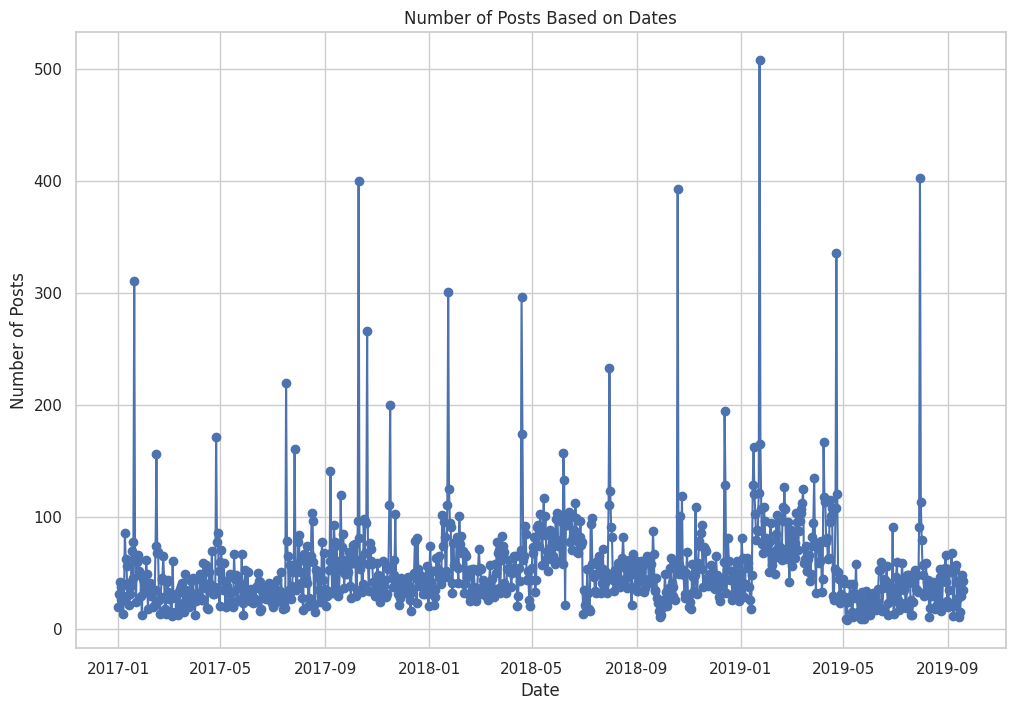

In [ ]:
# Setting date in format
df['Date'] = pd.to_datetime(df['Date'])

# Group by date and counting the number of posts
posts_by_date = df.groupby('Date').size().reset_index(name='Number of Posts')

# Plotting the Number of Posts based on Dates
plt.figure(figsize=(12, 8))
plt.plot(posts_by_date['Date'], posts_by_date['Number of Posts'], marker='o')
plt.title('Number of Posts Based on Dates')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()

Checking Top 10 Posts by Followers Count

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127963 (\N{CLASSICAL BUILDING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


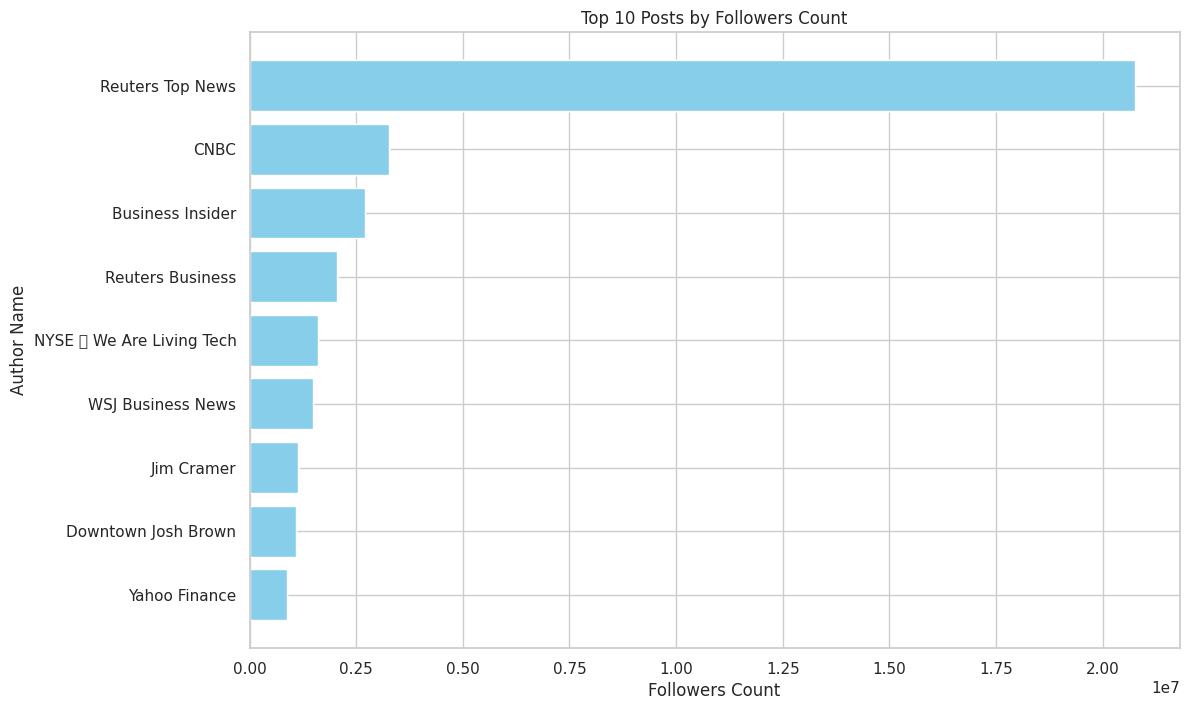

In [ ]:
# Getting the top 10 'followers_count' in descending order
top_10_posts = df.sort_values(by='followers_count', ascending=False).head(50)

# Plotting the top 10 user account who have most followers
plt.figure(figsize=(12, 8))
plt.barh(top_10_posts['name'], top_10_posts['followers_count'], color='skyblue')
plt.xlabel('Followers Count')
plt.ylabel('Author Name')
plt.title('Top 10 Posts by Followers Count')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest count at the top
plt.show()


Followers count with polarity

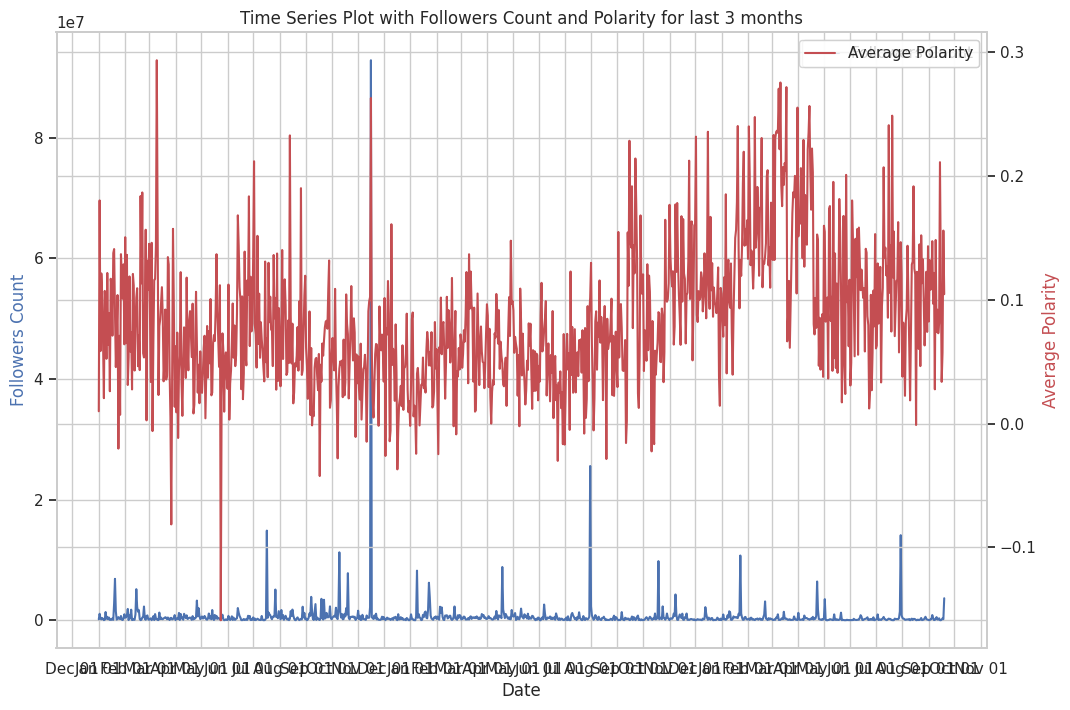

In [ ]:
# Library for certain dates extract
import matplotlib.dates as mdates

# Grouping by date and aggregating followers_count and polarity
agg_df = df.groupby('Date').agg({'followers_count': 'sum', 'polarity': 'mean'}).reset_index()

# Plotting time series with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting followers_count on the left y-axis
sns.lineplot(x='Date', y='followers_count', data=agg_df, ax=ax1, color='b', label='Followers Count')
ax1.set_xlabel('Date')
ax1.set_ylabel('Followers Count', color='b')

# Formatting x-axis ticks
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# Creating a second y-axis for polarity
ax2 = ax1.twinx()
sns.lineplot(x='Date', y='polarity', data=agg_df, ax=ax2, color='r', label='Average Polarity')
ax2.set_ylabel('Average Polarity', color='r')

plt.title('Time Series Plot with Followers Count and Polarity for last 3 months')
plt.show()


##Correlation

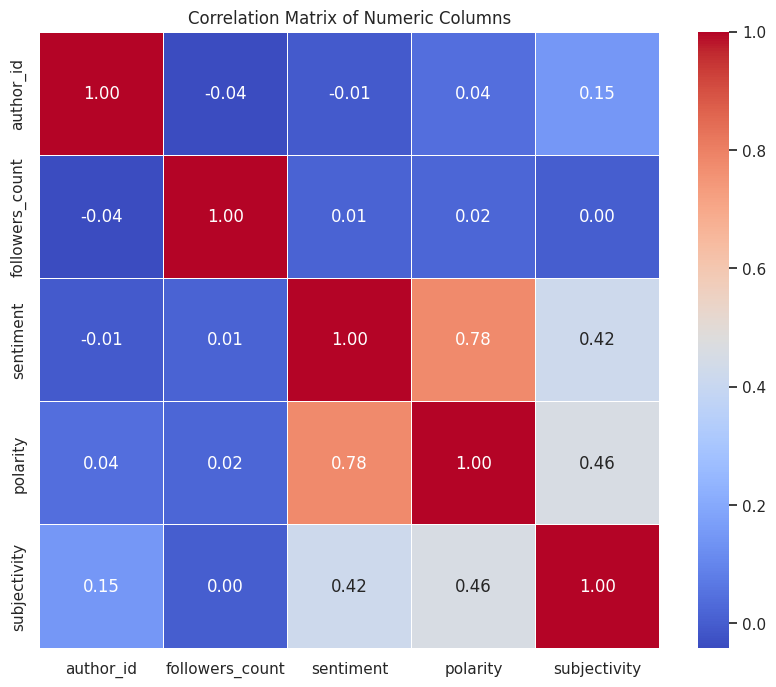

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with numeric columns
numeric_columns = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


#Text Pre Processing

## Check for null values and remove them

In [ ]:
# Getting  regular expressions Library
import re

# Function to remove stock tags to make sentences simple
def remove_words_except_stocktag(text):
    if pd.isna(text):
        return text

    words = text.split()
    filtered_words = [word for word in words if not word.startswith('$') or word == '$MSFT']
    return ' '.join(filtered_words)

# Apply the custom function to the 'text' column
df['cleaned_text'] = df['text'].apply(remove_words_except_stocktag)


In [ ]:
# Function to remove URLs from the text
def remove_urls_and_twitter(text):
    if pd.isna(text):
        return text

    # Remove URLs starting with http/https and Twitter-like patterns
    cleaned_text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|//twitter\.com/\S+|pic\.twitter\.com/\S+', '', text)
    return cleaned_text.strip()

# Apply the custom function to the 'text' column
df['cleaned_text'] = df['text'].apply(remove_urls_and_twitter)



In [ ]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()
# Display the columns with null values (if any)
print("Columns with null values:")
print(null_values[null_values > 0])


Columns with null values:
Series([], dtype: int64)


In [ ]:
# Remove rows with null values
df = df.dropna()

In [ ]:
df.shape

(53921, 9)

In [ ]:
df.head()

Date           author_id                name  \
0 2017-10-01            45202420     Clair Lee, M.S.   
1 2017-10-01          3170121190             FinBuzz   
2 2017-10-01           402353316  Vista Partners LLC   
3 2017-10-01          3230471773            FinInvTr   
4 2017-10-01  888125801903775744         Week Herald   

                                                text  followers_count  \
0  Awesome $PG podcast & SWOT Analysis! Love the ...          11519.0   
1  Trading indices? Check stories for the major c...           1226.0   
2  World's biggest #advertiser on challenges of a...          12681.0   
3  The Market's Top Companies - Performance Updat...            171.0   
4  Procter & Gamble Company $The $PG Shares Bough...            571.0   

   sentiment  polarity  subjectivity  \
0          1  0.659091      0.763636   
1          1  0.062500      0.500000   
2         -1 -0.125000      0.375000   
3          1  0.500000      0.500000   
4          1  0.250000      0.333333   

                                        cleaned_text  
0  Awesome $PG podcast & SWOT Analysis! Love the ...  
1  Trading indices? Check stories for the major c...  
2  World's biggest #advertiser on challenges of a...  
3  The Market's Top Companies - Performance Updat...  
4  Procter & Gamble Company $The $PG Shares Bough...

##Checking Missing Values and Dublicates

In [ ]:
# Function for Missing Value/Empty Values in whole dataframe
def missing_value_analysis(dataframe):
    # Check for missing values in the dataframe
    missing_values = dataframe.isnull().sum()

    # Print the missing values for each feature
    print("Missing Values Analysis:")
    print(missing_values[missing_values > 0])

# Apply missing value analysis to your social media dataset
missing_value_analysis(df)


Missing Values Analysis:
Series([], dtype: int64)


In [ ]:
# # Function for Duplicated Variable Analysis
# def duplicated_variable_analysis(dataframe):
#     # Check for duplicated columns
#     duplicated_columns = dataframe.columns[dataframe.T.duplicated()]

#     # Print the duplicated columns
#     print("Duplicated Variable Analysis:")
#     print(duplicated_columns)

#     # Remove duplicated columns from the dataframe
#     dataframe = dataframe.loc[:, ~dataframe.columns.duplicated()]

#     return dataframe

# # Apply duplicated variable analysis to your social media dataset
# df = duplicated_variable_analysis(df)


##Removing Links and urls

In [ ]:
#Importing necessery Libraries for cleaning texts
from html import unescape
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Instantiate the lemmatizer and tokenizer for text
lemmatizer = WordNetLemmatizer()
tokenizer = TweetTokenizer()

# Get English stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove HTML encodings
    text = unescape(text)

    # Remove user IDs
    text = re.sub(r'@[^\s]+', '', text)

    # Remove retweet symbols
    text = re.sub(r'^RT[\s]+', '', text)

    # Replace URLs in different forms
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '_url', text)

    # Tokenize and lemmatize the senteces into words
    words = tokenizer.tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words]

    # Remove stopwords
    words = [word for word in words if word.lower() not in stop_words]

    # Join the cleaned words back into a sentence
    cleaned_text = ' '.join(words)

    return cleaned_text

# Apply the cleaning function to the 'cleaned_text' column
df['cleaned_text'] = df['cleaned_text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


##Checking Spellings and Contractions

In [ ]:

# # Function for Correcting the spell mistakes


# # Function to normalize the elongated words
# def correct_word_elongation(text):
#     # Correct word elongation, e.g., 'victoryyyyy' to 'victory'
#     text = re.sub(r'(\w)\1+', r'\1\1', text)
#     return text

# # Function for
# def correct_contractions(text):
#     # Correct common word contractions
#     text = re.sub(r"won't", "will not", text)
#     text = re.sub(r"can't", "cannot", text)
#     text = re.sub(r"don't", "do not", text)
#     text = re.sub(r"shouldn't", "should not", text)
#     text = re.sub(r"didn't", "did not", text)
#     return text

# def clean_numeric_symbols(text):
#     # Remove unnecessary apostrophes and punctuation splits from the last word in a sentence
#     text = re.sub(r"'\s", "", text)
#     text = re.sub(r"(\S+)'\Z", r"\1", text)

#     # Verify numeric value types, such as float and whole numbers
#     # Join symbols with their respective words, e.g., '$ AAPL' to '$AAPL'
#     text = re.sub(r'(\$)\s?([A-Za-z]+)', r'\1\2', text)

#     return text

# # Apply the all above functions to the 'cleaned_text' column
# df['cleaned_text'] = df['cleaned_text'].apply(correct_spelling_mistakes)
# df['cleaned_text'] = df['cleaned_text'].apply(correct_word_elongation)
# df['cleaned_text'] = df['cleaned_text'].apply(correct_contractions)
# df['cleaned_text'] = df['cleaned_text'].apply(clean_numeric_symbols)


In [ ]:
# Function to correct the end of words
def correct_apostrophes_and_punctuation(text):
    # Correct unnecessary apostrophes at the end of words
    text = re.sub(r'(\w+)’', r'\1\'', text)

    # Correct punctuation splits from the last word in a sentence
    text = re.sub(r'(\w+)([.,;!?])\s*$', r'\1\2', text)

    return text

df['cleaned_text'] = df['cleaned_text'].apply(correct_apostrophes_and_punctuation)

In [ ]:
# Getting Library for for pluralizing and singularizing English words
import inflect

# Function to convert extensions in integers
def convert_ordinal_words(text):
    # Initialize the inflect engine
    p = inflect.engine()

    # Split the text into words and process each word
    words = text.split()
    for i, word in enumerate(words):
        # Check if the word is an ordinal word (e.g., '1st', '#1')
        if word.lower() in ['1st', '#1', '2nd', '3rd'] or word.lower().endswith(('th', 'nd', 'rd', 'st')):
            # Extract the numeric part before 'st', 'nd', 'rd', or 'th'
            numeric_part = word[:-2] if word[:-2].isdigit() else word[:-3]

            try:
                # Convert the ordinal word to its numeric counterpart
                numeric_representation = p.ordinal(int(numeric_part))
                words[i] = numeric_representation
            except ValueError:
                # Handle the case where conversion to int fails
                pass

    # Rejoin the words to form the corrected text
    corrected_text = ' '.join(words)

    return corrected_text

df['cleaned_text'] = df['cleaned_text'].apply(convert_ordinal_words)

In [ ]:
df.head()

Date           author_id                name  \
0 2017-10-01            45202420     Clair Lee, M.S.   
1 2017-10-01          3170121190             FinBuzz   
2 2017-10-01           402353316  Vista Partners LLC   
3 2017-10-01          3230471773            FinInvTr   
4 2017-10-01  888125801903775744         Week Herald   

                                                text  followers_count  \
0  Awesome $PG podcast & SWOT Analysis! Love the ...          11519.0   
1  Trading indices? Check stories for the major c...           1226.0   
2  World's biggest #advertiser on challenges of a...          12681.0   
3  The Market's Top Companies - Performance Updat...            171.0   
4  Procter & Gamble Company $The $PG Shares Bough...            571.0   

   sentiment  polarity  subjectivity  \
0          1  0.659091      0.763636   
1          1  0.062500      0.500000   
2         -1 -0.125000      0.375000   
3          1  0.500000      0.500000   
4          1  0.250000      0.333333   

                                        cleaned_text  
0  Awesome $ PG podcast & SWOT Analysis ! Love ne...  
1  Trading index ? Check story major constituent ...  
2  World's biggest #advertiser challenge ad place...  
3  Market's Top Companies - Performance Update $ ...  
4  Procter & Gamble Company $ $ PG Shares Bought ...

Removing the other specific URLs like twitter.com

In [ ]:

# Function to remove specific patterns
def remove_patterns(text):
    patterns_to_remove = [
        r'pic.twitter.com/\S+',  # Remove pic.twitter.com URLs
        r'\$\w+',                # Remove $ followed by a name
        r'https://twitter.com/\S+',  # Remove Twitter URLs
        r'http[s]?://\S+',       # Remove other URLs
        r'\d+'                   # Remove numbers
    ]
    for pattern in patterns_to_remove:
        text = re.sub(pattern, '', text)
    return text

# Apply the function to the 'text' column
df['cleaned_text'] = df['cleaned_text'].apply(remove_patterns)

Removing different URLs patterns

In [ ]:
#  Function to remove specific patterns in URLs
def remove_patterns(text):
    patterns_to_remove = [
        r'pic.twitter.com/\S+',  # Remove pic.twitter.com URLs
        r'\$\w+',                # Remove $ followed by a name
        r'https://twitter.com/\S+',  # Remove Twitter URLs
        r'http[s]?://\S+',       # Remove other URLs
        r'\d+',                  # Remove numbers
        r'#\w+',                 # Remove hashtags
        r'\(Min[^)]+\)',         # Remove patterns like (Min , Daily EMA > , Close > EMA, Vol > K, Opt Vol in any strike > )
        r'-{2,}',                # Remove consecutive dashes
        r'\d+\%',                # Remove percentages
        r'\.\.\.+',              # Remove ellipses
        r'@\w+',                 # Remove mentions
        r',\s+',                 # Remove commas followed by spaces
        r'\s+[.,]+',             # Remove spaces followed by dots or commas
        r'\s+\.{3}',             # Remove spaces followed by three dots
        r'\s+[^\w\s]',           # Remove other non-alphanumeric characters
    ]
    for pattern in patterns_to_remove:
        text = re.sub(pattern, ' ', text)
    return text.strip()

# Apply the function to the 'text' column
df['cleaned_text'] = df['cleaned_text'].apply(remove_patterns)



## Spacy for Core Meaning Extraction

In [ ]:
!pip install spacy


In [ ]:
import pandas as pd
import spacy

# Load spaCy model from web
nlp = spacy.load("en_core_web_sm")

# Function to extract the core meaning from text
def extract_core_meaning(text):
    doc = nlp(text)
    core_meaning = ' '.join([token.lemma_ for token in doc if token.pos_ not in ('PUNCT', 'SPACE')])

    return core_meaning

# Apply the function to the 'cleaned_text' column
df['core_meaning'] = df['cleaned_text'].apply(extract_core_meaning)


In [ ]:
df.head()

##Tokenization

In [ ]:
#If the Spacy is taking too long time you can use this code to directly assign cleaned code as core meaning because it's almost neat
df['core_meaning'] = df['cleaned_text']

In [ ]:
#mporting Tokenization Libraries

from bs4 import BeautifulSoup              # Parsing HTML content

import nltk                                # Natural Language Toolkit for working with human language data
from nltk.tokenize import word_tokenize    # tokenizing sentences into words
from nltk.corpus import stopwords          # Remove common words
from nltk.stem import PorterStemmer        # For stemming, reducing words to their base or root form


nltk.download('punkt')

# Tokenization of sentences into words
df['tokens'] = df['core_meaning'].apply(lambda x: word_tokenize(x))

# Removing Stop Words
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Joining Tokens and finalizing it as clean tweets
df['clean_tweets'] = df['tokens'].apply(lambda x: ' '.join(x))


In [ ]:
df.head()

Date           author_id                name  \
0 2017-10-01            45202420     Clair Lee, M.S.   
1 2017-10-01          3170121190             FinBuzz   
2 2017-10-01           402353316  Vista Partners LLC   
3 2017-10-01          3230471773            FinInvTr   
4 2017-10-01  888125801903775744         Week Herald   

                                                text  followers_count  \
0  Awesome $PG podcast & SWOT Analysis! Love the ...          11519.0   
1  Trading indices? Check stories for the major c...           1226.0   
2  World's biggest #advertiser on challenges of a...          12681.0   
3  The Market's Top Companies - Performance Updat...            171.0   
4  Procter & Gamble Company $The $PG Shares Bough...            571.0   

   sentiment  polarity  subjectivity  \
0          1  0.659091      0.763636   
1          1  0.062500      0.500000   
2         -1 -0.125000      0.375000   
3          1  0.500000      0.500000   
4          1  0.250000      0.333333   

                                        cleaned_text  \
0  Awesome  PG podcast  SWOT Analysis  Love new p...   
1  Trading index  Check story major constituent  ...   
2  World's biggest   challenge ad placement   PG ...   
3  Market's Top Companies  Performance Update  DI...   
4  Procter  Gamble Company   PG Shares Bought Fir...   

                                        core_meaning  \
0  Awesome  PG podcast  SWOT Analysis  Love new p...   
1  Trading index  Check story major constituent  ...   
2  World's biggest   challenge ad placement   PG ...   
3  Market's Top Companies  Performance Update  DI...   
4  Procter  Gamble Company   PG Shares Bought Fir...   

                                              tokens  \
0  [Awesome, PG, podcast, SWOT, Analysis, Love, n...   
1  [Trading, index, Check, story, major, constitu...   
2  [World, 's, biggest, challenge, ad, placement,...   
3  [Market, 's, Top, Companies, Performance, Upda...   
4  [Procter, Gamble, Company, PG, Shares, Bought,...   

                                        clean_tweets  
0  Awesome PG podcast SWOT Analysis Love new podc...  
1  Trading index Check story major constituent CV...  
2  World 's biggest challenge ad placement PG DIA...  
3  Market 's Top Companies Performance Update DIS...  
4  Procter Gamble Company PG Shares Bought First ...

#VADER Sentiment Analysis

In [ ]:
# Import the SentimentIntensityAnalyzer from the NLTK's VADER module
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Import the nltk library
import nltk

# Download the VADER lexicon which is a pre-built list of words and their sentiment scores
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Function to apply VADER sentiment analysis and create 'vader_sentiment_score' column
def get_vader_sentiment(row):
    # Use the VADER sentiment analyzer on the cleaned text
    sentiment_scores = sia.polarity_scores(row['clean_tweets'])

    # Assign the compound sentiment score to a new column 'vader_sentiment_score'
    row['vader_sentiment_score'] = sentiment_scores['compound']

    return row


In [ ]:
# Apply the function to each row in the DataFrame
df = df.apply(get_vader_sentiment, axis=1)


In [ ]:
df.head()

Date           author_id                name  \
0 2017-10-01            45202420     Clair Lee, M.S.   
1 2017-10-01          3170121190             FinBuzz   
2 2017-10-01           402353316  Vista Partners LLC   
3 2017-10-01          3230471773            FinInvTr   
4 2017-10-01  888125801903775744         Week Herald   

                                                text  followers_count  \
0  Awesome $PG podcast & SWOT Analysis! Love the ...          11519.0   
1  Trading indices? Check stories for the major c...           1226.0   
2  World's biggest #advertiser on challenges of a...          12681.0   
3  The Market's Top Companies - Performance Updat...            171.0   
4  Procter & Gamble Company $The $PG Shares Bough...            571.0   

   sentiment  polarity  subjectivity  \
0          1  0.659091      0.763636   
1          1  0.062500      0.500000   
2         -1 -0.125000      0.375000   
3          1  0.500000      0.500000   
4          1  0.250000      0.333333   

                                        cleaned_text  \
0  Awesome  PG podcast  SWOT Analysis  Love new p...   
1  Trading index  Check story major constituent  ...   
2  World's biggest   challenge ad placement   PG ...   
3  Market's Top Companies  Performance Update  DI...   
4  Procter  Gamble Company   PG Shares Bought Fir...   

                                        core_meaning  \
0  Awesome  PG podcast  SWOT Analysis  Love new p...   
1  Trading index  Check story major constituent  ...   
2  World's biggest   challenge ad placement   PG ...   
3  Market's Top Companies  Performance Update  DI...   
4  Procter  Gamble Company   PG Shares Bought Fir...   

                                              tokens  \
0  [Awesome, PG, podcast, SWOT, Analysis, Love, n...   
1  [Trading, index, Check, story, major, constitu...   
2  [World, 's, biggest, challenge, ad, placement,...   
3  [Market, 's, Top, Companies, Performance, Upda...   
4  [Procter, Gamble, Company, PG, Shares, Bought,...   

                                        clean_tweets  vader_sentiment_score  
0  Awesome PG podcast SWOT Analysis Love new podc...                 0.9559  
1  Trading index Check story major constituent CV...                 0.0000  
2  World 's biggest challenge ad placement PG DIA...                 0.0772  
3  Market 's Top Companies Performance Update DIS...                 0.2023  
4  Procter Gamble Company PG Shares Bought First ...                 0.6705

#TextBlob Sentiment Analysis

In [ ]:
# Import the TextBlob class from the textblob module
from textblob import TextBlob

# Function to get sentiment score using TextBlob
def get_sentiment_score(tweet):
    # Check if the tweet is empty or NaN
    if not tweet or pd.isnull(tweet):
        return None

    # Create a TextBlob object for the tweet
    blob = TextBlob(tweet)

    # Return the sentiment polarity score
    return blob.sentiment.polarity

# Apply the TextBlob sentiment analysis and create 'TextBlob_sentiment_score' column
df['TextBlob_sentiment_score'] = df['clean_tweets'].apply(get_sentiment_score)


In [ ]:
df.head()

Date           author_id                name  \
0 2017-10-01            45202420     Clair Lee, M.S.   
1 2017-10-01          3170121190             FinBuzz   
2 2017-10-01           402353316  Vista Partners LLC   
3 2017-10-01          3230471773            FinInvTr   
4 2017-10-01  888125801903775744         Week Herald   

                                                text  followers_count  \
0  Awesome $PG podcast & SWOT Analysis! Love the ...          11519.0   
1  Trading indices? Check stories for the major c...           1226.0   
2  World's biggest #advertiser on challenges of a...          12681.0   
3  The Market's Top Companies - Performance Updat...            171.0   
4  Procter & Gamble Company $The $PG Shares Bough...            571.0   

   sentiment  polarity  subjectivity  \
0          1  0.659091      0.763636   
1          1  0.062500      0.500000   
2         -1 -0.125000      0.375000   
3          1  0.500000      0.500000   
4          1  0.250000      0.333333   

                                        cleaned_text  \
0  Awesome  PG podcast  SWOT Analysis  Love new p...   
1  Trading index  Check story major constituent  ...   
2  World's biggest   challenge ad placement   PG ...   
3  Market's Top Companies  Performance Update  DI...   
4  Procter  Gamble Company   PG Shares Bought Fir...   

                                        core_meaning  \
0  Awesome  PG podcast  SWOT Analysis  Love new p...   
1  Trading index  Check story major constituent  ...   
2  World's biggest   challenge ad placement   PG ...   
3  Market's Top Companies  Performance Update  DI...   
4  Procter  Gamble Company   PG Shares Bought Fir...   

                                              tokens  \
0  [Awesome, PG, podcast, SWOT, Analysis, Love, n...   
1  [Trading, index, Check, story, major, constitu...   
2  [World, 's, biggest, challenge, ad, placement,...   
3  [Market, 's, Top, Companies, Performance, Upda...   
4  [Procter, Gamble, Company, PG, Shares, Bought,...   

                                        clean_tweets  vader_sentiment_score  \
0  Awesome PG podcast SWOT Analysis Love new podc...                 0.9559   
1  Trading index Check story major constituent CV...                 0.0000   
2  World 's biggest challenge ad placement PG DIA...                 0.0772   
3  Market 's Top Companies Performance Update DIS...                 0.2023   
4  Procter Gamble Company PG Shares Bought First ...                 0.6705   

   TextBlob_sentiment_score  
0                  0.659091  
1                  0.062500  
2                  0.000000  
3                  0.500000  
4                  0.250000

# Ploting all Sentiment Scores

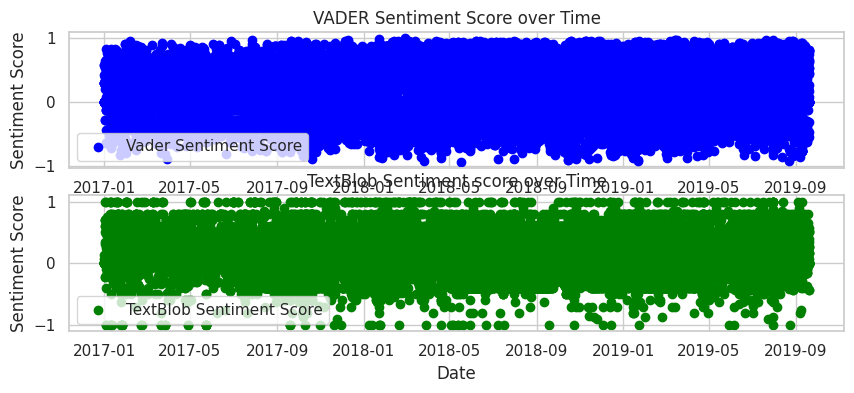

In [ ]:
# Defining the figure size
plt.figure(figsize=(10, 6))

# Plotting Vader Sentiment Score
plt.subplot(3, 1, 1)
plt.scatter(df['Date'], df['vader_sentiment_score'], color='blue', label='Vader Sentiment Score')
plt.title('VADER Sentiment Score over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()

# Plotting TextBlob Sentiment Score
plt.subplot(3, 1, 2)
plt.scatter(df['Date'], df['TextBlob_sentiment_score'], color='green', label='TextBlob Sentiment Score')
plt.title('TextBlob Sentiment score over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()


Monthly Aggregated Sentimental Score

<ipython-input-371-9db49f592f4a>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekly = df.groupby(df['Date'].dt.to_period("W")).mean().reset_index()


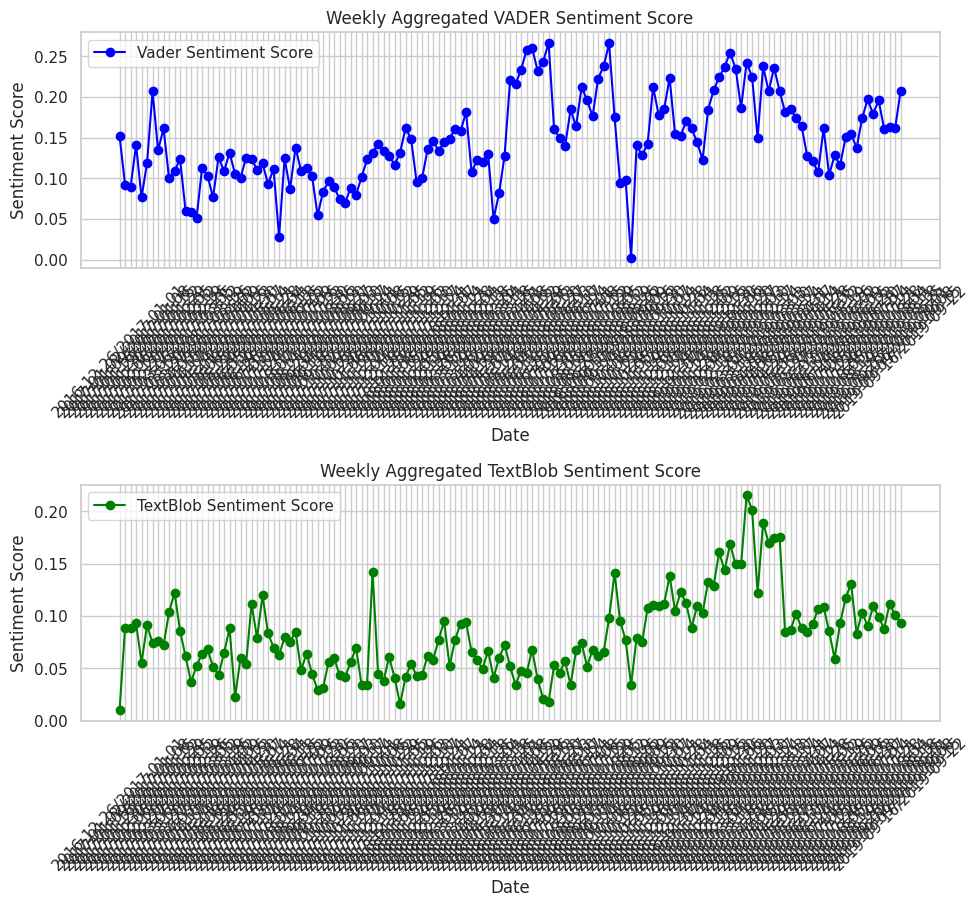

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Weekly aggregation of sentiment scores
df_weekly = df.groupby(df['Date'].dt.to_period("W")).mean().reset_index()

# Convert 'Date' to string
df_weekly['Date'] = df_weekly['Date'].astype(str)

# Defining the figure size
plt.figure(figsize=(10, 12))  # Increase figure height for gaps

# Plotting Vader Sentiment Score
plt.subplot(3, 1, 1)
plt.plot(df_weekly['Date'], df_weekly['vader_sentiment_score'], color='blue', label='Vader Sentiment Score', marker='o')
plt.title('Weekly Aggregated VADER Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels

# Add some space between subplots
plt.subplots_adjust(hspace=0.5)

# Plotting TextBlob Sentiment Score
plt.subplot(3, 1, 2)
plt.plot(df_weekly['Date'], df_weekly['TextBlob_sentiment_score'], color='green', label='TextBlob Sentiment Score', marker='o')
plt.title('Weekly Aggregated TextBlob Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


#Final Sentiment Score

In [ ]:
# Make a new column final_sentiment_score by meaning the three sentiment scores
# Define weights for each sentiment score
vader_weight = 0.7
textblob_weight = 0.3


# Calculate the weighted average
df['final_sentiment_score'] = (df['vader_sentiment_score'] * vader_weight +
                               df['TextBlob_sentiment_score'] * textblob_weight)



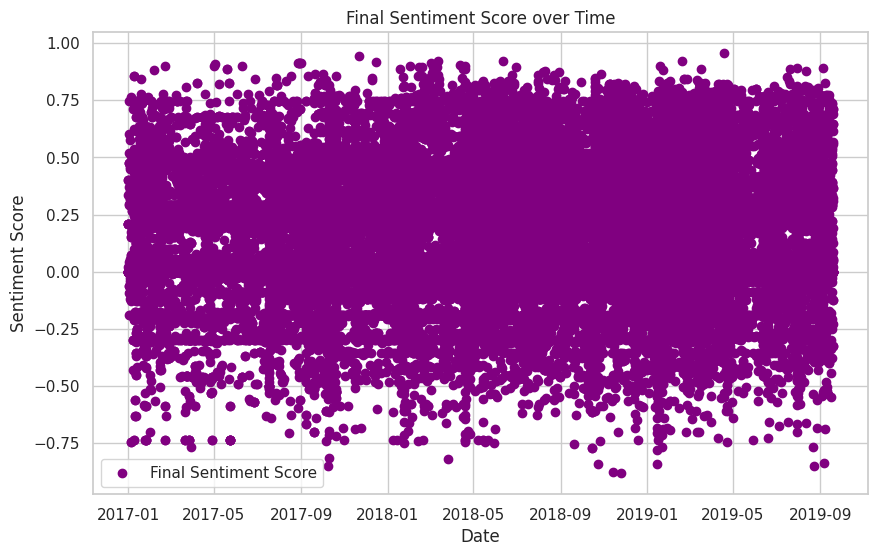

In [ ]:

# Plotting 'final_sentiment_score' over time
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['final_sentiment_score'], color='purple', label='Final Sentiment Score')
plt.title('Final Sentiment Score over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()


<ipython-input-374-e67e1c13b436>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekly_final = df.groupby(df['Date'].dt.to_period("W")).mean().reset_index()


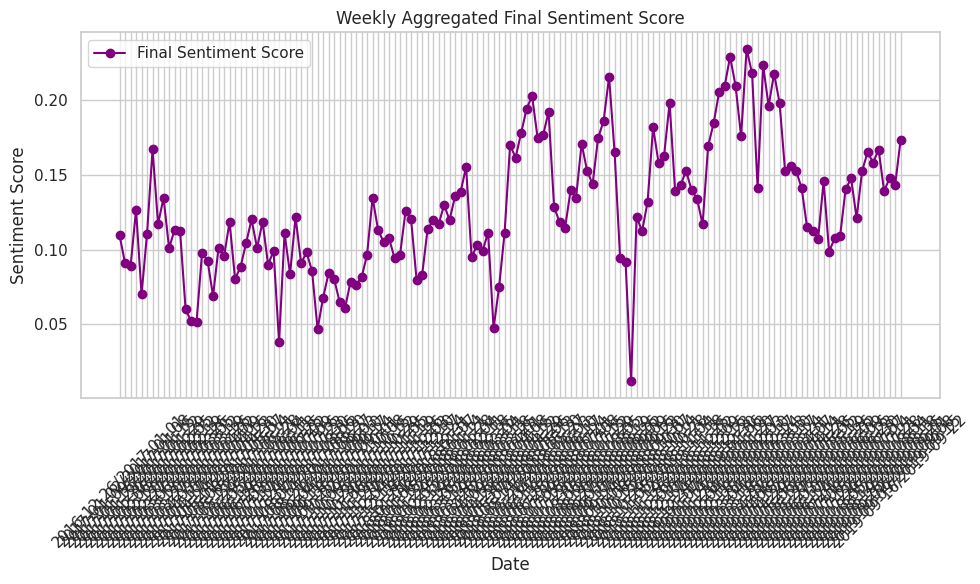

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Weekly aggregation of final_sentiment_score
df_weekly_final = df.groupby(df['Date'].dt.to_period("W")).mean().reset_index()

# Convert 'Date' to string
df_weekly_final['Date'] = df_weekly_final['Date'].astype(str)

# Defining the figure size
plt.figure(figsize=(10, 6))

# Plotting Final Sentiment Score
plt.plot(df_weekly_final['Date'], df_weekly_final['final_sentiment_score'], color='purple', label='Final Sentiment Score', marker='o')
plt.title('Weekly Aggregated Final Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


<ipython-input-375-70eb45e4c302>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly_final = df.groupby(df['Date'].dt.to_period("M")).mean().reset_index()


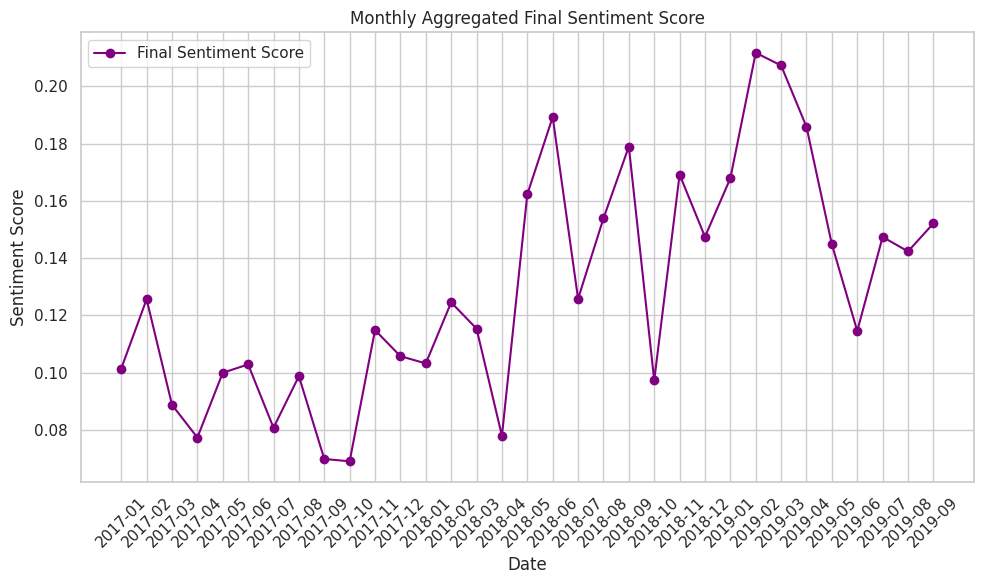

In [ ]:
# Monthly aggregation of final_sentiment_score
df_monthly_final = df.groupby(df['Date'].dt.to_period("M")).mean().reset_index()

# Convert 'Date' to string
df_monthly_final['Date'] = df_monthly_final['Date'].astype(str)

# Defining the figure size
plt.figure(figsize=(10, 6))

# Plotting Final Sentiment Score
plt.plot(df_monthly_final['Date'], df_monthly_final['final_sentiment_score'], color='purple', label='Final Sentiment Score', marker='o')
plt.title('Monthly Aggregated Final Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


#Feature Engineering

## Sentiment Features

In [ ]:
!pip install wordcloud matplotlib

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

# Separate positive and negative words based on the sentiment score
positive_words = ' '.join(df[df['vader_sentiment_score'] > 0]['text'])
negative_words = ' '.join(df[df['vader_sentiment_score'] < 0]['text'])

# Generate WordCloud for positive words
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_words)

# Generate WordCloud for negative words
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_words)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


(-0.5, 799.5, 399.5, -0.5)

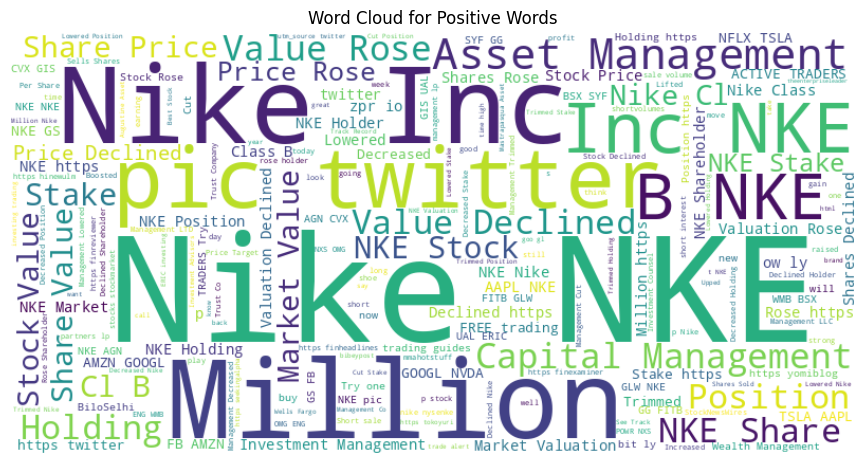

In [ ]:
# Plot WordCloud for positive words
plt.figure(figsize=(24, 12))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Words')
plt.axis('off')


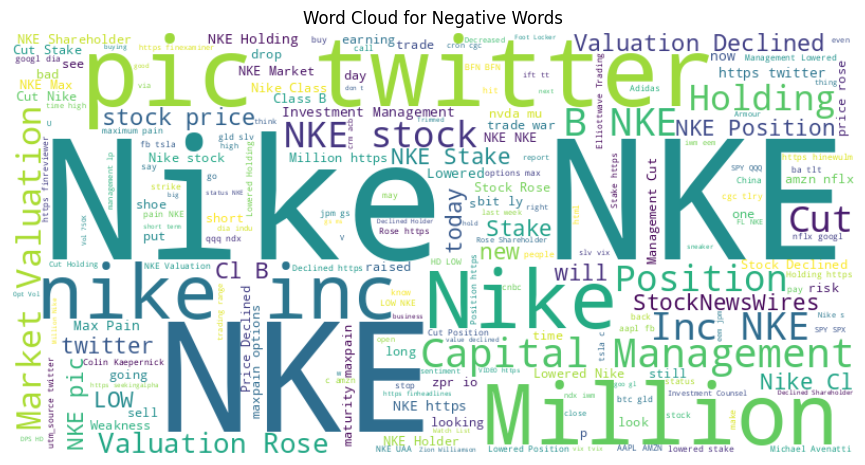

In [ ]:
# Plot WordCloud for negative words
plt.figure(figsize=(24, 12))
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Words')
plt.axis('off')

plt.show()


##Integer Linguistic Features

In [ ]:
# Function for counting the exclamation and question marks in the text
def count_continuous_punctuation(text, punctuation):
    # Count continuous occurrences of the specified punctuation in the text
    pattern = re.compile(f'{re.escape(punctuation)}+')  # Create a regex pattern for continuous occurrences
    matches = re.findall(pattern, text)  # Find all matches in the text
    return len(matches)  # Return the count of continuous occurrences

# Add 'continuous_exclamation' and 'continuous_question' columns to your DataFrame
df['continuous_exclamation'] = df['cleaned_text'].apply(lambda x: count_continuous_punctuation(x, '!'))
# Count continuous exclamation marks in the 'cleaned_text' column and create a new column 'continuous_exclamation'

df['continuous_question'] = df['cleaned_text'].apply(lambda x: count_continuous_punctuation(x, '?'))
# Count continuous question marks in the 'cleaned_text' column and create a new column 'continuous_question'


In [ ]:
# Function for finding continuous Capital Words because they represent some important information
def count_capitalized_words(text):
    # Count the number of capitalized words in the text
    words = text.split()  # Split the text into a list of words
    capitalized_words = [word for word in words if word.isupper()]  # Create a list of capitalized words
    return len(capitalized_words)  # Return the count of capitalized words

# Add 'capitalized_words' column to your DataFrame
df['capitalized_words'] = df['text'].apply(count_capitalized_words)


In [ ]:
# Funtion to count the dollar signs as they represent the high raise/decrease in stock
def count_dollar_signs(text):
    # Count the number of dollar signs in the text
    return text.count('$')

# Apply to my df
df['dollar_signs'] = df['text'].apply(count_dollar_signs)


In [ ]:
# Counting hashtags to understand the importance of versatility of the posts
def count_hashtags(text):
  return text.count('#')


df['num_hashtags'] = df['text'].apply(count_hashtags)

In [ ]:
# Checking the word count of each sentence
from nltk.tokenize import word_tokenize
from tqdm import tqdm  # showing progress

tqdm.pandas()  # for showing progress


# convert text to string
df['cleaned_text'] = df['cleaned_text'].astype(str)

# Tokenize the cleaned_text column
df['tokens'] = df['cleaned_text'].progress_apply(word_tokenize)

# Calculate word count for each row
df['word_count'] = df['tokens'].apply(len)

# Group by Date and sum the word counts
word_count_by_date = df.groupby('Date')['word_count'].sum().reset_index()



100%|██████████| 53921/53921 [00:07<00:00, 6925.84it/s]


## Plotting Features

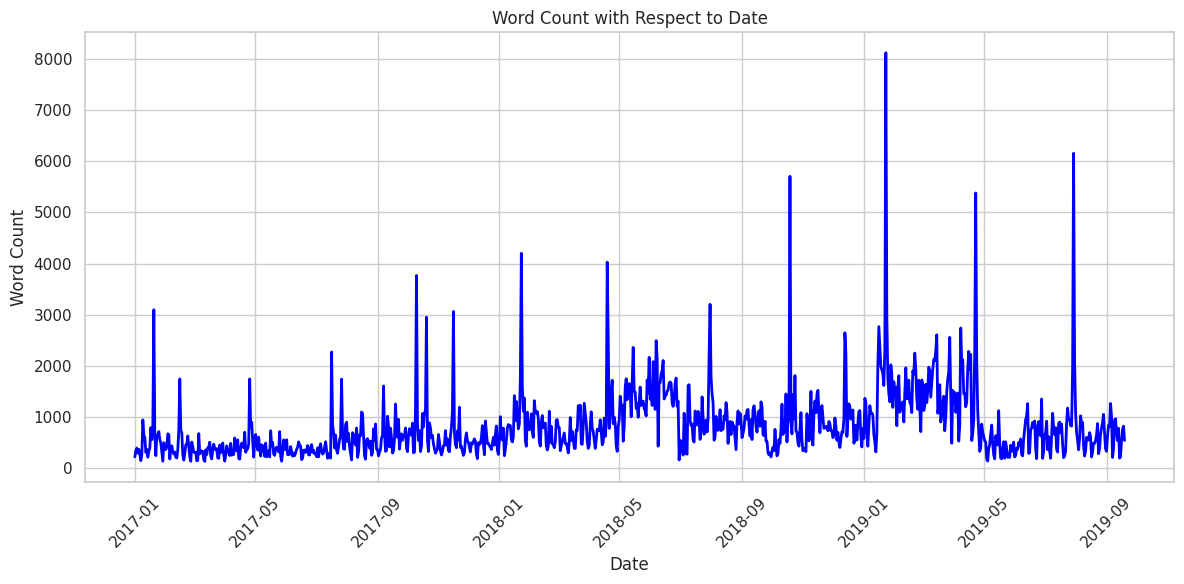

In [ ]:
# Plot the word count with respect to Date using a line graph (no points)
plt.figure(figsize=(12, 6))
plt.plot(word_count_by_date['Date'], word_count_by_date['word_count'], linestyle='-', linewidth=2, color='blue')
plt.title('Word Count with Respect to Date')
plt.xlabel('Date')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Plotting the Integer Features Count

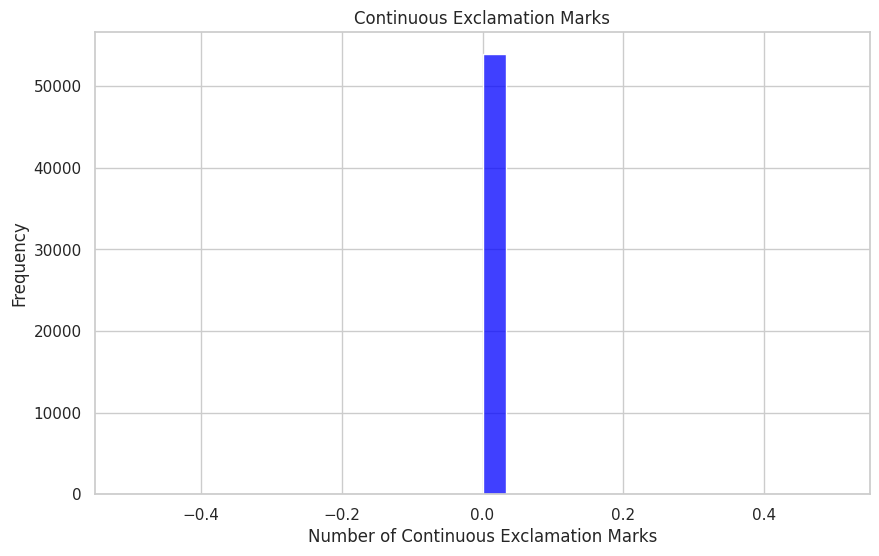

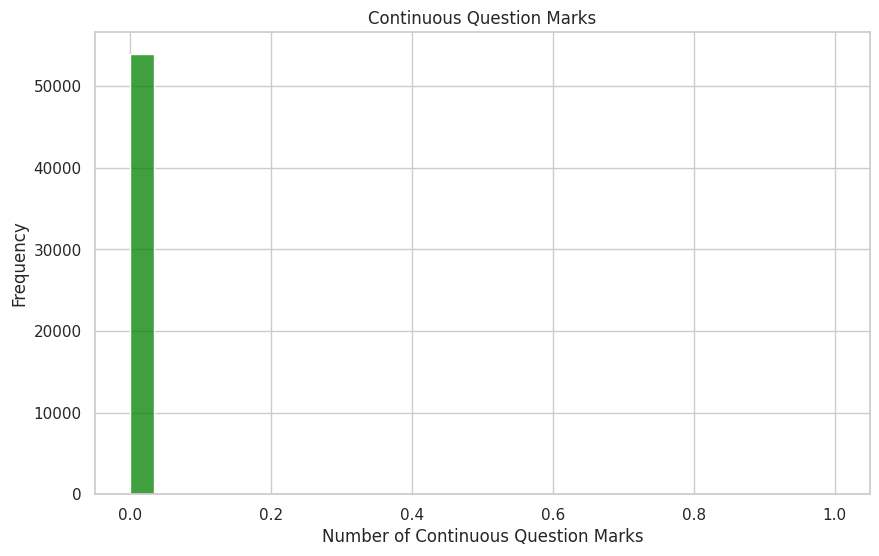

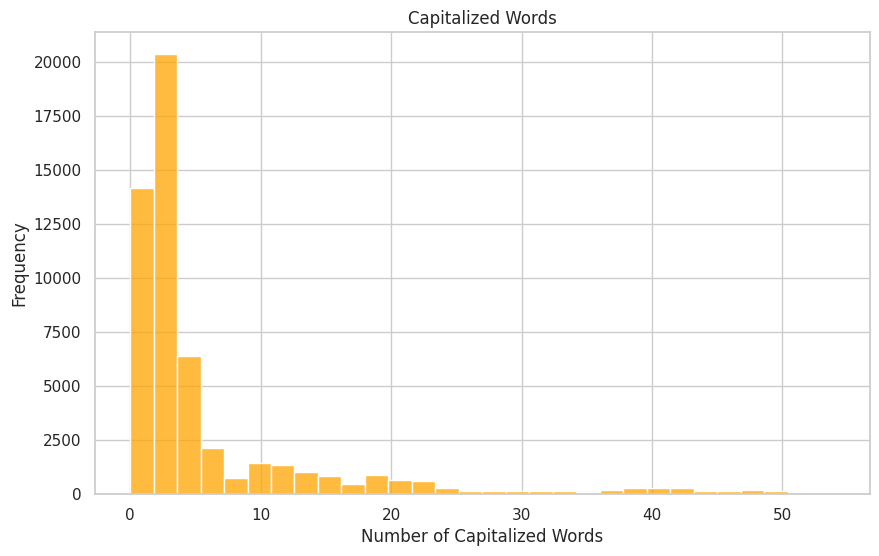

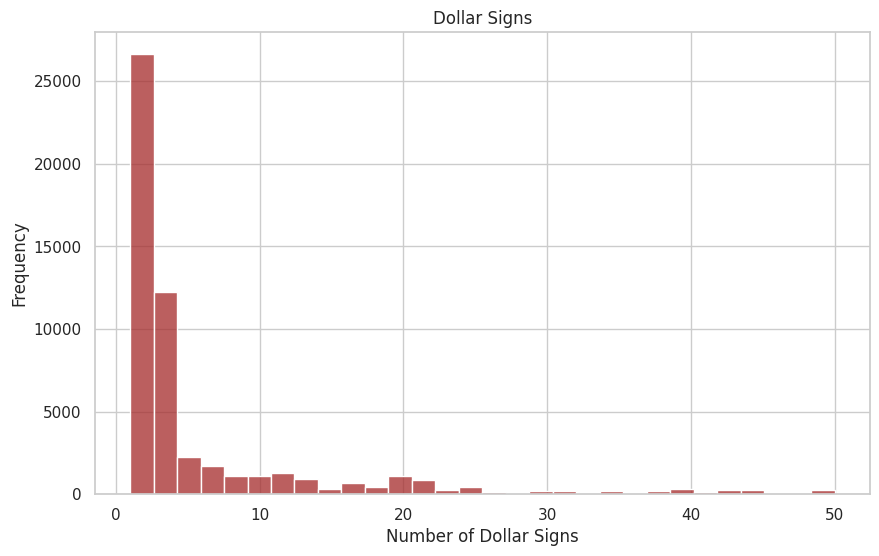

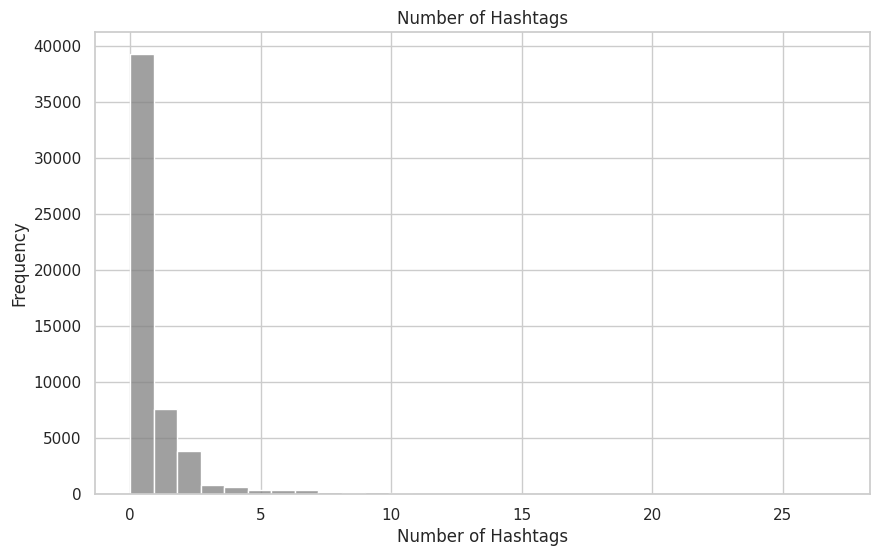

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot continuous exclamation marks
plt.figure(figsize=(10, 6))
sns.histplot(df['continuous_exclamation'], bins=30, kde=False, color='blue')
plt.title('Continuous Exclamation Marks')
plt.xlabel('Number of Continuous Exclamation Marks')
plt.ylabel('Frequency')
plt.show()

# Plot continuous question marks
plt.figure(figsize=(10, 6))
sns.histplot(df['continuous_question'], bins=30, kde=False, color='green')
plt.title('Continuous Question Marks')
plt.xlabel('Number of Continuous Question Marks')
plt.ylabel('Frequency')
plt.show()

# Plot capitalized words
plt.figure(figsize=(10, 6))
sns.histplot(df['capitalized_words'], bins=30, kde=False, color='orange')
plt.title('Capitalized Words')
plt.xlabel('Number of Capitalized Words')
plt.ylabel('Frequency')
plt.show()


# Plot dollar signs
plt.figure(figsize=(10, 6))
sns.histplot(df['dollar_signs'], bins=30, kde=False, color='brown')
plt.title('Dollar Signs')
plt.xlabel('Number of Dollar Signs')
plt.ylabel('Frequency')
plt.show()

# Plot hashtags
plt.figure(figsize=(10, 6))
sns.histplot(df['num_hashtags'], bins=30, kde=False, color='gray')
plt.title('Number of Hashtags')
plt.xlabel('Number of Hashtags')
plt.ylabel('Frequency')
plt.show()


Plotting the Integer Features Count by Date

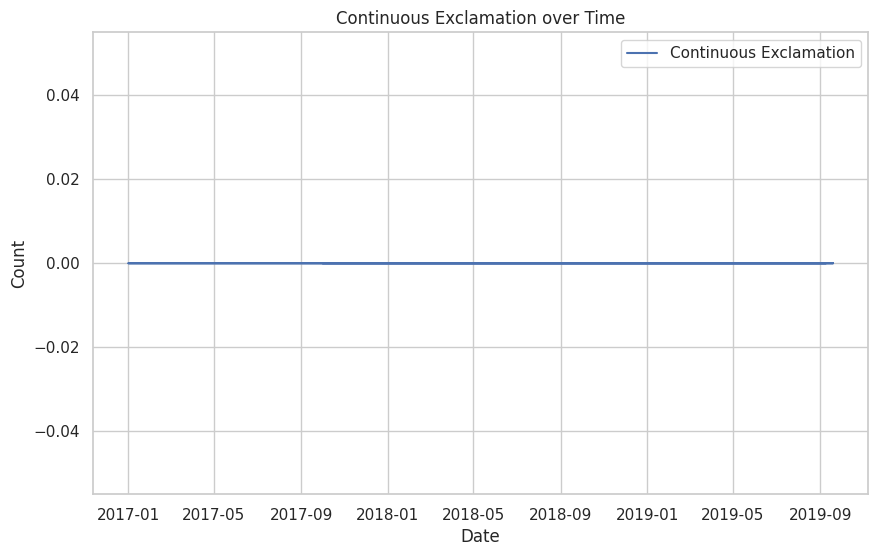

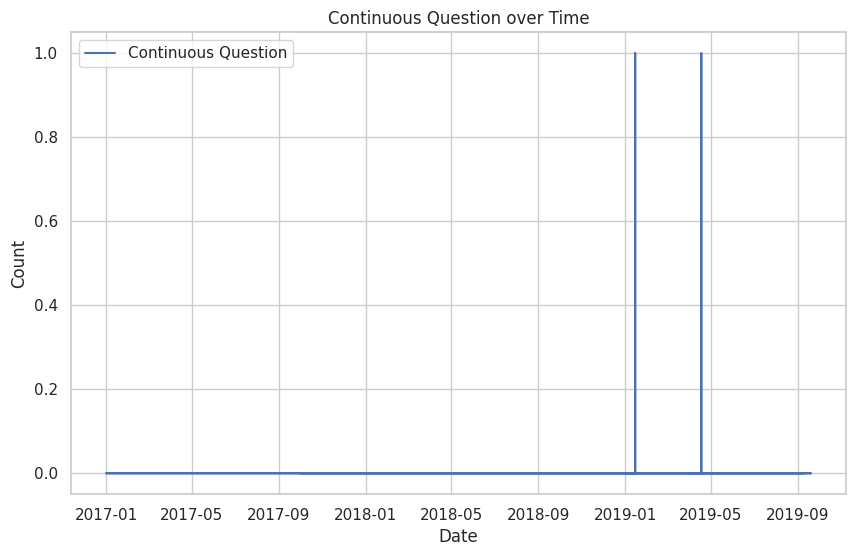

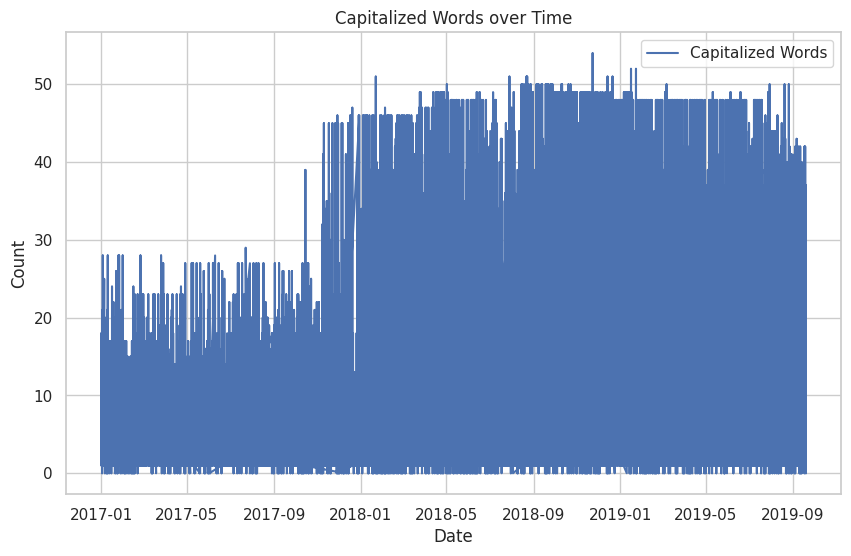

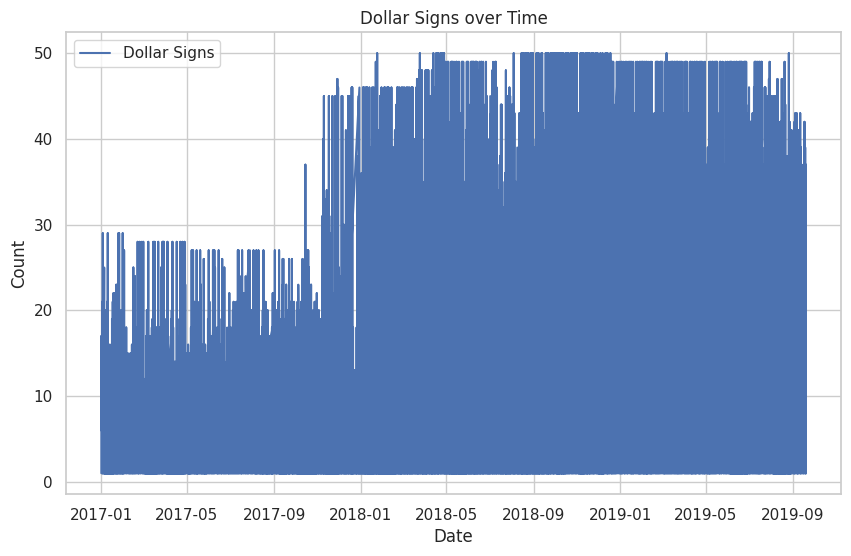

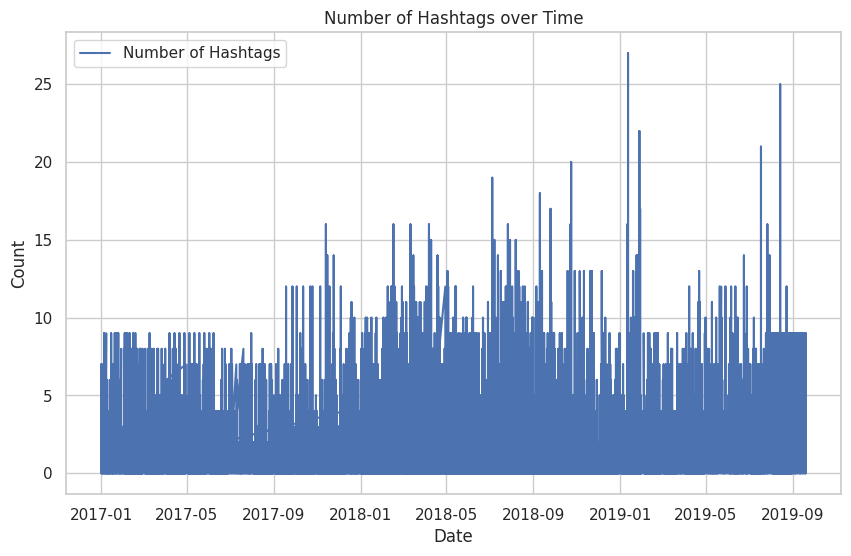

In [ ]:

# Plotting continuous_exclamation
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['continuous_exclamation'], label='Continuous Exclamation')
plt.title('Continuous Exclamation over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

# Plotting continuous_question
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['continuous_question'], label='Continuous Question')
plt.title('Continuous Question over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

# Plotting capitalized_words
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['capitalized_words'], label='Capitalized Words')
plt.title('Capitalized Words over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


# Plotting dollar_signs
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['dollar_signs'], label='Dollar Signs')
plt.title('Dollar Signs over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

# Plotting num_hashtags
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['num_hashtags'], label='Number of Hashtags')
plt.title('Number of Hashtags over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


##Likelihood Ratio (LLR)

LLR provides a statistical measure of the strength of association between words, which can be valuable in sentiment analysis by revealing meaningful patterns and helping to extract features for sentiment prediction models.

In [ ]:
import nltk
from nltk import collocations
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Function to calculate Log-Likelihood Ratio for a given text and return the mean
def calculate_mean_llr(text):
    words = word_tokenize(text.lower())
    finder = collocations.BigramCollocationFinder.from_words(words)

    # Filter out bigrams with frequency less than 1
    finder.apply_freq_filter(1)

    try:
        llr_scores = [score for bigram, score in finder.score_ngrams(collocations.BigramAssocMeasures.likelihood_ratio)]
        # Extract LLR scores
        mean_llr = sum(llr_scores) / len(llr_scores) if llr_scores else 0
        # Calculate the mean of the LLR scores, handling the case where llr_scores is empty
    except ValueError:
        # Handle math domain error by returning 0 for problematic cases
        mean_llr = 0

    return mean_llr

# Apply the function to the 'clean_tweets' column in your DataFrame
df['llr_score'] = df['clean_tweets'].apply(calculate_mean_llr)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df.head()

Date           author_id                name  \
0 2017-10-01            45202420     Clair Lee, M.S.   
1 2017-10-01          3170121190             FinBuzz   
2 2017-10-01           402353316  Vista Partners LLC   
3 2017-10-01          3230471773            FinInvTr   
4 2017-10-01  888125801903775744         Week Herald   

                                                text  followers_count  \
0  Awesome $PG podcast & SWOT Analysis! Love the ...          11519.0   
1  Trading indices? Check stories for the major c...           1226.0   
2  World's biggest #advertiser on challenges of a...          12681.0   
3  The Market's Top Companies - Performance Updat...            171.0   
4  Procter & Gamble Company $The $PG Shares Bough...            571.0   

   sentiment  polarity  subjectivity  \
0          1  0.659091      0.763636   
1          1  0.062500      0.500000   
2         -1 -0.125000      0.375000   
3          1  0.500000      0.500000   
4          1  0.250000      0.333333   

                                        cleaned_text  \
0  Awesome  PG podcast  SWOT Analysis  Love new p...   
1  Trading index  Check story major constituent  ...   
2  World's biggest   challenge ad placement   PG ...   
3  Market's Top Companies  Performance Update  DI...   
4  Procter  Gamble Company   PG Shares Bought Fir...   

                                        core_meaning  ...  \
0  Awesome  PG podcast  SWOT Analysis  Love new p...  ...   
1  Trading index  Check story major constituent  ...  ...   
2  World's biggest   challenge ad placement   PG ...  ...   
3  Market's Top Companies  Performance Update  DI...  ...   
4  Procter  Gamble Company   PG Shares Bought Fir...  ...   

  vader_sentiment_score TextBlob_sentiment_score  final_sentiment_score  \
0                0.9559                 0.659091               0.866857   
1                0.0000                 0.062500               0.018750   
2                0.0772                 0.000000               0.054040   
3                0.2023                 0.500000               0.291610   
4                0.6705                 0.250000               0.544350   

   continuous_exclamation  continuous_question  capitalized_words  \
0                       0                    0                  3   
1                       0                    0                  4   
2                       0                    0                  4   
3                       0                    0                  8   
4                       0                    0                  1   

   dollar_signs  num_hashtags  word_count  llr_score  
0             1             0          18   7.071756  
1             3             1           9   6.278978  
2             5             3          11   6.701994  
3             8             0          14   7.204922  
4             2             0          14   7.204922  

[5 rows x 22 columns]

# Correlation Heatmap

Plotting the Correlation Heatmap to understand the relationship between features

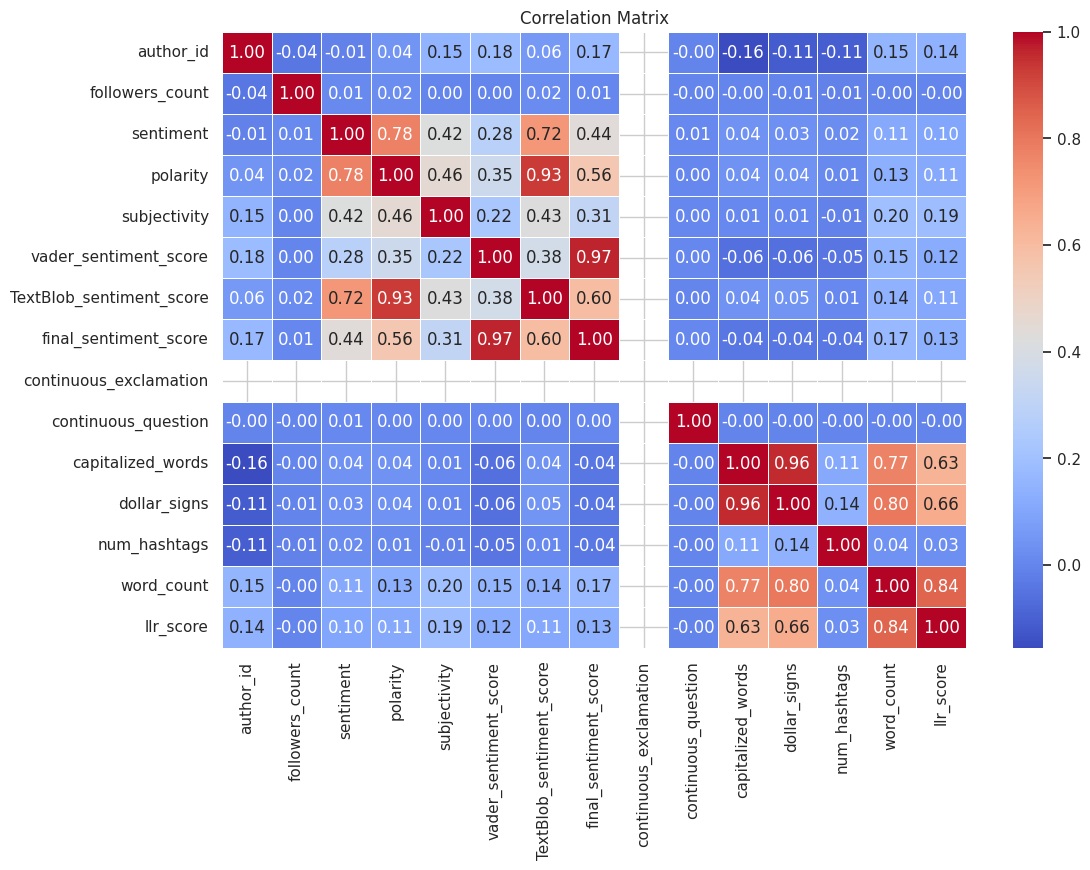

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Remove non-numeric columns, as correlation is applicable to numeric data
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Set up the matplotlib figure size
plt.figure(figsize=(12, 8))

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Showing the plot
plt.title('Correlation Matrix')
plt.show()


# Sentiment Score Analysis

## Residuals/Noise

<ipython-input-389-acc902cc3373>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekly_final = df.groupby(df['Date'].dt.to_period("W")).mean().reset_index()


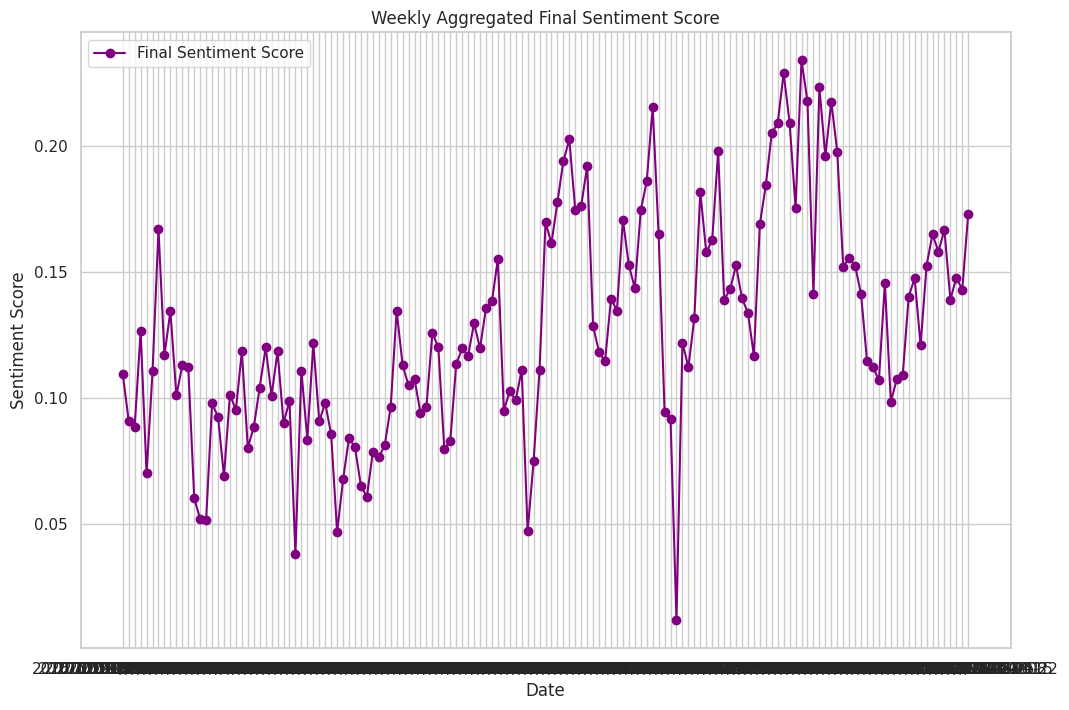

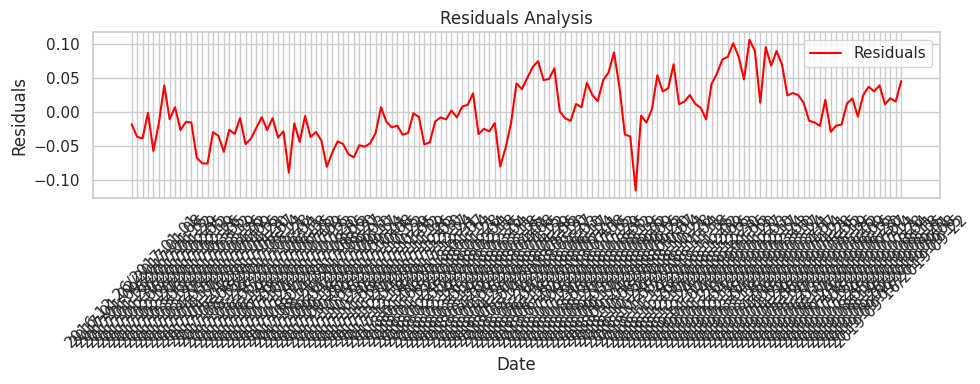

In [ ]:
# Weekly aggregation of final_sentiment_score
df_weekly_final = df.groupby(df['Date'].dt.to_period("W")).mean().reset_index()

# Convert 'Date' to string
df_weekly_final['Date'] = df_weekly_final['Date'].astype(str)

# Plot Final Sentiment Score
plt.figure(figsize=(12, 8))
plt.plot(df_weekly_final['Date'], df_weekly_final['final_sentiment_score'], color='purple', label='Final Sentiment Score', marker='o')
plt.title('Weekly Aggregated Final Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()

# Calculate residuals (noise)
residuals = df_weekly_final['final_sentiment_score'] - df_weekly_final['final_sentiment_score'].mean()

# Plot Residuals
plt.figure(figsize=(10, 4))
plt.plot(df_weekly_final['Date'], residuals, color='red', label='Residuals')
plt.title('Residuals Analysis')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Autocorrelation

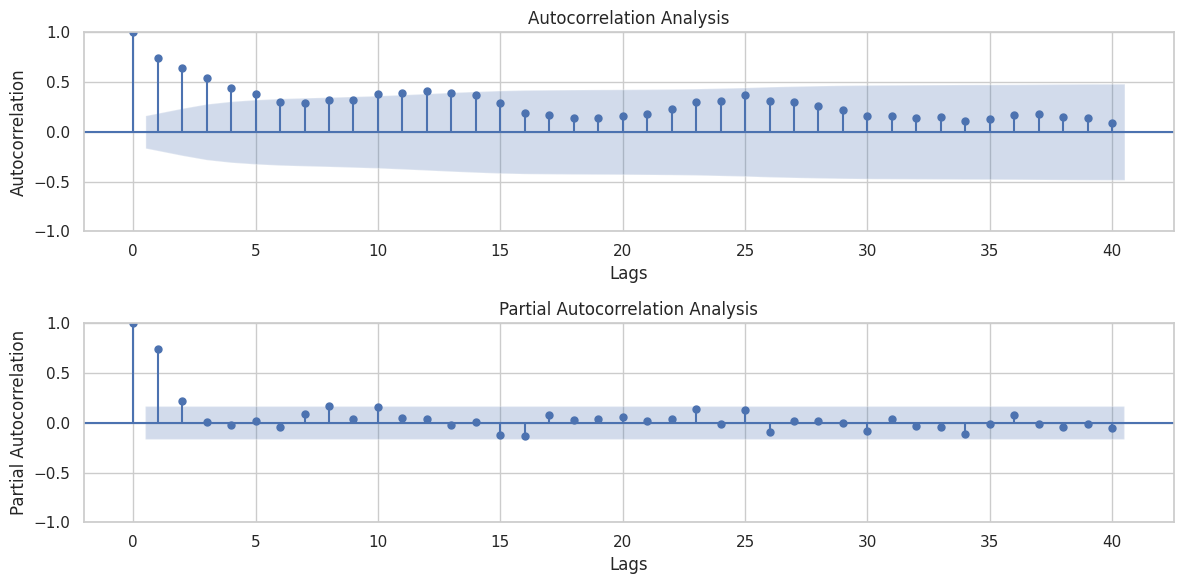

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot Autocorrelation and Partial Autocorrelation
plt.figure(figsize=(12, 6))

# Autocorrelation plot
plt.subplot(2, 1, 1)
plot_acf(df_weekly_final['final_sentiment_score'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Analysis')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')

# Partial Autocorrelation plot
plt.subplot(2, 1, 2)
plot_pacf(df_weekly_final['final_sentiment_score'], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Analysis')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')

plt.tight_layout()
plt.show()


## Rolling Statistics (Volatility)

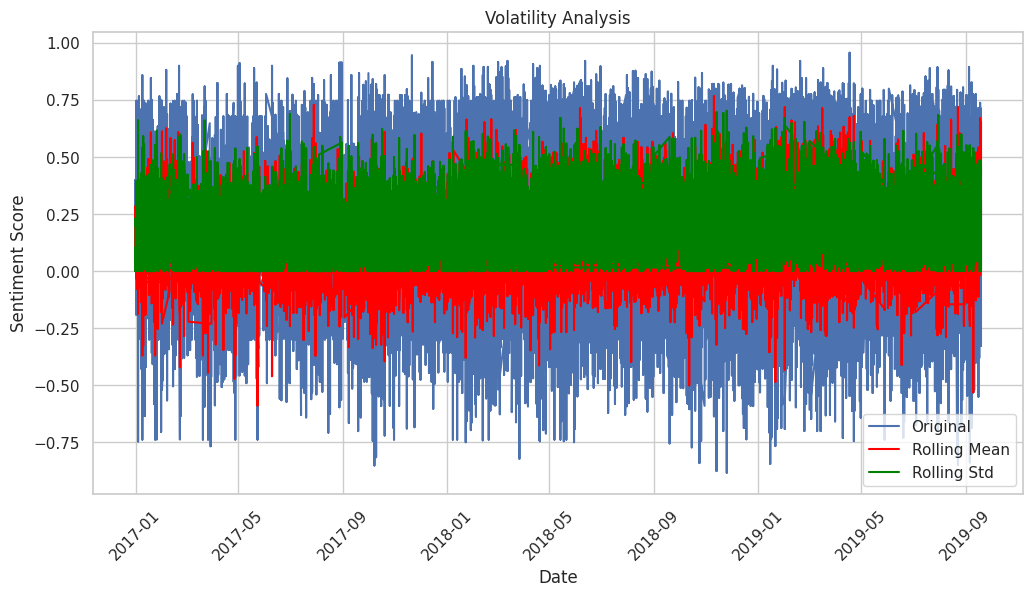

In [ ]:
# Calculate rolling mean and rolling standard deviation
rolling_mean = df['final_sentiment_score'].rolling(window=4).mean()  # adjust window size based on available data
rolling_std = df['final_sentiment_score'].rolling(window=4).std()

# Plotting Rolling Mean and Rolling Standard Deviation
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['final_sentiment_score'], label='Original')
plt.plot(df['Date'], rolling_mean, label='Rolling Mean', color='red')
plt.plot(df['Date'], rolling_std, label='Rolling Std', color='green')
plt.title('Volatility Analysis')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.xticks(rotation=45)
plt.show()


## Stationarity

ADF Statistic: -3.3478338652914745
p-value: 0.012871081543927665
Critical Values: {'1%': -3.4776006742422374, '5%': -2.882265832283648, '10%': -2.5778219289774156}


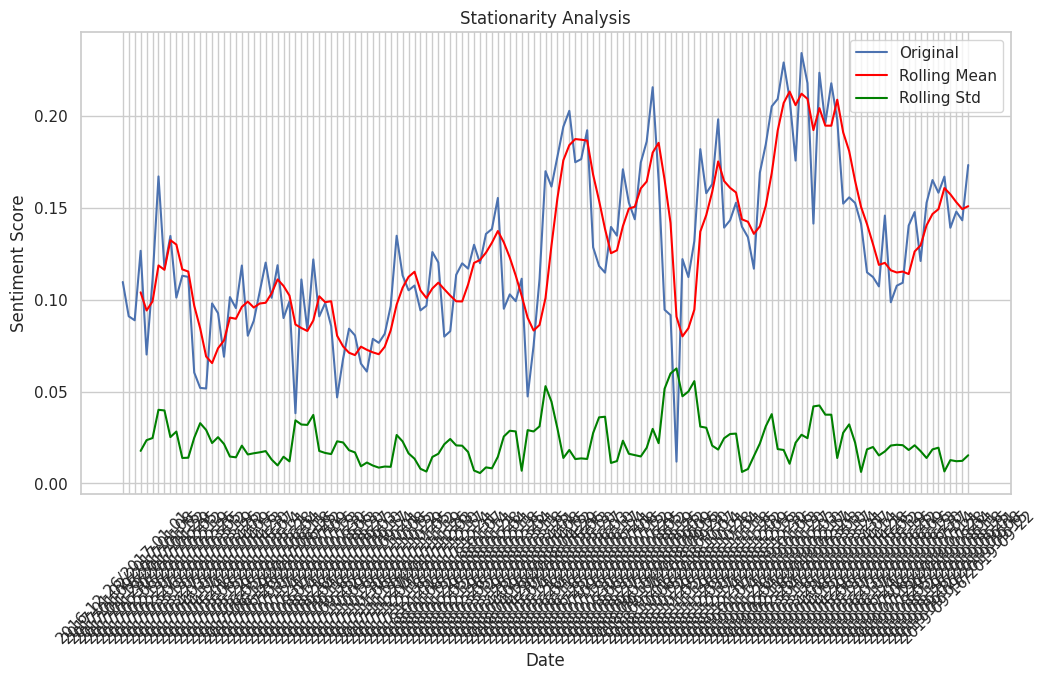

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity
result_adf = adfuller(df_weekly_final['final_sentiment_score'])
print(f'ADF Statistic: {result_adf[0]}')
print(f'p-value: {result_adf[1]}')
print(f'Critical Values: {result_adf[4]}')

# You can also visualize the rolling mean and rolling standard deviation
rolling_mean = df_weekly_final['final_sentiment_score'].rolling(window=4).mean()  # adjust window size based on available data
rolling_std = df_weekly_final['final_sentiment_score'].rolling(window=4).std()

# Plotting Rolling Mean and Rolling Standard Deviation
plt.figure(figsize=(12, 6))
plt.plot(df_weekly_final['Date'], df_weekly_final['final_sentiment_score'], label='Original')
plt.plot(df_weekly_final['Date'], rolling_mean, label='Rolling Mean', color='red')
plt.plot(df_weekly_final['Date'], rolling_std, label='Rolling Std', color='green')
plt.title('Stationarity Analysis')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.xticks(rotation=45)
plt.show()


## Periodogram

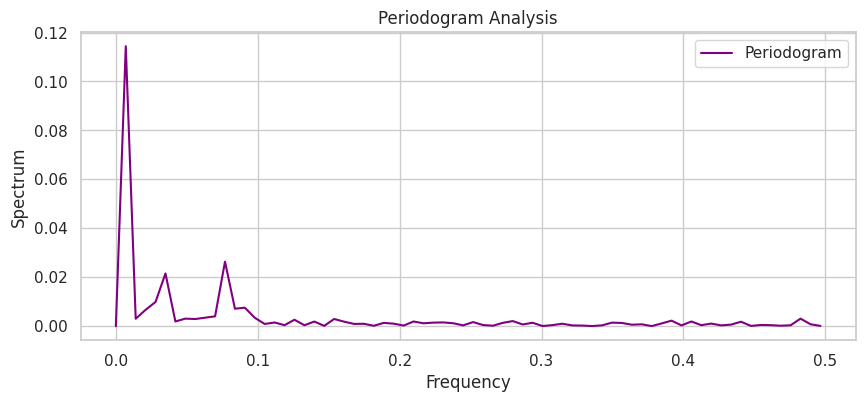

In [ ]:
from scipy.signal import periodogram

# Calculate the periodogram
frequencies, spectrum = periodogram(df_weekly_final['final_sentiment_score'])

# Plot the periodogram
plt.figure(figsize=(10, 4))
plt.plot(frequencies, spectrum, color='purple', label='Periodogram')
plt.title('Periodogram Analysis')
plt.xlabel('Frequency')
plt.ylabel('Spectrum')
plt.legend()
plt.show()


#Saving DF as csv

In [ ]:
#Saving the df into a csv
df.to_csv("PG_P1.csv", index=False)


# **Stock Data Analysis** **(Part - 2)**

# Importing Libraries and Extracting data

In [ ]:
stock_symbol = 'PG'

In [ ]:
import yfinance as yf

# Set the stock symbol and date range

start_date = user_start_date
end_date = user_end_date

# Download historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Reset index to have 'Date' as a column
stock_data.reset_index(inplace=True)

# Reorder columns to match the specified format
stock_data = stock_data[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]



[*********************100%%**********************]  1 of 1 completed


In [ ]:
stock_data.head()

Date       Open       High        Low      Close  Adj Close    Volume
0 2017-01-03  83.879997  84.389999  83.500000  84.199997  69.490372   8792700
1 2017-01-04  84.449997  84.599998  84.239998  84.500000  69.737953   8096700
2 2017-01-05  84.410004  85.430000  84.379997  85.059998  70.200127   6852400
3 2017-01-06  84.940002  85.250000  84.620003  85.029999  70.175385   4799900
4 2017-01-09  84.059998  84.660004  83.750000  84.400002  69.655441  11000600

In [ ]:
stock_data.shape

(682, 7)

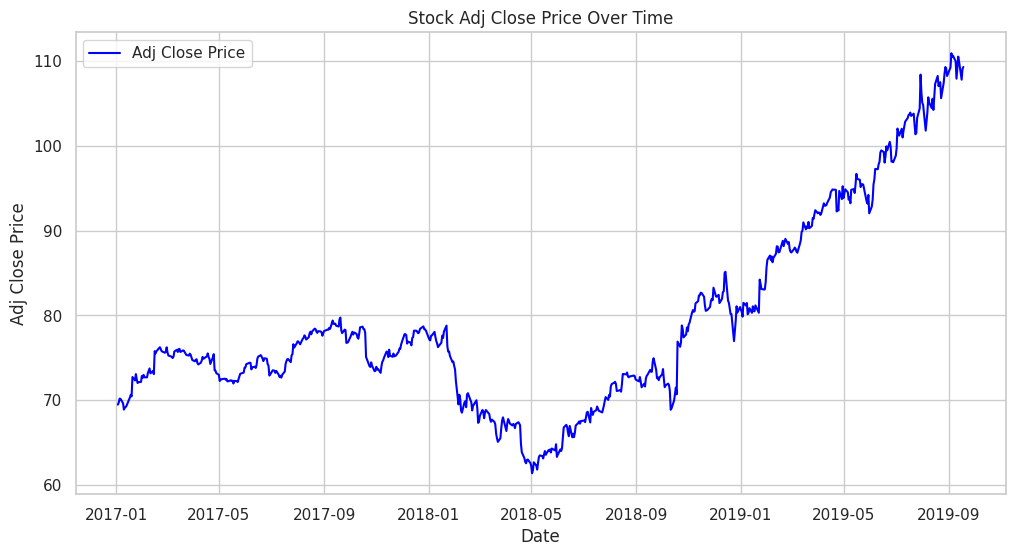

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'final_df' is your DataFrame
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Adj Close'], label='Adj Close Price', color='blue')
plt.title('Stock Adj Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()


# Adding Stock Features

Add all the features for stock data

In [ ]:
# Setting 'Date' column  in datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

# Calculate Moving Averages (MA)
stock_data['MA_7'] = stock_data['Adj Close'].rolling(window=7).mean()
stock_data['MA_20'] = stock_data['Adj Close'].rolling(window=20).mean()

# Calculate Exponential Moving Average (EMA)
stock_data['EMA'] = stock_data['Adj Close'].ewm(span=20, adjust=False).mean()

# Calculate Bollinger Bands
stock_data['MA_20_STD'] = stock_data['Adj Close'].rolling(window=20).std()
stock_data['Upper_Band'] = stock_data['MA_20'] + 2 * stock_data['MA_20_STD']
stock_data['Lower_Band'] = stock_data['MA_20'] - 2 * stock_data['MA_20_STD']



# Fill NaN values with the nearest valid values (forward fill and then backward fill)
stock_data.fillna(method='ffill', inplace=True)
stock_data.fillna(method='bfill', inplace=True)

# Resetting the index to keep 'Date' as a column
stock_data.reset_index(inplace=True)




Adding more features

In [ ]:
# Calculate Relative Strength Index (RSI)
delta = stock_data['Adj Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
stock_data['RSI'] = 100 - (100 / (1 + rs))

# Calculate Moving Average Convergence Divergence (MACD)
short_ema = stock_data['Adj Close'].ewm(span=12, adjust=False).mean()
long_ema = stock_data['Adj Close'].ewm(span=26, adjust=False).mean()

stock_data['MACD'] = short_ema - long_ema
stock_data['Signal_Line'] = stock_data['MACD'].ewm(span=9, adjust=False).mean()

# Calculate Average True Range (ATR)
high_low_range = stock_data['High'] - stock_data['Low']
stock_data['ATR'] = high_low_range.rolling(window=14).mean()

# Calculate Commodity Channel Index (CCI)
typical_price = (stock_data['High'] + stock_data['Low'] + stock_data['Adj Close']) / 3
mean_deviation = (typical_price - typical_price.rolling(window=20).mean()).abs().rolling(window=20).mean()

stock_data['CCI'] = (typical_price - typical_price.rolling(window=20).mean()) / (0.015 * mean_deviation)

# Calculate Stochastic Oscillator
min_low = stock_data['Low'].rolling(window=14).min()
max_high = stock_data['High'].rolling(window=14).max()

stock_data['%K'] = ((stock_data['Adj Close'] - min_low) / (max_high - min_low)) * 100
stock_data['%D'] = stock_data['%K'].rolling(window=3).mean()


Plotting the Features

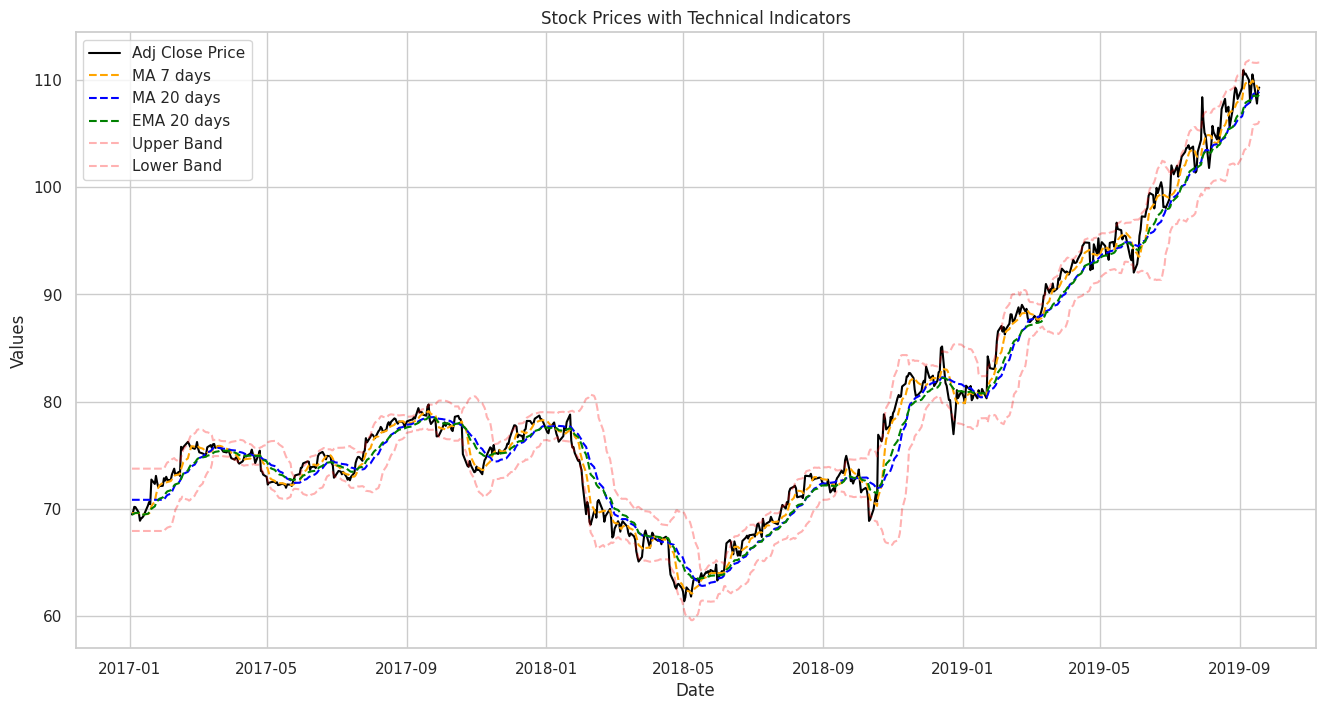

In [ ]:
import matplotlib.pyplot as plt

# Setting 'Date' column in datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

# Calculate Moving Averages (MA)
stock_data['MA_7'] = stock_data['Adj Close'].rolling(window=7).mean()
stock_data['MA_20'] = stock_data['Adj Close'].rolling(window=20).mean()

# Calculate Exponential Moving Average (EMA)
stock_data['EMA'] = stock_data['Adj Close'].ewm(span=20, adjust=False).mean()

# Calculate Bollinger Bands
stock_data['MA_20_STD'] = stock_data['Adj Close'].rolling(window=20).std()
stock_data['Upper_Band'] = stock_data['MA_20'] + 2 * stock_data['MA_20_STD']
stock_data['Lower_Band'] = stock_data['MA_20'] - 2 * stock_data['MA_20_STD']

# Fill NaN values with the nearest valid values (forward fill and then backward fill)
stock_data.fillna(method='ffill', inplace=True)
stock_data.fillna(method='bfill', inplace=True)

# Resetting the index to keep 'Date' as a column
stock_data.reset_index(inplace=True)

# Plotting all features in one graph
plt.figure(figsize=(16, 8))
plt.plot(stock_data['Date'], stock_data['Adj Close'], label='Adj Close Price', color='black')
plt.plot(stock_data['Date'], stock_data['MA_7'], label='MA 7 days', linestyle='--', color='orange')
plt.plot(stock_data['Date'], stock_data['MA_20'], label='MA 20 days', linestyle='--', color='blue')
plt.plot(stock_data['Date'], stock_data['EMA'], label='EMA 20 days', linestyle='--', color='green')
plt.plot(stock_data['Date'], stock_data['Upper_Band'], label='Upper Band', linestyle='--', color='red', alpha=0.3)
plt.plot(stock_data['Date'], stock_data['Lower_Band'], label='Lower Band', linestyle='--', color='red', alpha=0.3)

plt.title('Stock Prices with Technical Indicators')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

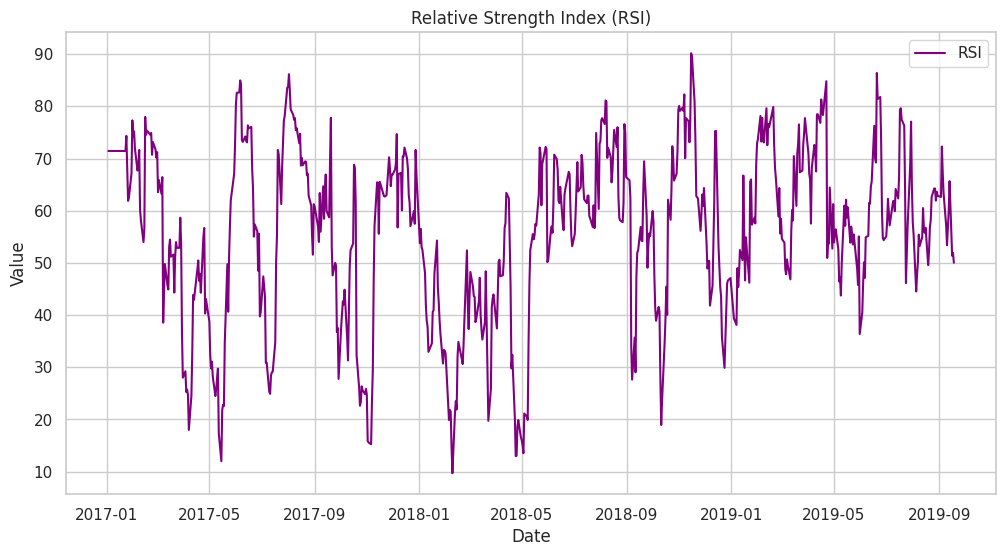

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['RSI'], label='RSI', color='purple')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


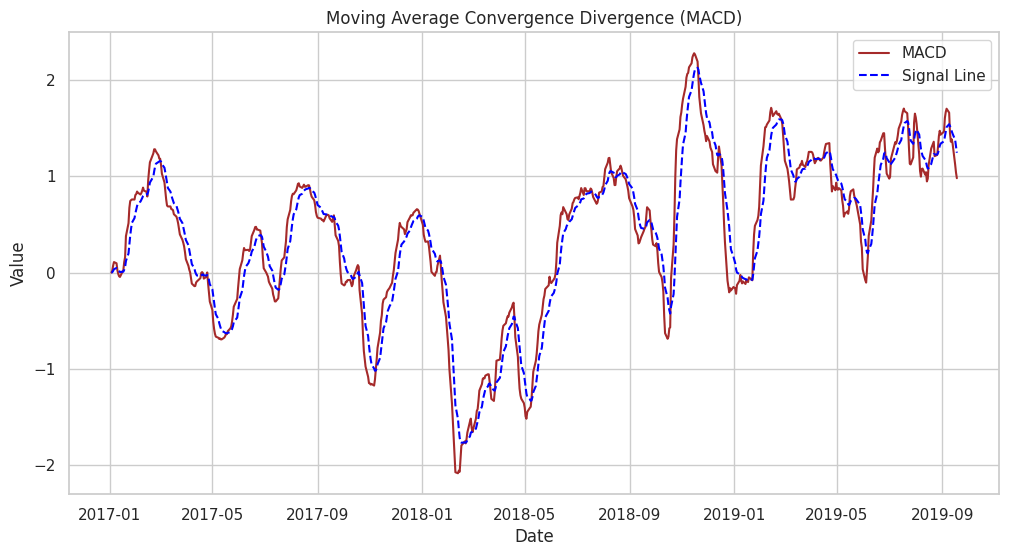

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['MACD'], label='MACD', color='brown')
plt.plot(stock_data['Date'], stock_data['Signal_Line'], label='Signal Line', linestyle='--', color='blue')
plt.title('Moving Average Convergence Divergence (MACD)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


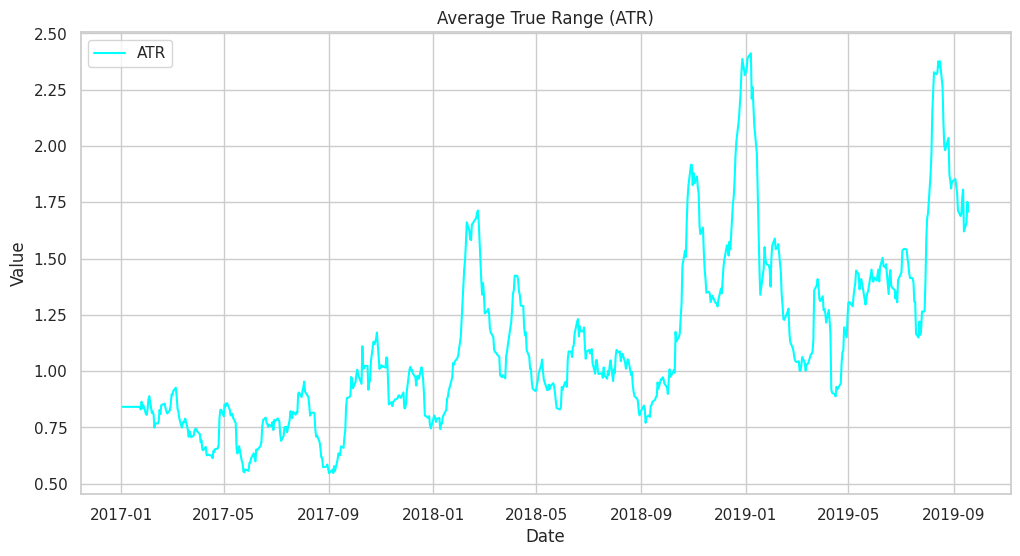

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['ATR'], label='ATR', color='cyan')
plt.title('Average True Range (ATR)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


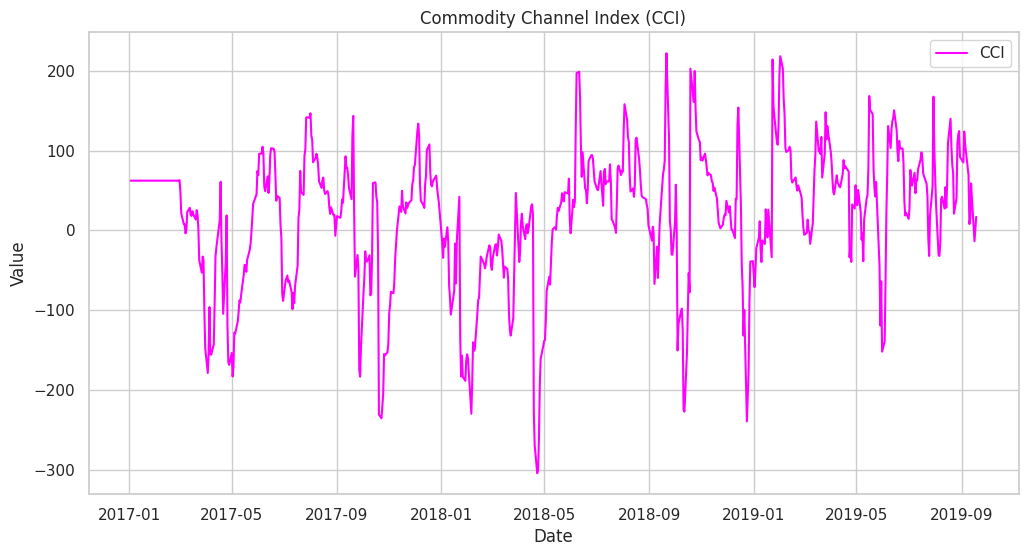

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['CCI'], label='CCI', color='magenta')
plt.title('Commodity Channel Index (CCI)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


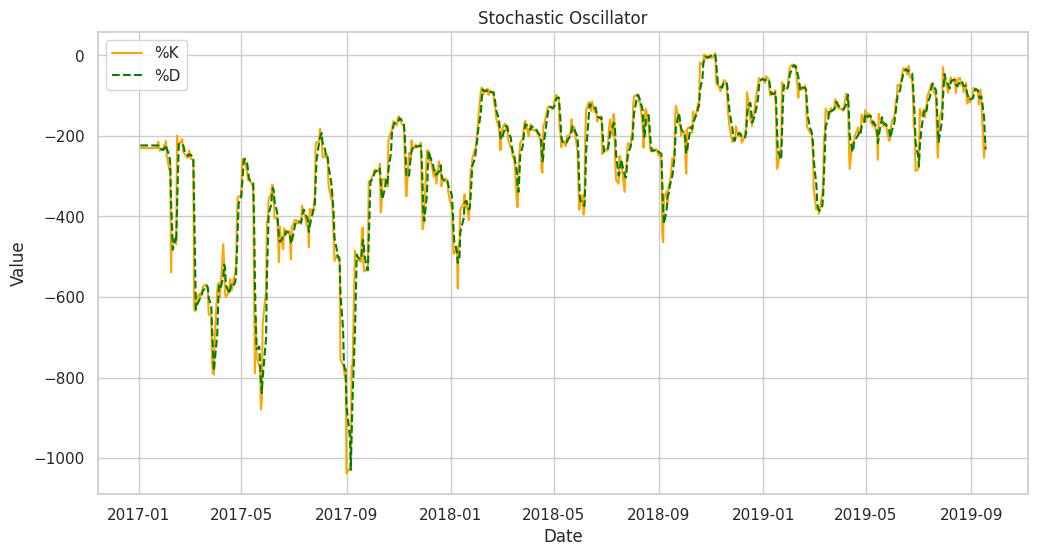

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['%K'], label='%K', color='orange')
plt.plot(stock_data['Date'], stock_data['%D'], label='%D', linestyle='--', color='green')
plt.title('Stochastic Oscillator')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
stock_data.head()

Date       Open       High        Low      Close  Adj Close    Volume  \
0 2017-01-03  83.879997  84.389999  83.500000  84.199997  69.490372   8792700   
1 2017-01-04  84.449997  84.599998  84.239998  84.500000  69.737953   8096700   
2 2017-01-05  84.410004  85.430000  84.379997  85.059998  70.200127   6852400   
3 2017-01-06  84.940002  85.250000  84.620003  85.029999  70.175385   4799900   
4 2017-01-09  84.059998  84.660004  83.750000  84.400002  69.655441  11000600   

        MA_7      MA_20        EMA  MA_20_STD  Upper_Band  Lower_Band  \
0  69.611811  70.855797  69.490372   1.452522   73.760841   67.950753   
1  69.611811  70.855797  69.513951   1.452522   73.760841   67.950753   
2  69.611811  70.855797  69.579301   1.452522   73.760841   67.950753   
3  69.611811  70.855797  69.636071   1.452522   73.760841   67.950753   
4  69.611811  70.855797  69.637916   1.452522   73.760841   67.950753   

         RSI      MACD  Signal_Line      ATR        CCI          %K  \
0  71.448692  0.000000     0.000000  0.84143  62.320658 -230.020989   
1  71.448692  0.019750     0.003950  0.84143  62.320658 -230.020989   
2  71.448692  0.071867     0.017533  0.84143  62.320658 -230.020989   
3  71.448692  0.109907     0.036008  0.84143  62.320658 -230.020989   
4  71.448692  0.096981     0.048203  0.84143  62.320658 -230.020989   

           %D  
0 -223.586337  
1 -223.586337  
2 -223.586337  
3 -223.586337  
4 -223.586337

# **Merging Sentiment and Stock Data Analysis** **(Part - 3)**

Loading Sentiment Analysis Dataset

In [ ]:
Sentiment_df = pd.read_csv('PG_P1.csv', error_bad_lines=False)


#Sentiment_df = df

In [ ]:
selected_columns = ['Date', 'final_sentiment_score', 'followers_count', 'vader_sentiment_score']
new_df = Sentiment_df[selected_columns]

# replace the original DataFrame with this new one
Sentiment_df = new_df.copy()

In [ ]:
import pandas as pd

# Assuming your DataFrame is named df
# If not, replace df with the actual name of your DataFrame

# Convert 'Date' to datetime type (if it's not already)
Sentiment_df['Date'] = pd.to_datetime(Sentiment_df['Date'])

# Group by 'Date' and calculate the mean of 'sentiment_score'
grouped_df = Sentiment_df.groupby('Date')['final_sentiment_score', 'vader_sentiment_score'].mean().reset_index()



<ipython-input-411-72090fff1770>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = Sentiment_df.groupby('Date')['final_sentiment_score', 'vader_sentiment_score'].mean().reset_index()


In [ ]:
Sentiment_df = grouped_df

In [ ]:
Sentiment_df.head()

Date  final_sentiment_score  vader_sentiment_score
0 2017-01-01               0.109568               0.152265
1 2017-01-02               0.139154               0.125481
2 2017-01-03               0.073319               0.079405
3 2017-01-04               0.051493               0.033452
4 2017-01-05               0.122075               0.138968

In [ ]:
Sentiment_df.shape

(992, 3)

# Merging Both datasets

In [ ]:
# Convert 'Date' column to datetime64[ns] in both DataFrames
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
Sentiment_df['Date'] = pd.to_datetime(Sentiment_df['Date'])


In [ ]:
Sentiment_df.shape

(992, 3)

In [ ]:
stock_data.shape

(682, 20)

In [ ]:
# Merge datasets on 'Date'
final_df = pd.merge(stock_data, Sentiment_df, on='Date', how='inner')


In [ ]:
final_df.shape

(682, 22)

In [ ]:
final_df.head()

Date       Open       High        Low      Close  Adj Close    Volume  \
0 2017-01-03  83.879997  84.389999  83.500000  84.199997  69.490372   8792700   
1 2017-01-04  84.449997  84.599998  84.239998  84.500000  69.737953   8096700   
2 2017-01-05  84.410004  85.430000  84.379997  85.059998  70.200127   6852400   
3 2017-01-06  84.940002  85.250000  84.620003  85.029999  70.175385   4799900   
4 2017-01-09  84.059998  84.660004  83.750000  84.400002  69.655441  11000600   

        MA_7      MA_20        EMA  ...  Lower_Band        RSI      MACD  \
0  69.611811  70.855797  69.490372  ...   67.950753  71.448692  0.000000   
1  69.611811  70.855797  69.513951  ...   67.950753  71.448692  0.019750   
2  69.611811  70.855797  69.579301  ...   67.950753  71.448692  0.071867   
3  69.611811  70.855797  69.636071  ...   67.950753  71.448692  0.109907   
4  69.611811  70.855797  69.637916  ...   67.950753  71.448692  0.096981   

   Signal_Line      ATR        CCI          %K          %D  \
0     0.000000  0.84143  62.320658 -230.020989 -223.586337   
1     0.003950  0.84143  62.320658 -230.020989 -223.586337   
2     0.017533  0.84143  62.320658 -230.020989 -223.586337   
3     0.036008  0.84143  62.320658 -230.020989 -223.586337   
4     0.048203  0.84143  62.320658 -230.020989 -223.586337   

   final_sentiment_score  vader_sentiment_score  
0               0.073319               0.079405  
1               0.051493               0.033452  
2               0.122075               0.138968  
3               0.097047               0.110133  
4               0.063388               0.049890  

[5 rows x 22 columns]

 # Plotting sentiment with Close price

Checking the sentiment aggregated

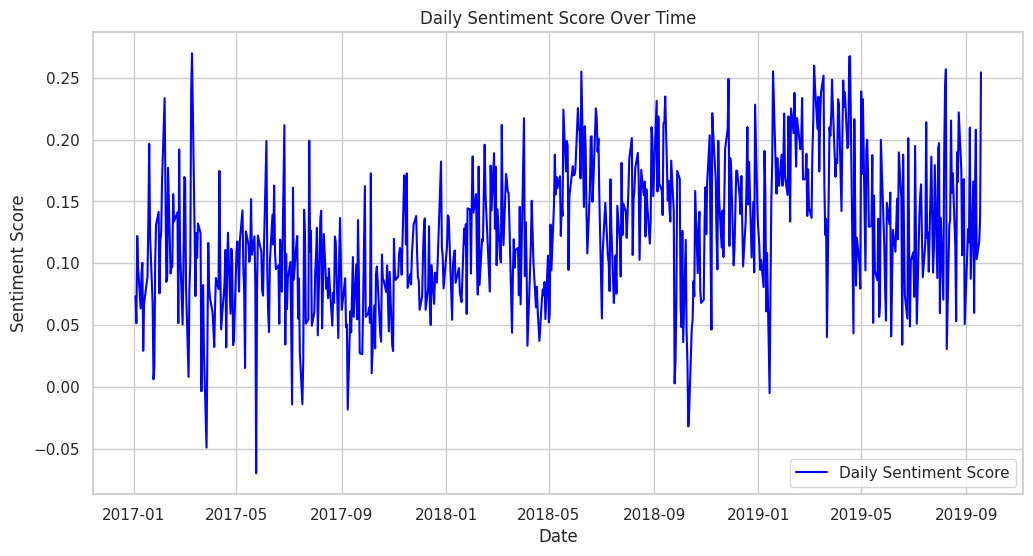

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Date' and 'final_sentiment_score' columns are present in your DataFrame
final_df['Date'] = pd.to_datetime(final_df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(final_df['Date'], final_df['final_sentiment_score'], label='Daily Sentiment Score', color='blue')
plt.title('Daily Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()


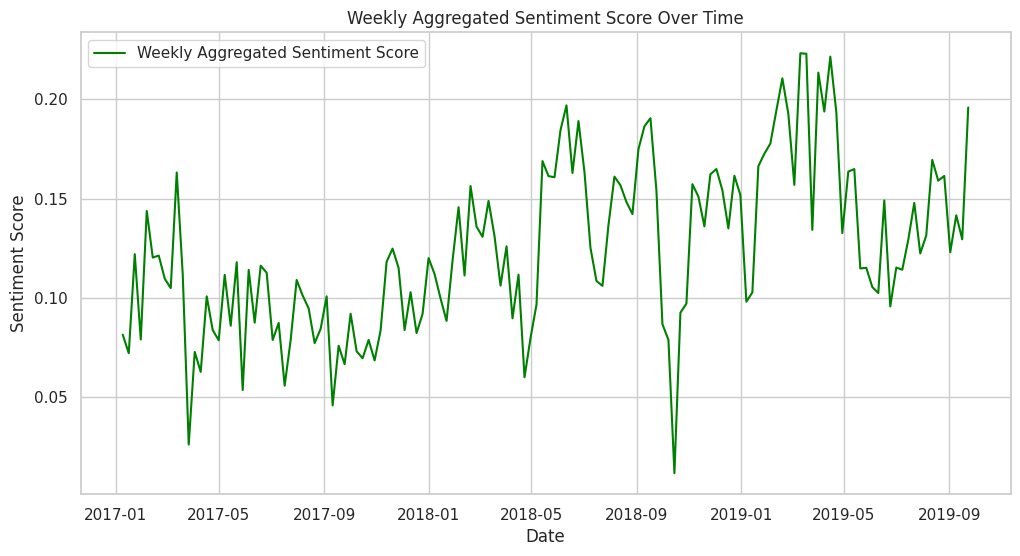

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime
final_df['Date'] = pd.to_datetime(final_df['Date'])  #

# Resample the data to get weekly averages
weekly_data = final_df.resample('W-Mon', on='Date').mean()

plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['final_sentiment_score'], label='Weekly Aggregated Sentiment Score', color='green')
plt.title('Weekly Aggregated Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()


Plotting the Sentiment with Adj Close price

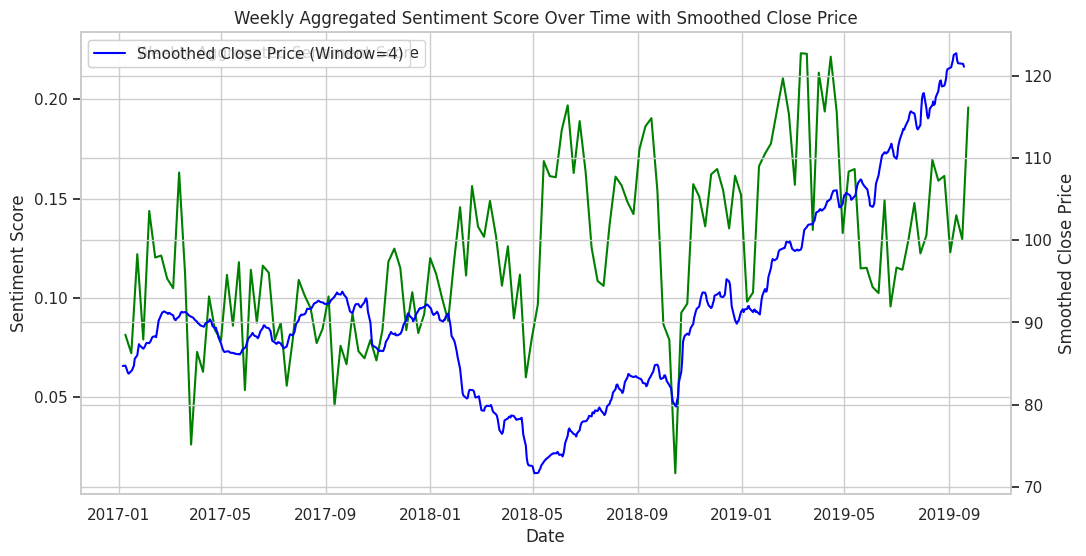

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Date' column to datetime
final_df['Date'] = pd.to_datetime(final_df['Date'])

# Resample the data to get weekly averages
weekly_data = final_df.resample('W-Mon', on='Date').mean()

# Smooth 'Close' prices using a rolling mean
rolling_window = 4  # Adjust the window size as needed
smoothed_close = final_df['Close'].rolling(window=rolling_window).mean()

plt.figure(figsize=(12, 6))

# Plotting weekly aggregated sentiment score
plt.plot(weekly_data.index, weekly_data['final_sentiment_score'], label='Weekly Aggregated Sentiment Score', color='green')
plt.title('Weekly Aggregated Sentiment Score Over Time with Smoothed Close Price')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()

# Creating a secondary y-axis for the smoothed 'Close' prices
plt.twinx()
plt.plot(final_df['Date'], smoothed_close, label=f'Smoothed Close Price (Window={rolling_window})', color='blue')
plt.xlabel('Date')
plt.ylabel('Smoothed Close Price')
plt.legend()

plt.show()


#Correlation

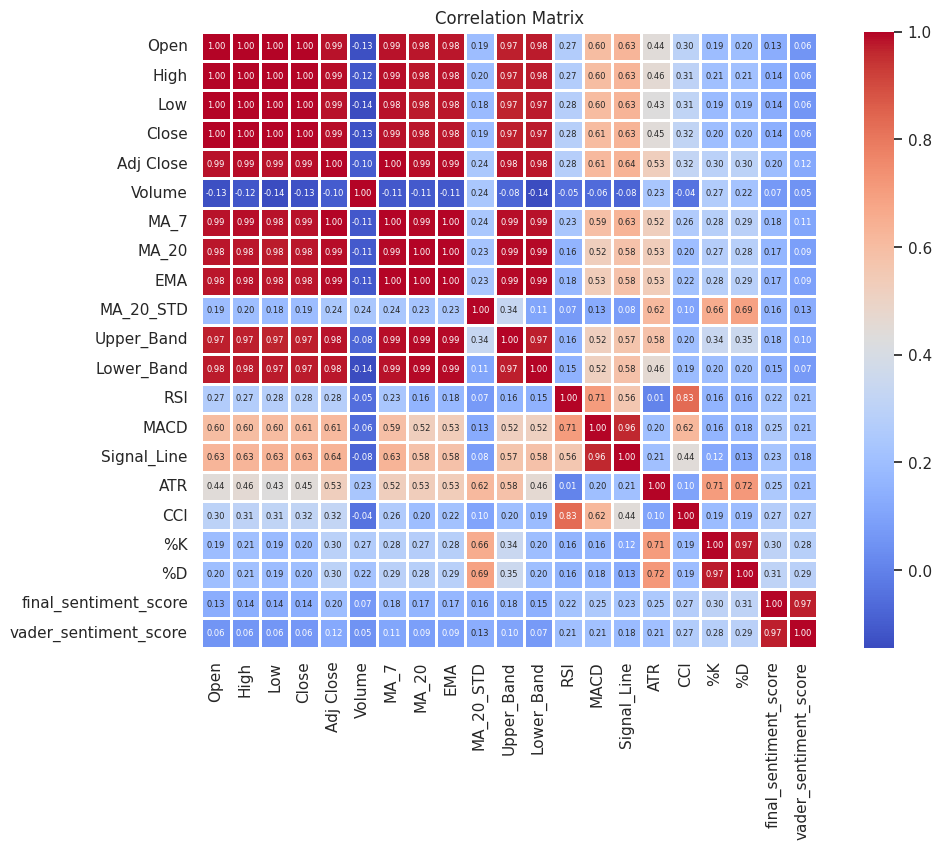

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Remove non-numeric columns, as correlation is applicable to numeric data
numeric_columns = final_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = final_df[numeric_columns].corr()

# Set up the matplotlib figure size
plt.figure(figsize=(12, 8))

# Plot the correlation matrix as a heatmap with customized parameters
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=1,
    square=True,  # Ensures that each cell is a square
    cbar_kws={"shrink": 1},  # Adjusts the color bar size
    annot_kws={"fontsize": 6},  # Adjusts the font size of annotations
)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Showing the plot
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Columns to drop
columns_to_drop = ['Open', 'High', 'Low', 'Close', 'MA_7',	'MA_20',	'EMA',	'MA_20_STD',	'Upper_Band'	,'Lower_Band']

# Drop specified columns
final_df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
final_df.head()

Date  Adj Close    Volume        RSI      MACD  Signal_Line      ATR  \
0 2017-01-03  69.490372   8792700  71.448692  0.000000     0.000000  0.84143   
1 2017-01-04  69.737953   8096700  71.448692  0.019750     0.003950  0.84143   
2 2017-01-05  70.200127   6852400  71.448692  0.071867     0.017533  0.84143   
3 2017-01-06  70.175385   4799900  71.448692  0.109907     0.036008  0.84143   
4 2017-01-09  69.655441  11000600  71.448692  0.096981     0.048203  0.84143   

         CCI          %K          %D  final_sentiment_score  \
0  62.320658 -230.020989 -223.586337               0.073319   
1  62.320658 -230.020989 -223.586337               0.051493   
2  62.320658 -230.020989 -223.586337               0.122075   
3  62.320658 -230.020989 -223.586337               0.097047   
4  62.320658 -230.020989 -223.586337               0.063388   

   vader_sentiment_score  
0               0.079405  
1               0.033452  
2               0.138968  
3               0.110133  
4               0.049890

#Selecting only numeric Data

In [ ]:
# Assuming your DataFrame is named final_df
numeric_columns = final_df.select_dtypes(include='number').columns

# Include the 'Date' column in the selection
numeric_columns = ['Date'] + list(numeric_columns)

# Create a new DataFrame with only numeric columns
numeric_df = final_df[numeric_columns]

#  modify the original DataFrame
final_df = final_df[numeric_columns]


In [ ]:
final_df.head()

Date  Adj Close    Volume        RSI      MACD  Signal_Line      ATR  \
0 2017-01-03  69.490372   8792700  71.448692  0.000000     0.000000  0.84143   
1 2017-01-04  69.737953   8096700  71.448692  0.019750     0.003950  0.84143   
2 2017-01-05  70.200127   6852400  71.448692  0.071867     0.017533  0.84143   
3 2017-01-06  70.175385   4799900  71.448692  0.109907     0.036008  0.84143   
4 2017-01-09  69.655441  11000600  71.448692  0.096981     0.048203  0.84143   

         CCI          %K          %D  final_sentiment_score  \
0  62.320658 -230.020989 -223.586337               0.073319   
1  62.320658 -230.020989 -223.586337               0.051493   
2  62.320658 -230.020989 -223.586337               0.122075   
3  62.320658 -230.020989 -223.586337               0.097047   
4  62.320658 -230.020989 -223.586337               0.063388   

   vader_sentiment_score  
0               0.079405  
1               0.033452  
2               0.138968  
3               0.110133  
4               0.049890

# LSTM Model and Evaluation

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

df = final_df

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by Date
df = df.sort_values(by='Date')

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Feature selection
features = ['Adj Close', 'final_sentiment_score']
df = df[features]

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Function to create time series data
def create_time_series_data(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Set the time steps
time_steps = 10

# Create time series data
X, y = create_time_series_data(df_scaled, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and record training and validation loss
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)

# Invert predictions to original scale
y_pred_inverse = scaler.inverse_transform(np.concatenate((y_pred, X_test[:, -1, 1:]), axis=1))[:, 0]

# Invert actual values to original scale
y_test_inverse = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]



Epoch 1/50
17/17 [==============================] - 5s 82ms/step - loss: 0.0295 - val_loss: 0.1071
Epoch 2/50
17/17 [==============================] - 0s 19ms/step - loss: 0.0059 - val_loss: 0.0441
Epoch 3/50
17/17 [==============================] - 0s 19ms/step - loss: 0.0027 - val_loss: 0.0087
Epoch 4/50
17/17 [==============================] - 0s 23ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 5/50
17/17 [==============================] - 0s 22ms/step - loss: 9.8062e-04 - val_loss: 9.1920e-04
Epoch 6/50
17/17 [==============================] - 0s 19ms/step - loss: 9.2418e-04 - val_loss: 9.0208e-04
Epoch 7/50
17/17 [==============================] - 0s 22ms/step - loss: 9.2215e-04 - val_loss: 8.6636e-04
Epoch 8/50
17/17 [==============================] - 0s 20ms/step - loss: 9.0108e-04 - val_loss: 8.6202e-04
Epoch 9/50
17/17 [==============================] - 0s 22ms/step - loss: 8.8960e-04 - val_loss: 9.9878e-04
Epoch 10/50
17/17 [==============================] - 0s 21ms/step - l

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot the LSTM model architecture
plot_model(model, to_file='lstm_model_architecture.png', show_shapes=True, show_layer_names=True)

# Display the plot
from PIL import Image
img = Image.open('lstm_model_architecture.png')
img.show()


# Evaluation

Evaluating MSE, RMSE and R^2 Metrics

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inverse, y_pred_inverse)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R^2): {r2}')



Mean Squared Error (MSE): 8.478407001960036
Root Mean Squared Error (RMSE): 2.9117704239792044
R-squared (R^2): 0.7896584537167441


Actual Price and Predicted Price Plot

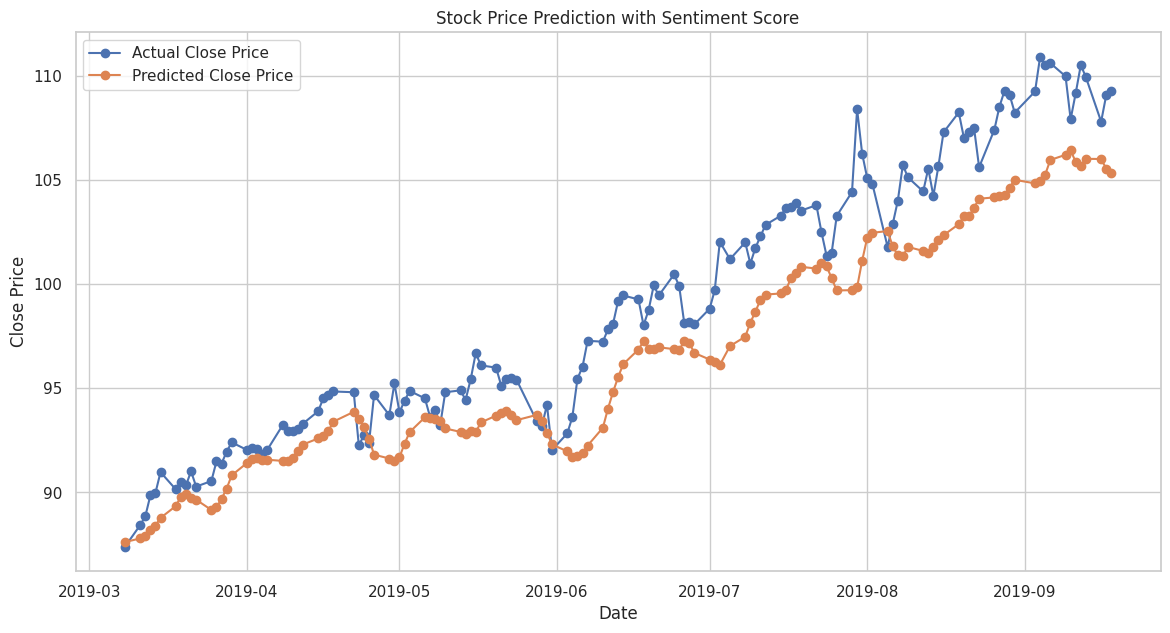

In [ ]:
# Plot the Actual Price and Predicted Price
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test_inverse, label='Actual Close Price', marker='o')
plt.plot(df.index[-len(y_test):], y_pred_inverse, label='Predicted Close Price', marker='o')
plt.title('Stock Price Prediction with Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


Training Loss and Validation Loss

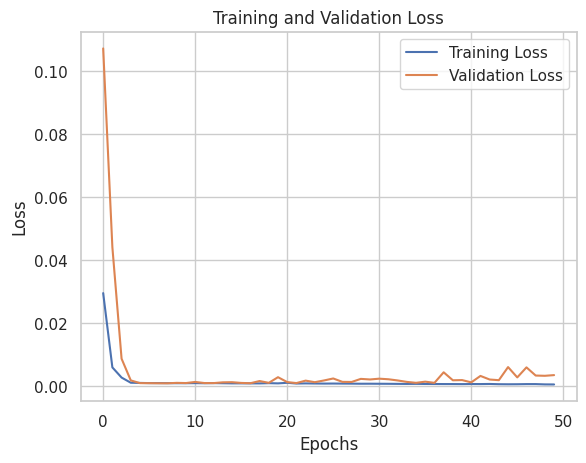

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Percentage of Correct Direction (PCD)

Percentage of Correct Direction (PCD): 49.25373134328358%


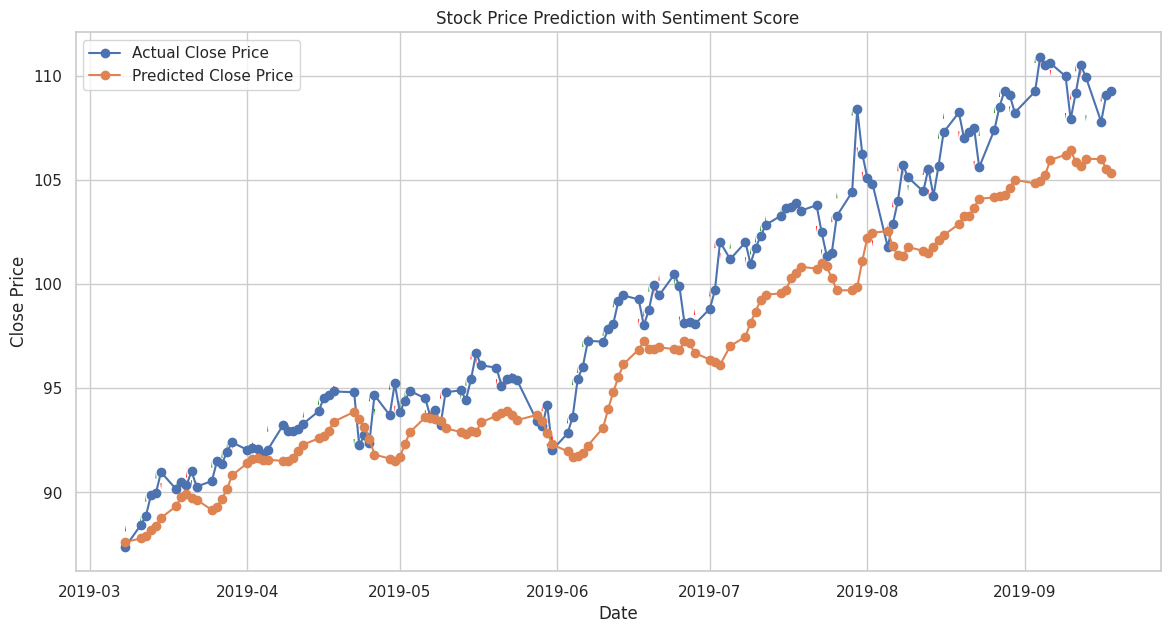

In [ ]:
# Calculate Percentage of Correct Direction (PCD)
pcd = np.mean(np.sign(y_pred_inverse[1:] - y_pred_inverse[:-1]) == np.sign(y_test_inverse[1:] - y_test_inverse[:-1])) * 100
print(f'Percentage of Correct Direction (PCD): {pcd}%')

# Plot the results with directional arrows
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test_inverse, label='Actual Close Price', marker='o')
plt.plot(df.index[-len(y_test):], y_pred_inverse, label='Predicted Close Price', marker='o')

# Add directional arrows to indicate correct and incorrect directions
for i in range(1, len(y_test_inverse)):
    actual_direction = np.sign(y_test_inverse[i] - y_test_inverse[i - 1])
    predicted_direction = np.sign(y_pred_inverse[i] - y_pred_inverse[i - 1])

    if actual_direction == predicted_direction:
        arrow_color = 'green'
    else:
        arrow_color = 'red'

    plt.arrow(df.index[-len(y_test) + i - 1], y_test_inverse[i - 1], 0, y_test_inverse[i] - y_test_inverse[i - 1],
              shape='full', lw=0, length_includes_head=True, head_width=0.2, color=arrow_color)

plt.title('Stock Price Prediction with Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# With Different Learning rates and Batch Sizes

5/5 [==============================] - 1s 7ms/step
Optimizer: Adam, Learning Rate: 0.1, Batch Size: 4
Mean Squared Error (MSE): 631.9447942921199
Root Mean Squared Error (RMSE): 25.138512173398805
R-squared (R^2): -14.677974077716389



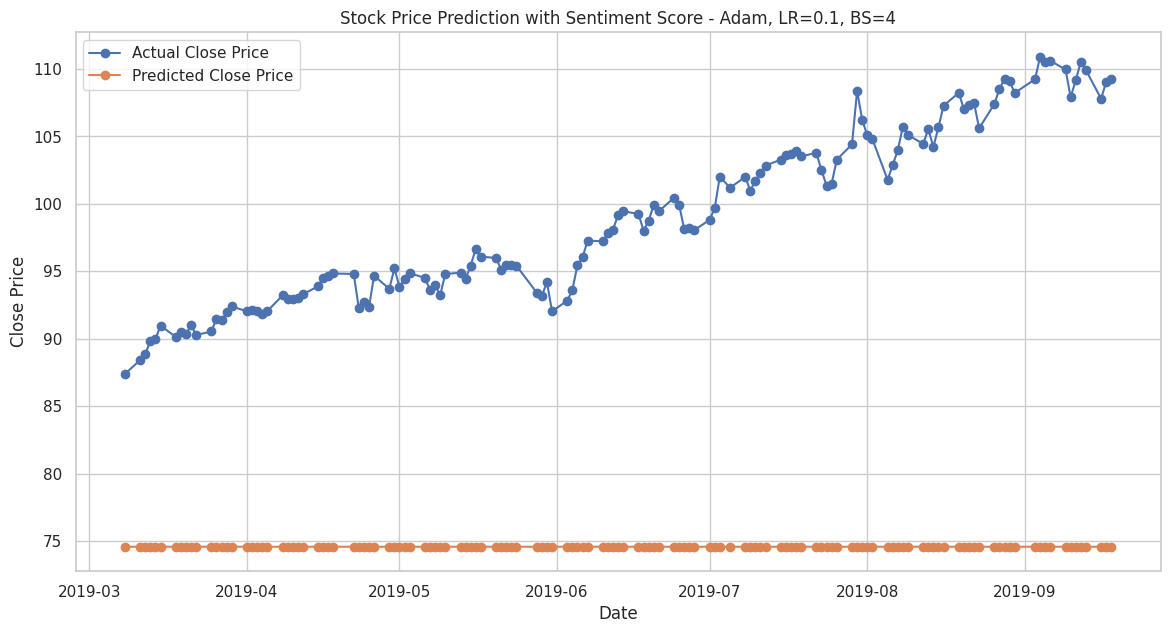

5/5 [==============================] - 1s 6ms/step
Optimizer: Adam, Learning Rate: 0.1, Batch Size: 8
Mean Squared Error (MSE): 1609.574649244931
Root Mean Squared Error (RMSE): 40.119504598697766
R-squared (R^2): -38.93207928119513



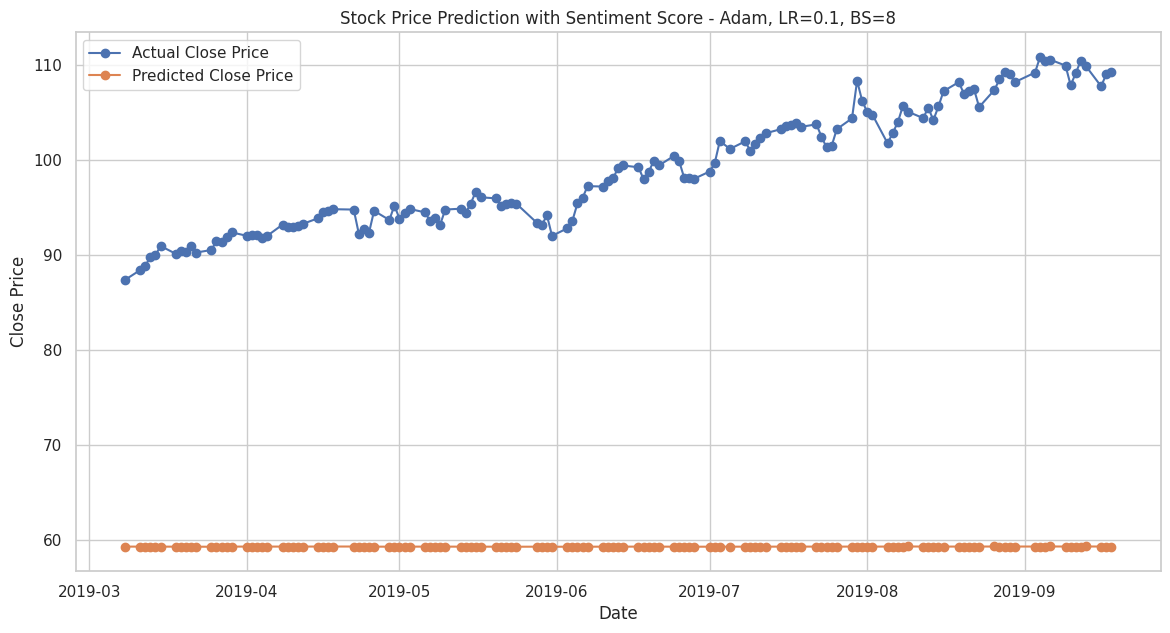

5/5 [==============================] - 1s 7ms/step
Optimizer: Adam, Learning Rate: 0.1, Batch Size: 16
Mean Squared Error (MSE): 807.218487988297
Root Mean Squared Error (RMSE): 28.411590733154963
R-squared (R^2): -19.026354586732847



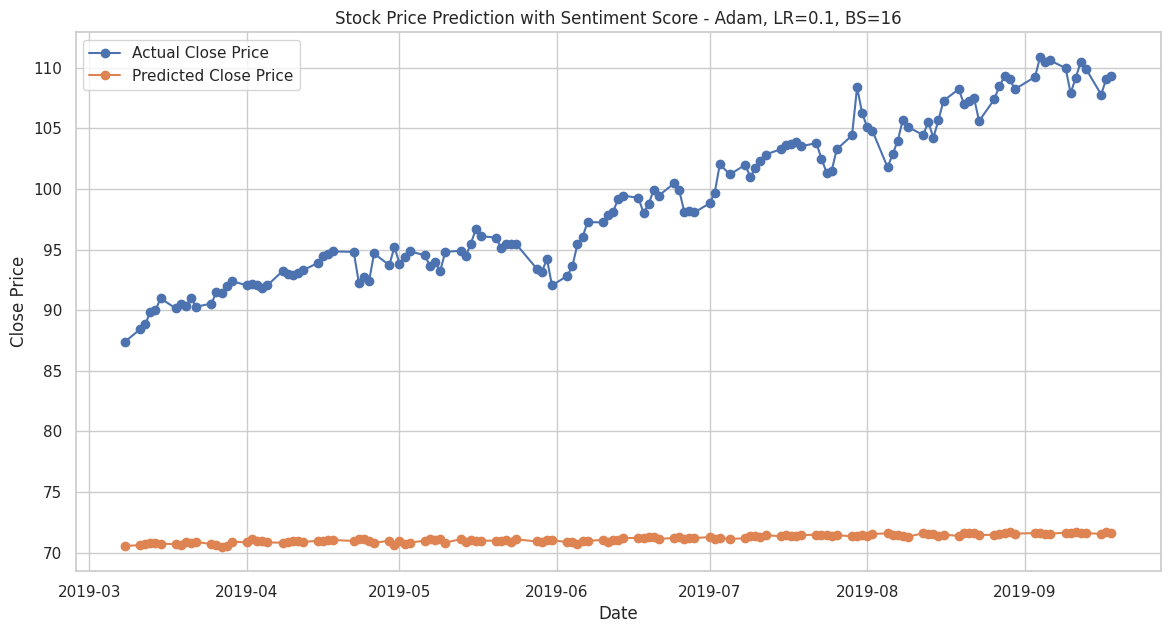

5/5 [==============================] - 1s 8ms/step
Optimizer: Adam, Learning Rate: 0.01, Batch Size: 4
Mean Squared Error (MSE): 6.544359047791345
Root Mean Squared Error (RMSE): 2.558194489828978
R-squared (R^2): 0.8376404198068084



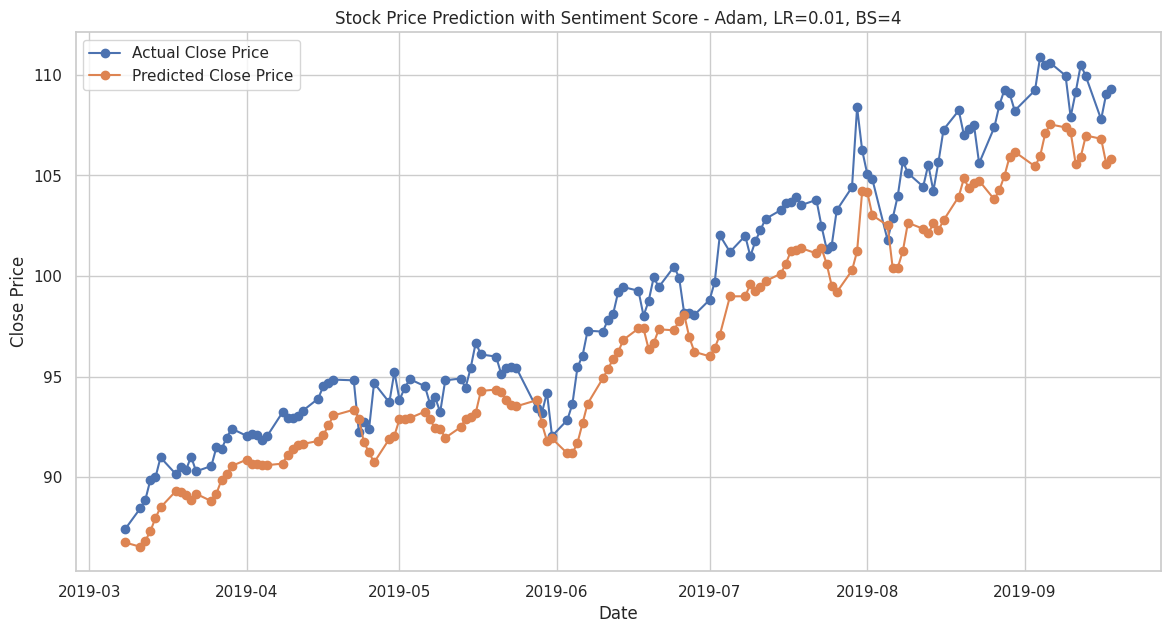

5/5 [==============================] - 1s 6ms/step
Optimizer: Adam, Learning Rate: 0.01, Batch Size: 8
Mean Squared Error (MSE): 2.820382209871184
Root Mean Squared Error (RMSE): 1.6793993598519632
R-squared (R^2): 0.9300288892716585



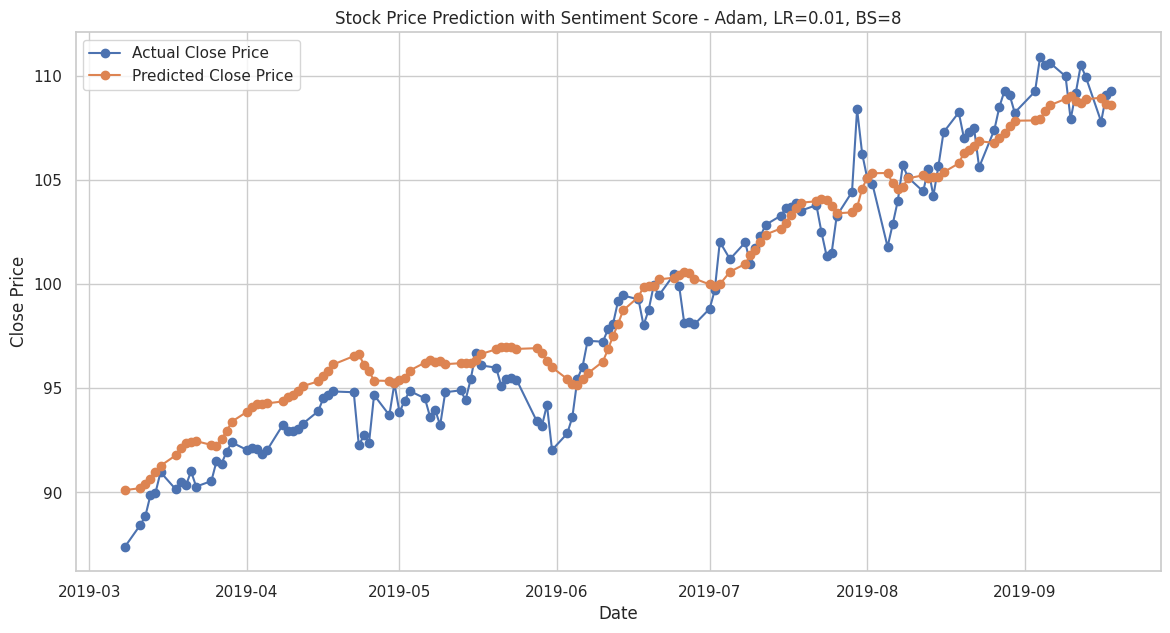

5/5 [==============================] - 1s 7ms/step
Optimizer: Adam, Learning Rate: 0.01, Batch Size: 16
Mean Squared Error (MSE): 14.202090049222582
Root Mean Squared Error (RMSE): 3.768566046817089
R-squared (R^2): 0.6476590967245475



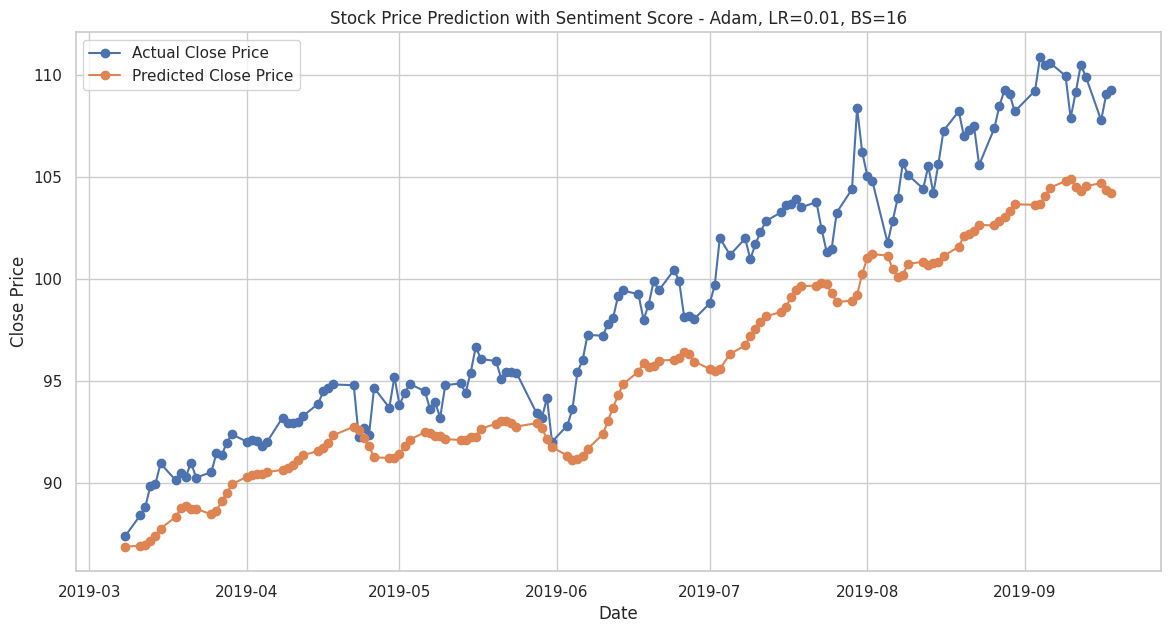

5/5 [==============================] - 1s 7ms/step
Optimizer: Adam, Learning Rate: 0.001, Batch Size: 4
Mean Squared Error (MSE): 12.027722416416328
Root Mean Squared Error (RMSE): 3.4681006929465483
R-squared (R^2): 0.7016031748947743



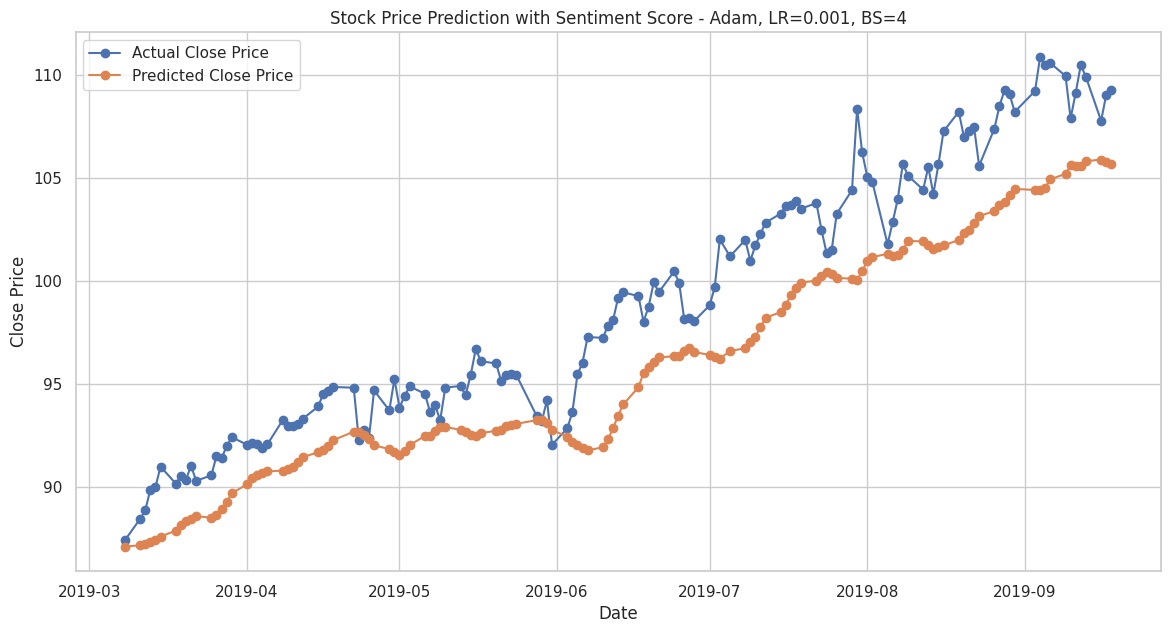

5/5 [==============================] - 1s 7ms/step
Optimizer: Adam, Learning Rate: 0.001, Batch Size: 8
Mean Squared Error (MSE): 5.250048103191537
Root Mean Squared Error (RMSE): 2.2912983444308463
R-squared (R^2): 0.8697510940638389



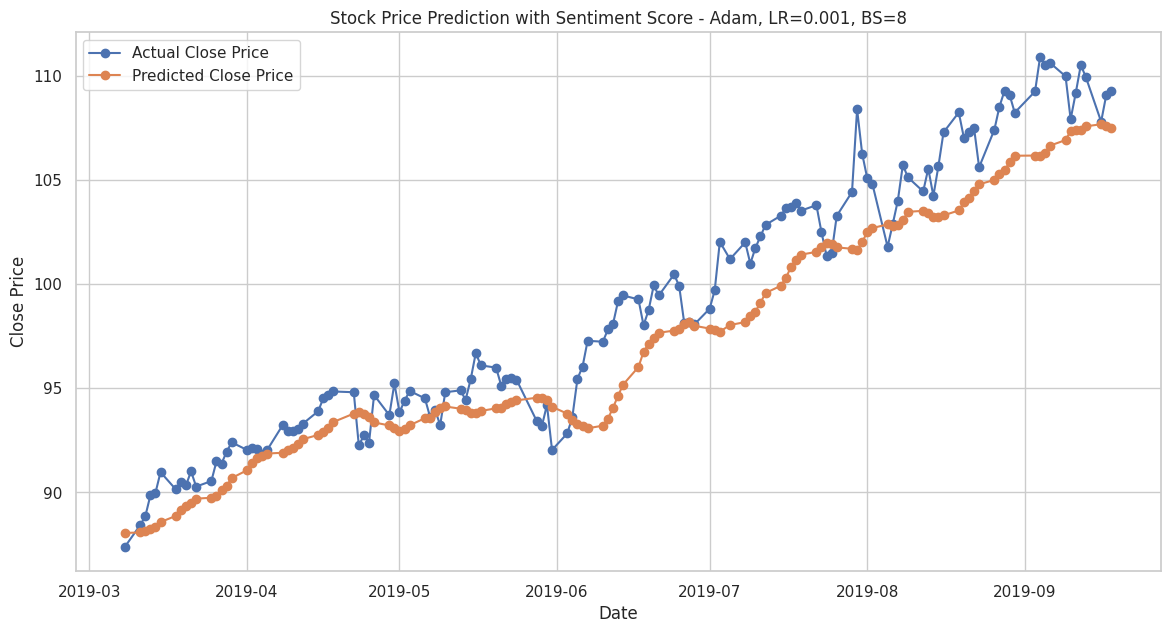

5/5 [==============================] - 1s 7ms/step
Optimizer: Adam, Learning Rate: 0.001, Batch Size: 16
Mean Squared Error (MSE): 2.138929133213257
Root Mean Squared Error (RMSE): 1.4625078232998472
R-squared (R^2): 0.9469351186884079



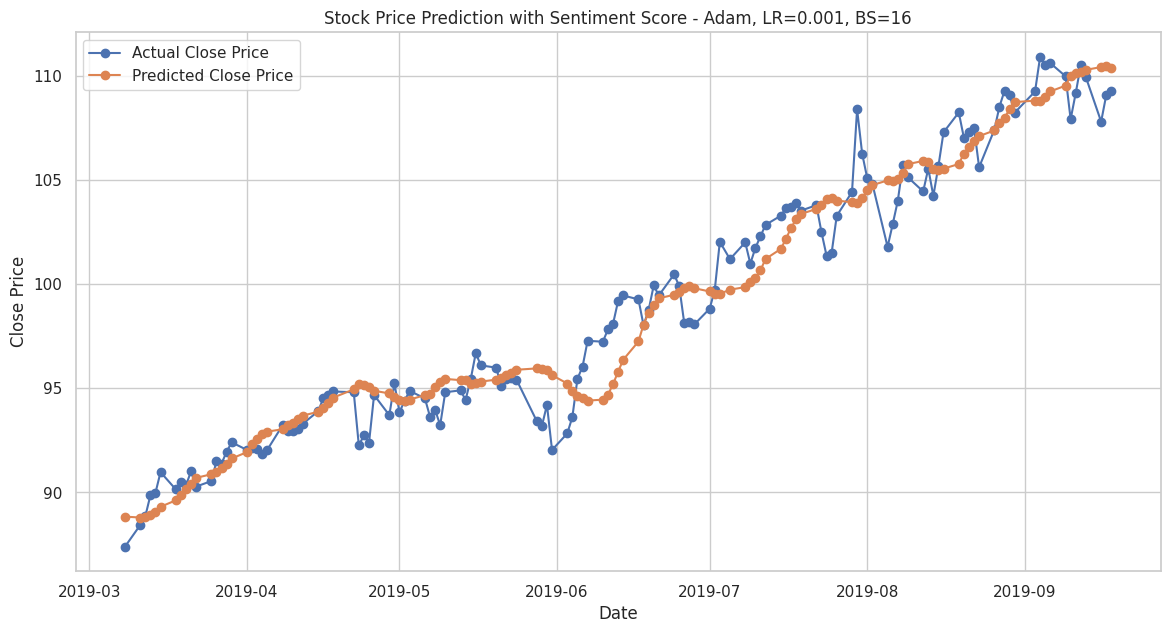

5/5 [==============================] - 1s 8ms/step
Optimizer: Adagrad, Learning Rate: 0.1, Batch Size: 4
Mean Squared Error (MSE): 13.958295847493492
Root Mean Squared Error (RMSE): 3.736080278512962
R-squared (R^2): 0.653707408554203



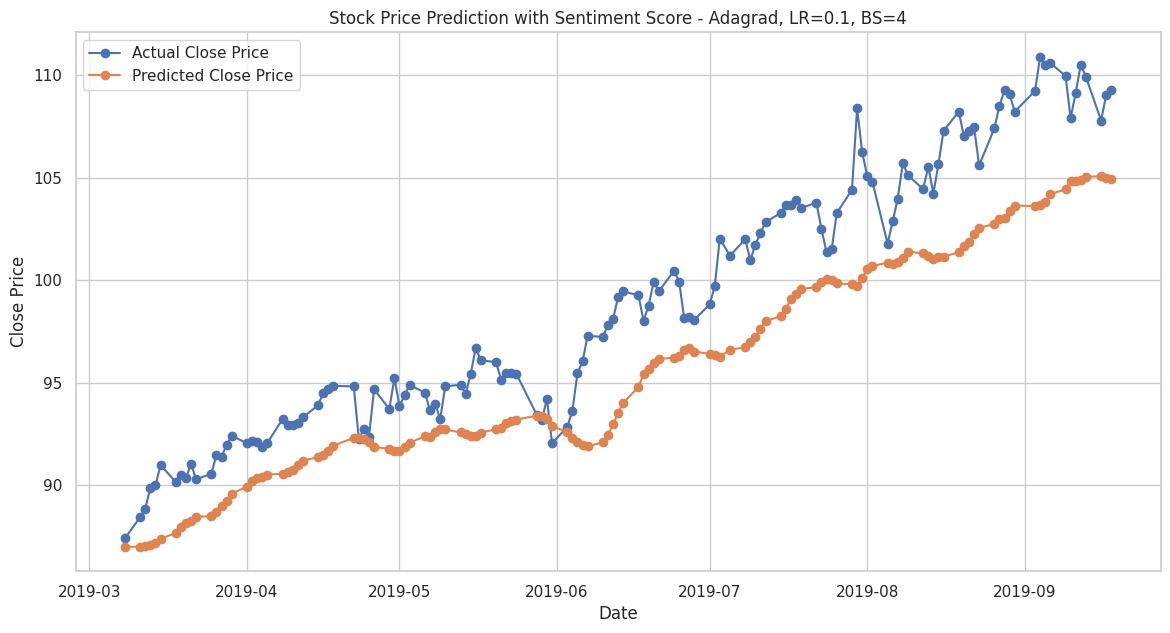

5/5 [==============================] - 1s 8ms/step
Optimizer: Adagrad, Learning Rate: 0.1, Batch Size: 8
Mean Squared Error (MSE): 15.203764895141534
Root Mean Squared Error (RMSE): 3.8992005456428545
R-squared (R^2): 0.622808457221758



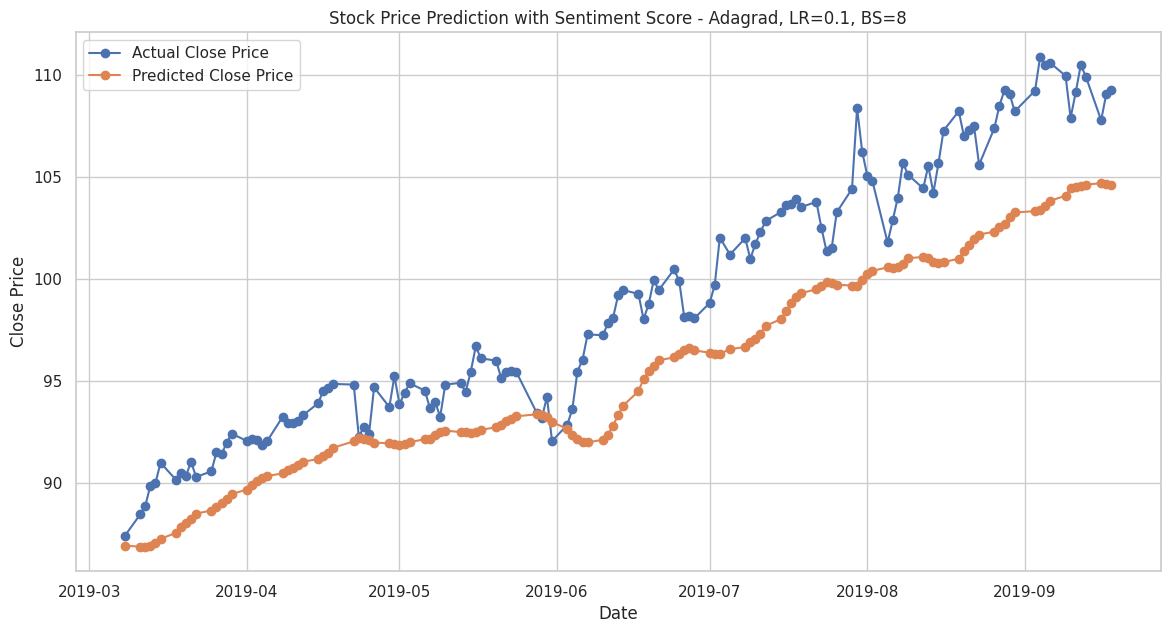

5/5 [==============================] - 1s 7ms/step
Optimizer: Adagrad, Learning Rate: 0.1, Batch Size: 16
Mean Squared Error (MSE): 26.781260979404674
Root Mean Squared Error (RMSE): 5.1750614469206715
R-squared (R^2): 0.33558133685713376



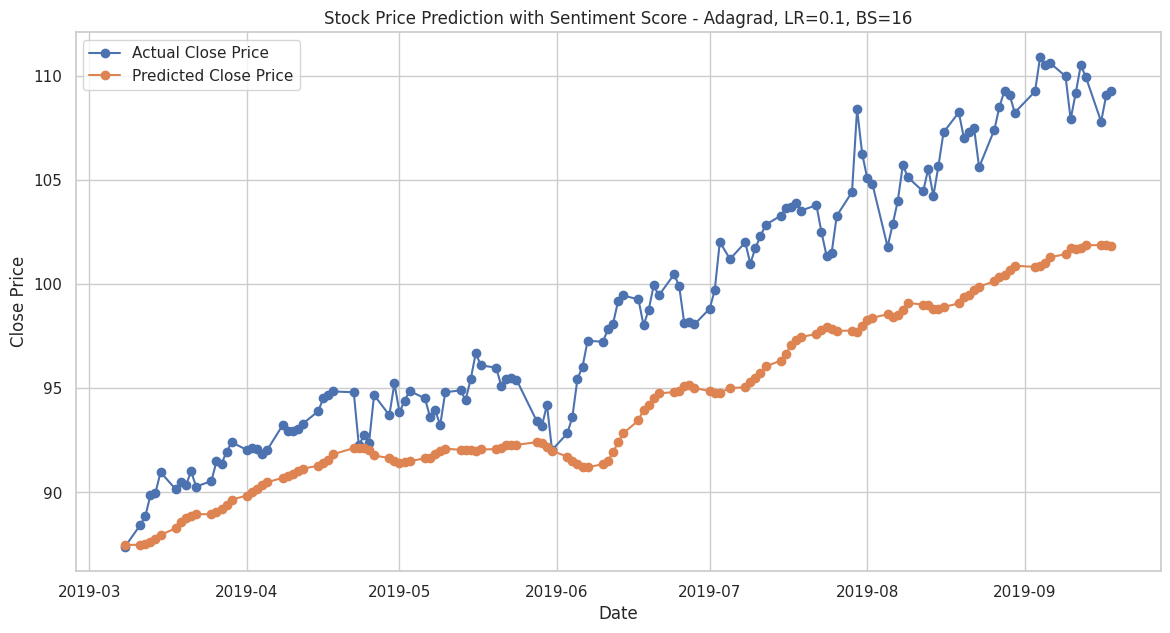

5/5 [==============================] - 1s 10ms/step
Optimizer: Adagrad, Learning Rate: 0.01, Batch Size: 4
Mean Squared Error (MSE): 130.0620234319188
Root Mean Squared Error (RMSE): 11.404473834066996
R-squared (R^2): -2.226720198154485



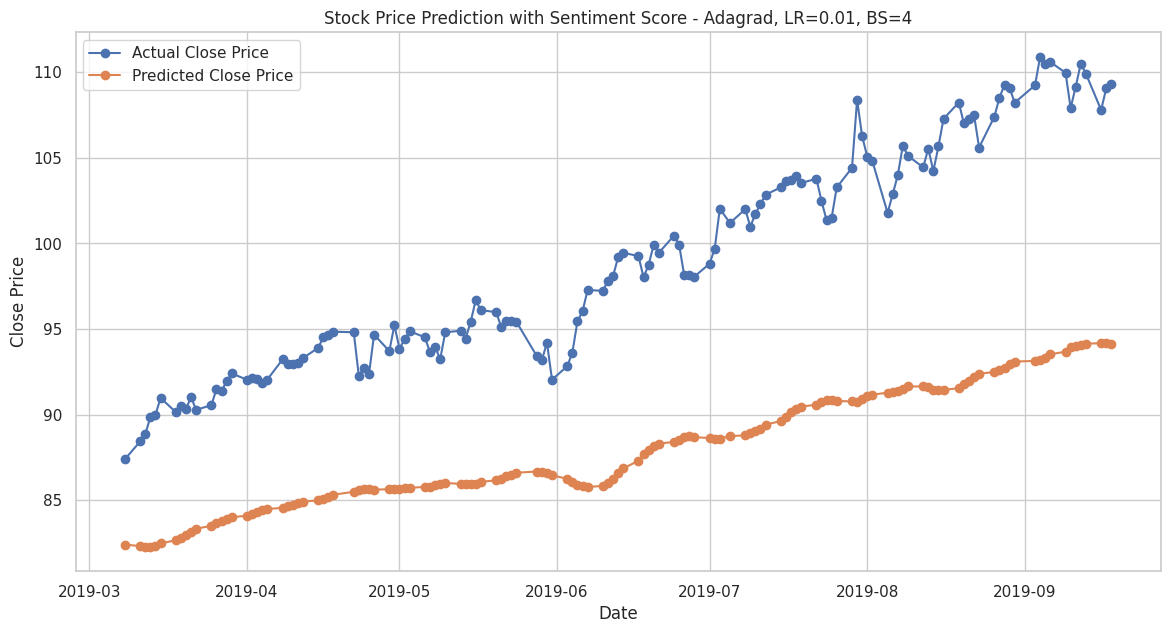

5/5 [==============================] - 1s 8ms/step
Optimizer: Adagrad, Learning Rate: 0.01, Batch Size: 8
Mean Squared Error (MSE): 317.13604228987526
Root Mean Squared Error (RMSE): 17.808313853082083
R-squared (R^2): -6.8678560137515365



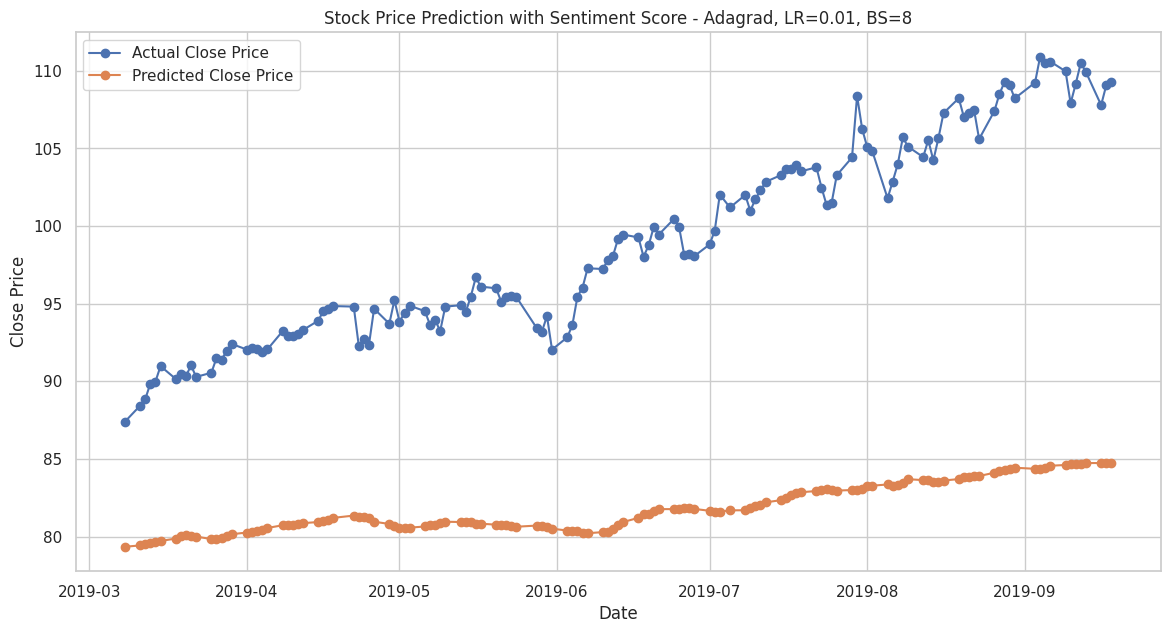

5/5 [==============================] - 1s 7ms/step
Optimizer: Adagrad, Learning Rate: 0.01, Batch Size: 16
Mean Squared Error (MSE): 500.9985284647553
Root Mean Squared Error (RMSE): 22.382996413902124
R-squared (R^2): -11.429316632069035



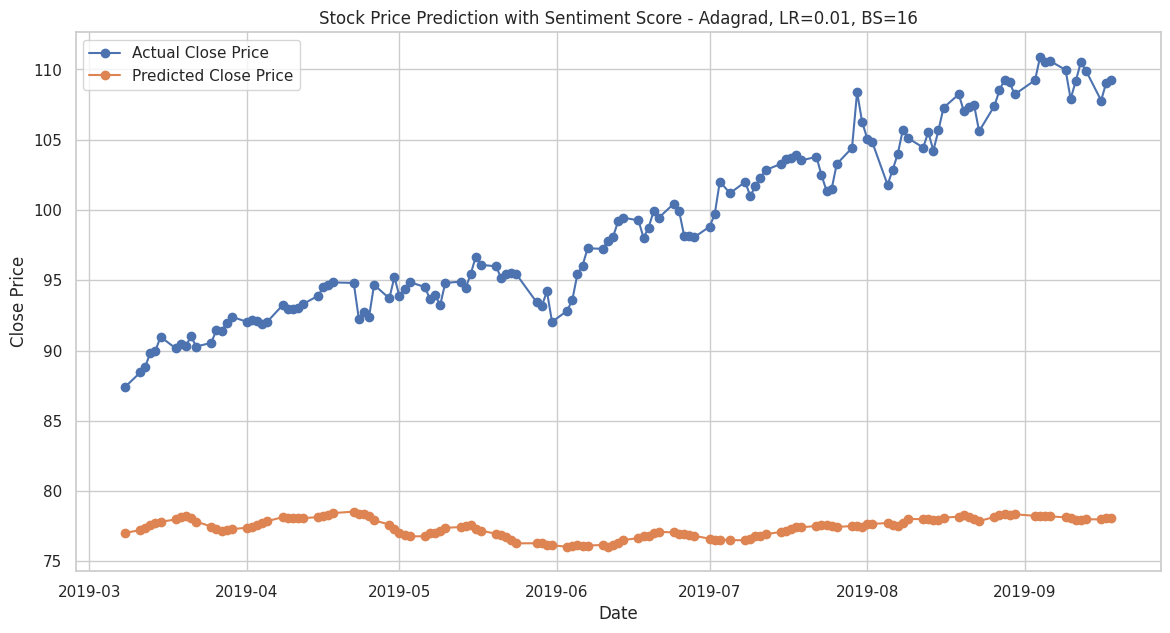

5/5 [==============================] - 1s 7ms/step
Optimizer: Adagrad, Learning Rate: 0.001, Batch Size: 4
Mean Squared Error (MSE): 475.4217888417451
Root Mean Squared Error (RMSE): 21.804169070197222
R-squared (R^2): -10.794781045378697



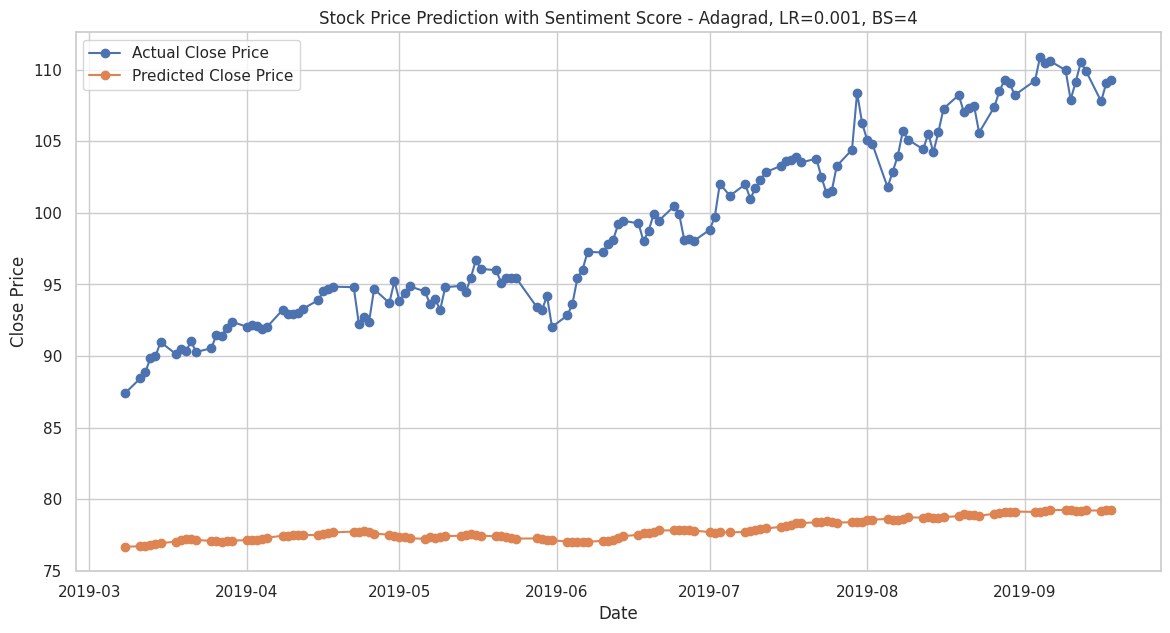

5/5 [==============================] - 1s 14ms/step
Optimizer: Adagrad, Learning Rate: 0.001, Batch Size: 8
Mean Squared Error (MSE): 530.3972451321823
Root Mean Squared Error (RMSE): 23.030354863357672
R-squared (R^2): -12.158671983981293



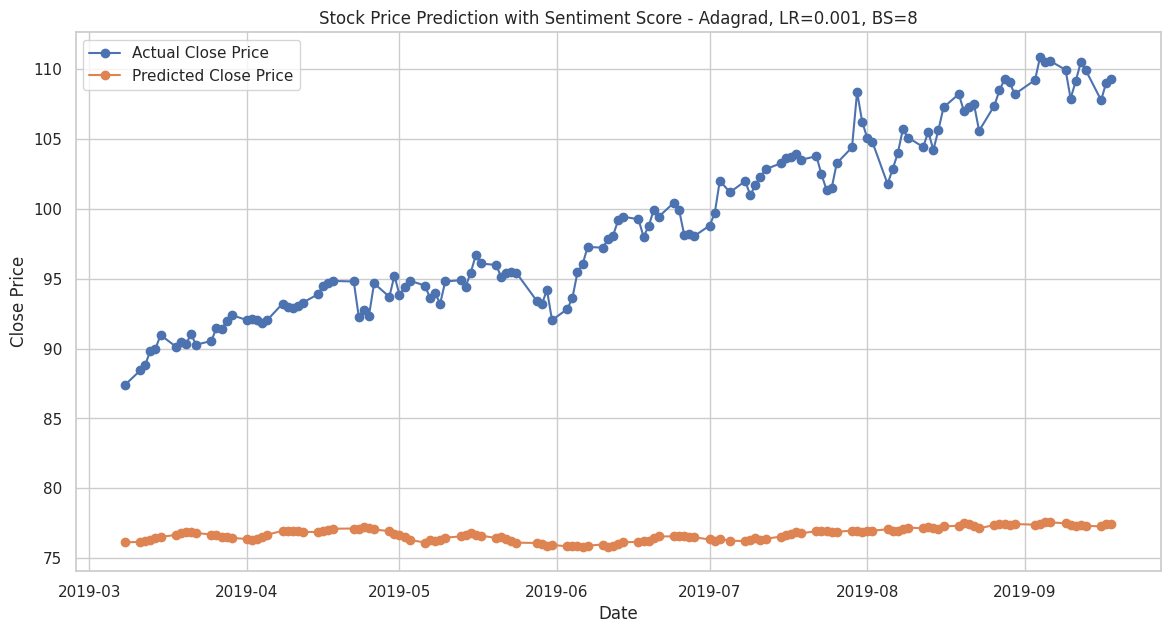

5/5 [==============================] - 1s 10ms/step
Optimizer: Adagrad, Learning Rate: 0.001, Batch Size: 16
Mean Squared Error (MSE): 583.5128892892072
Root Mean Squared Error (RMSE): 24.156011452415054
R-squared (R^2): -13.47642267951136



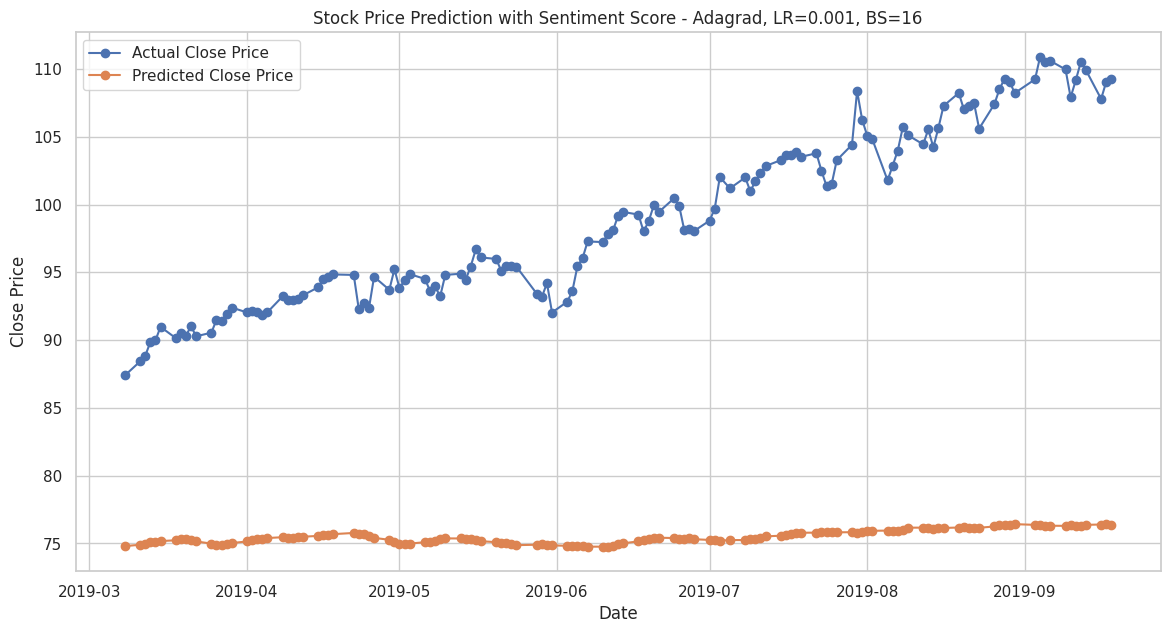

5/5 [==============================] - 1s 6ms/step
Optimizer: Nadam, Learning Rate: 0.1, Batch Size: 4
Mean Squared Error (MSE): 193.47450009853705
Root Mean Squared Error (RMSE): 13.909511138014055
R-squared (R^2): -3.7999259185951093



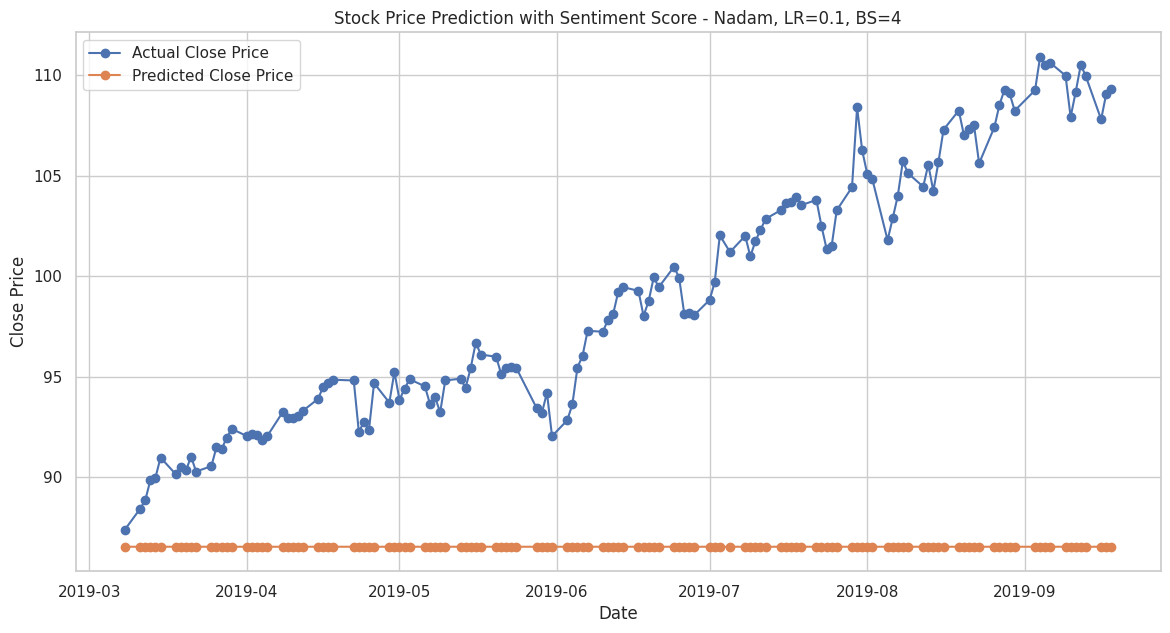

5/5 [==============================] - 1s 8ms/step
Optimizer: Nadam, Learning Rate: 0.1, Batch Size: 8
Mean Squared Error (MSE): 683.3650354913347
Root Mean Squared Error (RMSE): 26.14125160529493
R-squared (R^2): -15.953663371896347



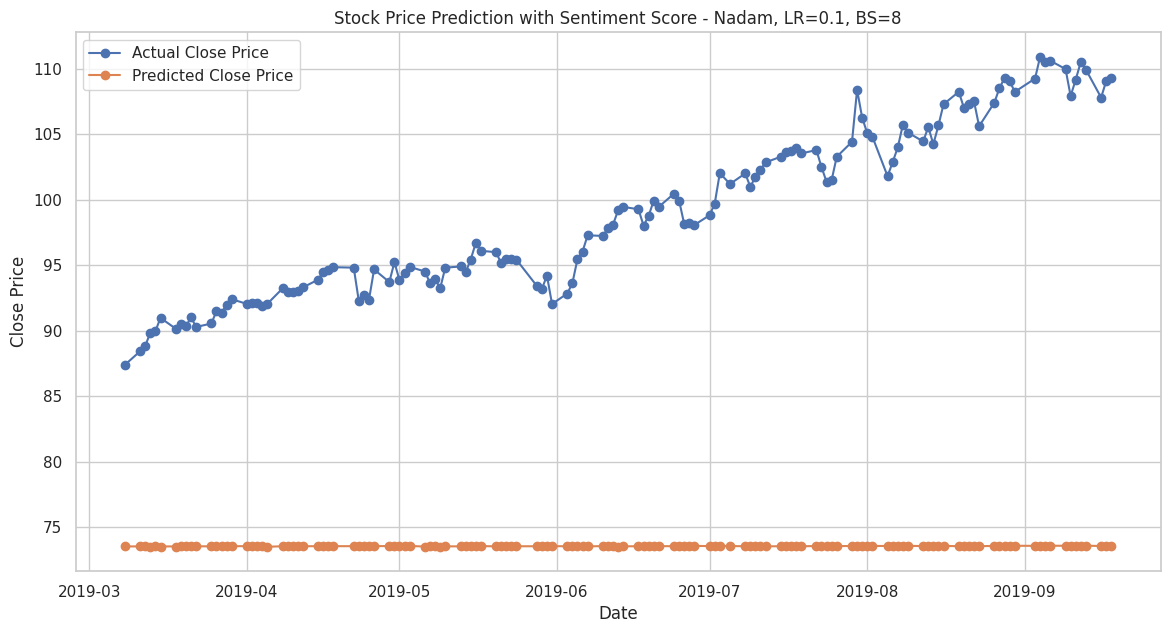

5/5 [==============================] - 1s 7ms/step
Optimizer: Nadam, Learning Rate: 0.1, Batch Size: 16
Mean Squared Error (MSE): 522.1398346833163
Root Mean Squared Error (RMSE): 22.850379311585097
R-squared (R^2): -11.953813160654168



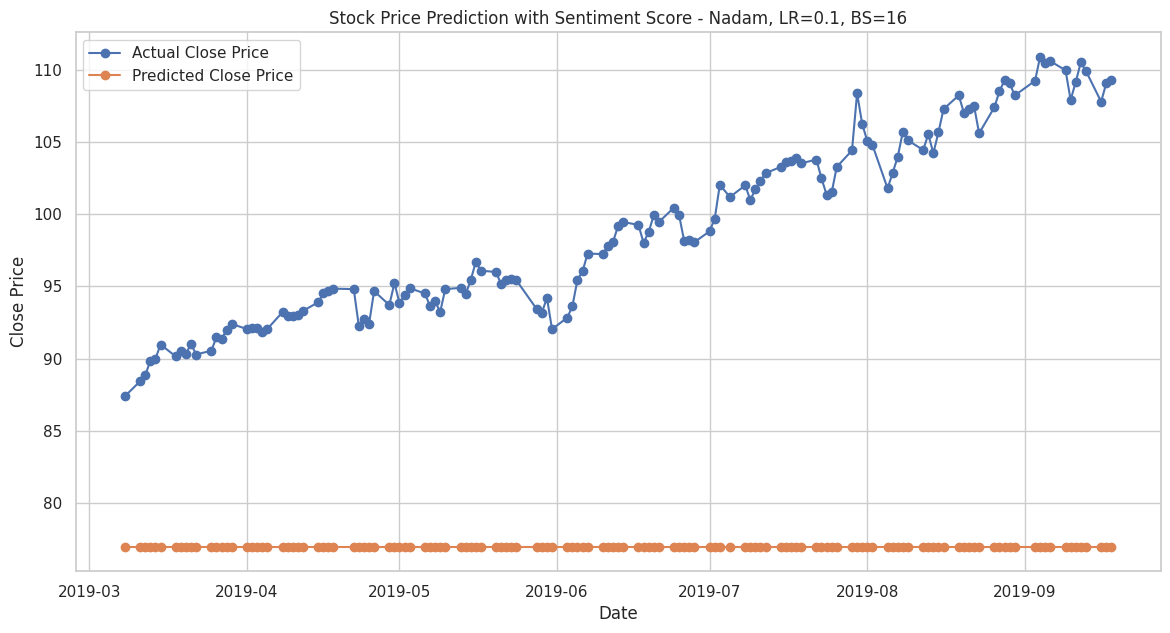

5/5 [==============================] - 1s 6ms/step
Optimizer: Nadam, Learning Rate: 0.01, Batch Size: 4
Mean Squared Error (MSE): 1.2761970025245029
Root Mean Squared Error (RMSE): 1.1296888963446985
R-squared (R^2): 0.9683387161278053



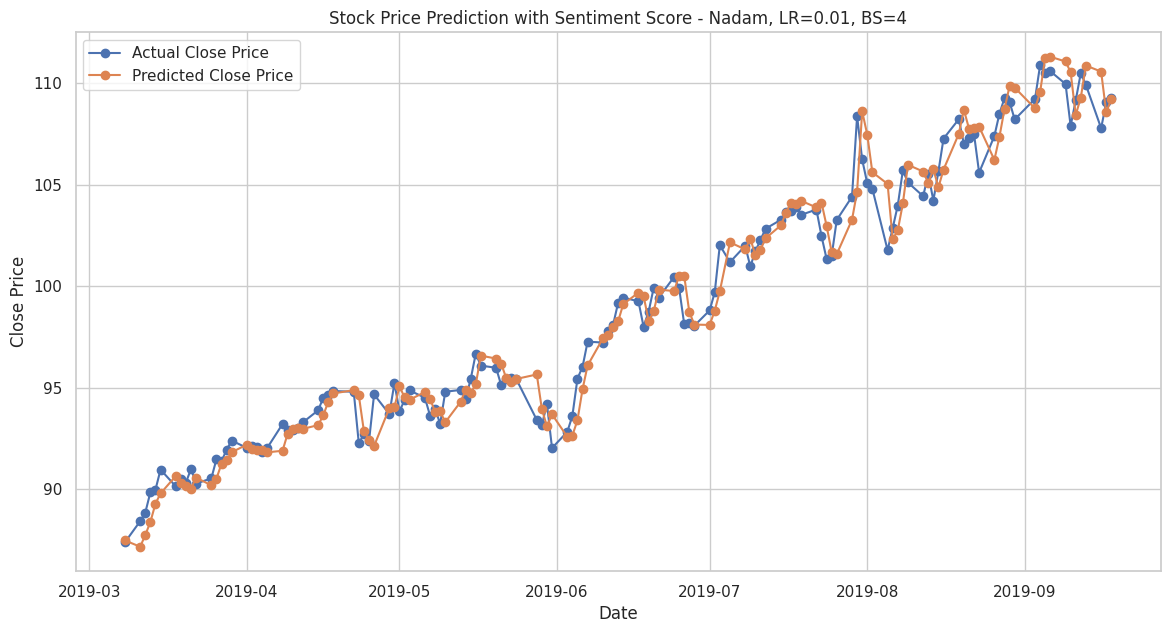

5/5 [==============================] - 1s 7ms/step
Optimizer: Nadam, Learning Rate: 0.01, Batch Size: 8
Mean Squared Error (MSE): 8.85022031610534
Root Mean Squared Error (RMSE): 2.974931985122574
R-squared (R^2): 0.780434104448309



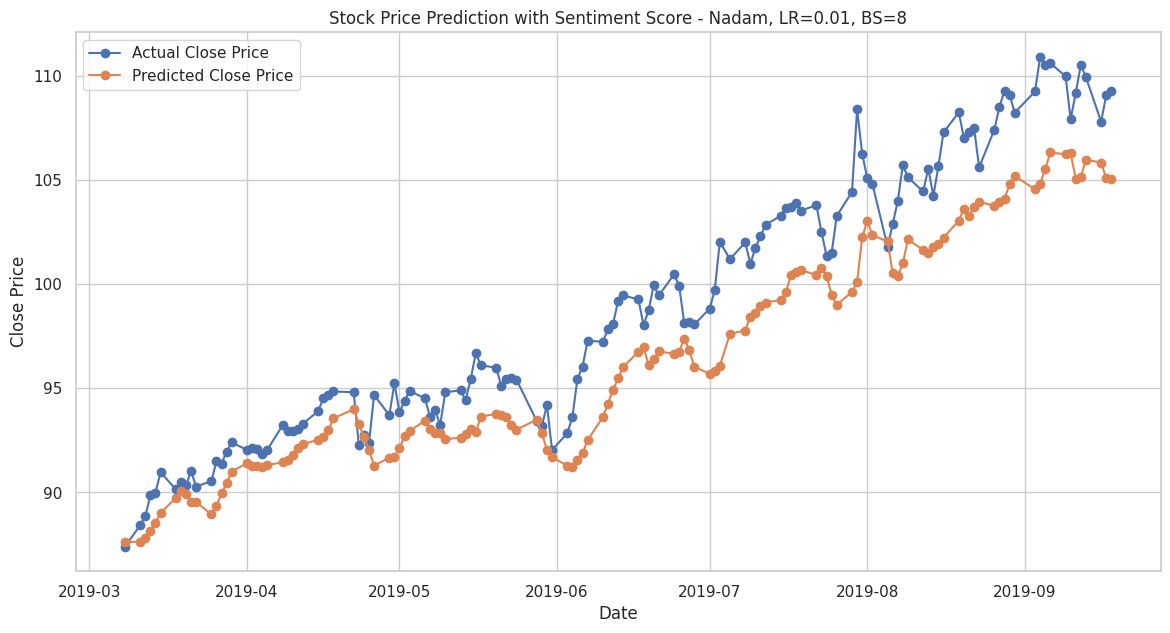

5/5 [==============================] - 1s 7ms/step
Optimizer: Nadam, Learning Rate: 0.01, Batch Size: 16
Mean Squared Error (MSE): 1.8549423997771286
Root Mean Squared Error (RMSE): 1.3619627013164233
R-squared (R^2): 0.953980570578259



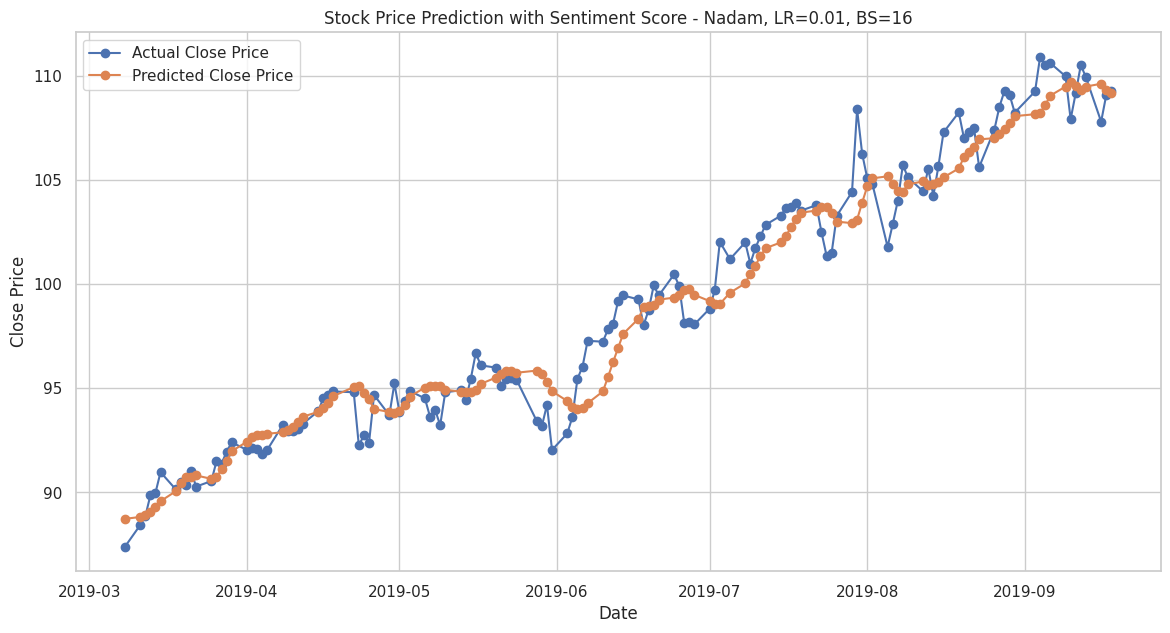

5/5 [==============================] - 1s 9ms/step
Optimizer: Nadam, Learning Rate: 0.001, Batch Size: 4
Mean Squared Error (MSE): 2.4224248930751857
Root Mean Squared Error (RMSE): 1.5564141136198892
R-squared (R^2): 0.9399018474052153



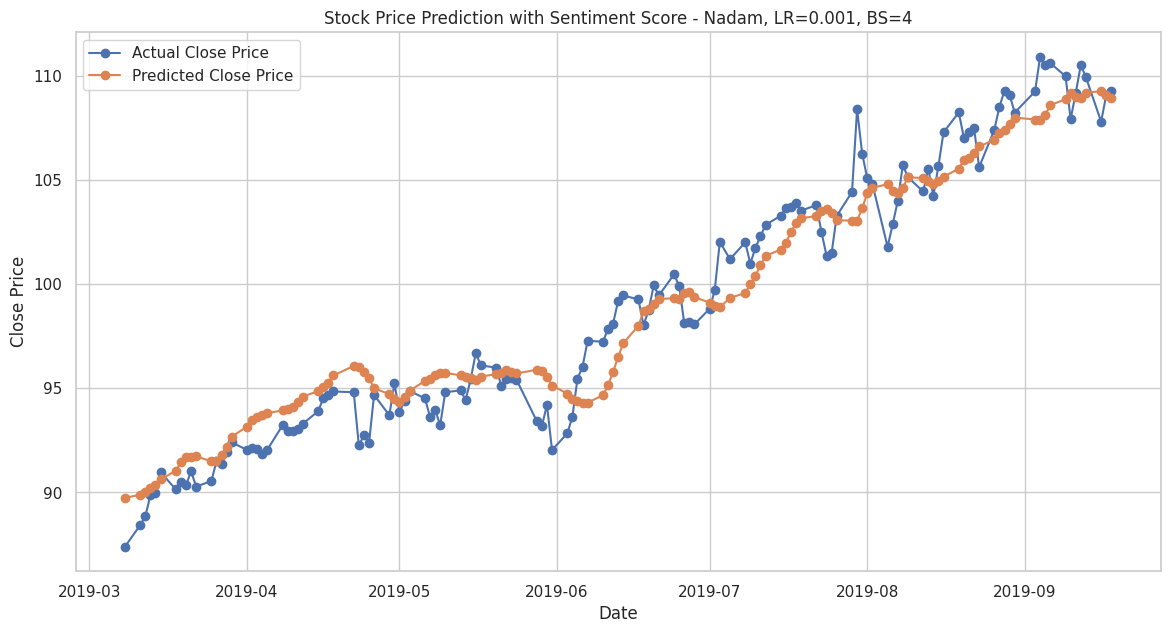

5/5 [==============================] - 1s 8ms/step
Optimizer: Nadam, Learning Rate: 0.001, Batch Size: 8
Mean Squared Error (MSE): 23.018464149995904
Root Mean Squared Error (RMSE): 4.7977561578300225
R-squared (R^2): 0.42893289491097575



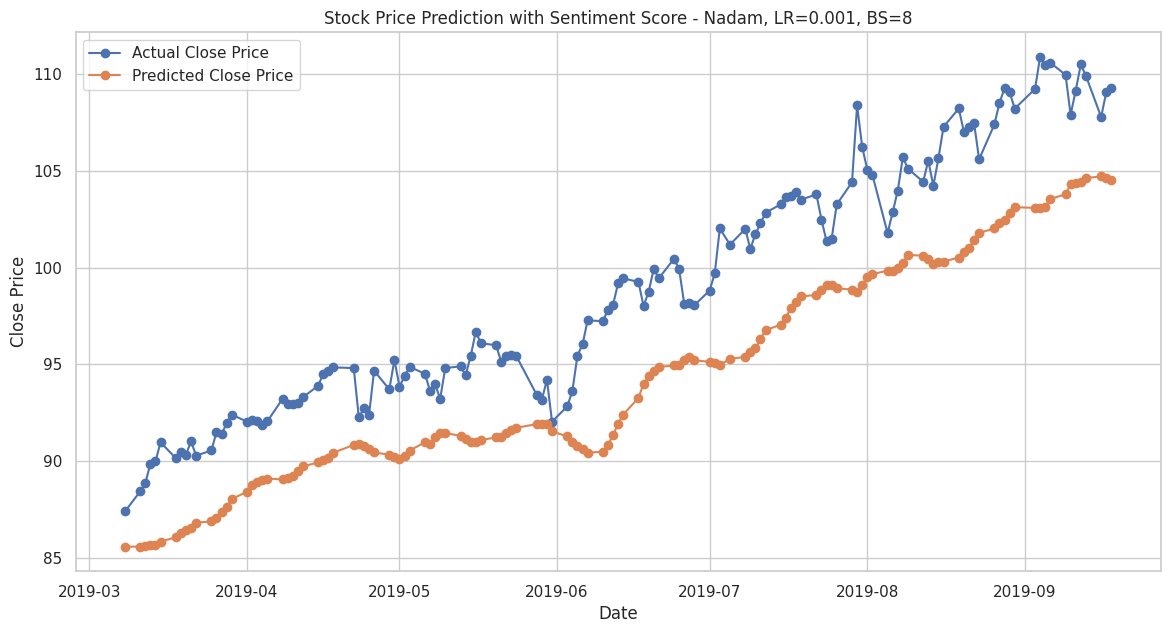

5/5 [==============================] - 1s 9ms/step
Optimizer: Nadam, Learning Rate: 0.001, Batch Size: 16
Mean Squared Error (MSE): 2.274838280657948
Root Mean Squared Error (RMSE): 1.5082567025072184
R-squared (R^2): 0.9435633366754724



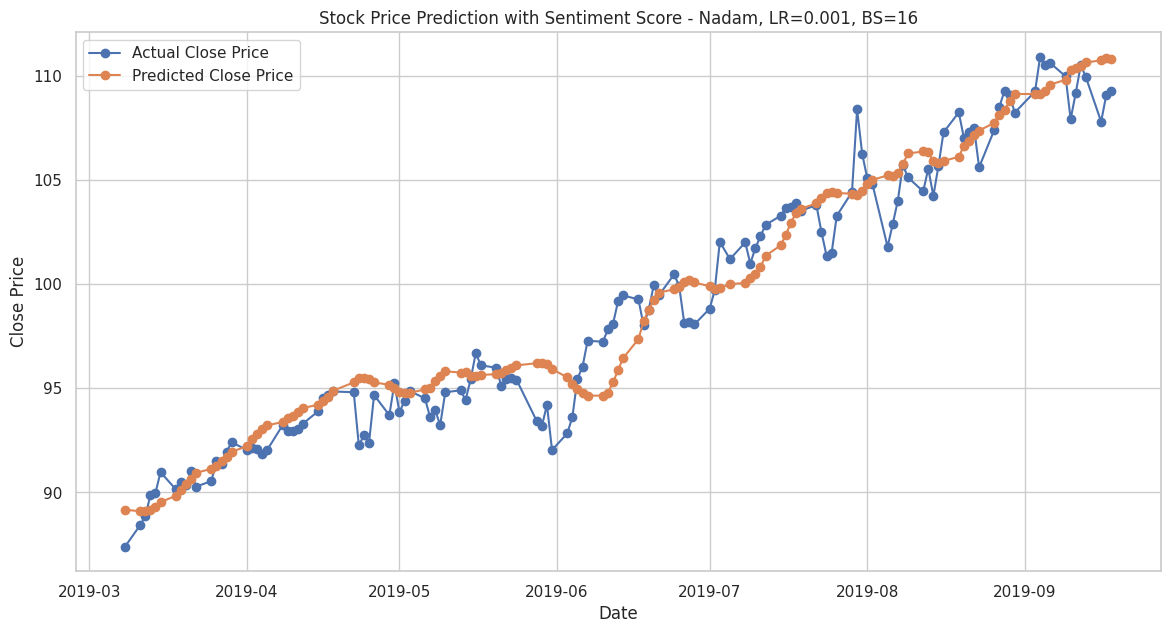

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam, Adagrad, Nadam
import matplotlib.pyplot as plt

df = final_df

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by Date
df = df.sort_values(by='Date')

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Feature selection
features = ['Adj Close', 'final_sentiment_score']
df = df[features]

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Function to create time series data
def create_time_series_data(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Set the time steps
time_steps = 10

# Create time series data
X, y = create_time_series_data(df_scaled, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define hyperparameters
optimizer_names = ['Adam', 'Adagrad', 'Nadam']
learning_rates = [0.1, 0.01, 0.001]
batch_sizes = [4, 8, 16]

# Iterate through different hyperparameters
for optimizer_name in optimizer_names:
    for learning_rate in learning_rates:
        for batch_size in batch_sizes:
            # Build the LSTM model
            model = Sequential()
            if optimizer_name == 'Adam':
                optimizer = Adam(learning_rate=learning_rate)
            elif optimizer_name == 'Adagrad':
                optimizer = Adagrad(learning_rate=learning_rate)
            elif optimizer_name == 'Nadam':
                optimizer = Nadam(learning_rate=learning_rate)

            model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
            model.add(LSTM(units=50))
            model.add(Dense(units=1))
            model.compile(optimizer=optimizer, loss='mean_squared_error')

            # Train the model and record training and validation loss
            history = model.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

            # Make predictions
            y_pred = model.predict(X_test)

            # Invert predictions to original scale
            y_pred_inverse = scaler.inverse_transform(np.concatenate((y_pred, X_test[:, -1, 1:]), axis=1))[:, 0]

            # Invert actual values to original scale
            y_test_inverse = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

            # Evaluate the model
            mse = mean_squared_error(y_test_inverse, y_pred_inverse)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test_inverse, y_pred_inverse)

            # Print evaluation metrics
            print(f'Optimizer: {optimizer_name}, Learning Rate: {learning_rate}, Batch Size: {batch_size}')
            print(f'Mean Squared Error (MSE): {mse}')
            print(f'Root Mean Squared Error (RMSE): {rmse}')
            print(f'R-squared (R^2): {r2}\n')

            # Plot the Actual Price and Predicted Price
            plt.figure(figsize=(14, 7))
            plt.plot(df.index[-len(y_test):], y_test_inverse, label='Actual Close Price', marker='o')
            plt.plot(df.index[-len(y_test):], y_pred_inverse, label='Predicted Close Price', marker='o')
            plt.title(f'Stock Price Prediction with Sentiment Score - {optimizer_name}, LR={learning_rate}, BS={batch_size}')
            plt.xlabel('Date')
            plt.ylabel('Close Price')
            plt.legend()
            plt.show()


#Cross Validation

With 10 Ephocs

In [ ]:
# Import necessary libraries
from sklearn.model_selection import KFold

# Define number of folds
num_folds = 6
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
mse_scores, rmse_scores, r2_scores = [], [], []

# Initialize lists to store training and validation loss for each fold
train_losses, val_losses = [], []

# Perform 5-fold cross-validation
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model and record training and validation loss
    history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), verbose=0)

    # Evaluate the model on validation set
    val_loss = model.evaluate(X_val, y_val)

    # Record training and validation loss for this fold
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])

    # Make predictions
    y_pred = model.predict(X_val)

    # Invert predictions to original scale
    y_pred_inverse = scaler.inverse_transform(np.concatenate((y_pred, X_val[:, -1, 1:]), axis=1))[:, 0]

    # Invert actual values to original scale
    y_val_inverse = scaler.inverse_transform(np.concatenate((y_val.reshape(-1, 1), X_val[:, -1, 1:]), axis=1))[:, 0]

    # Calculate evaluation metrics
    mse = mean_squared_error(y_val_inverse, y_pred_inverse)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val_inverse, y_pred_inverse)

    # Record evaluation metrics for this fold
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)


5/5 [==============================] - 1s 8ms/step


In [ ]:
# Display evaluation metrics
print(f'Mean MSE: {np.mean(mse_scores)}')
print(f'Mean RMSE: {np.mean(rmse_scores)}')
print(f'Mean R^2: {np.mean(r2_scores)}')


Mean MSE: 2.4476822280738855
Mean RMSE: 1.5538999224860366
Mean R^2: 0.9812990232153389


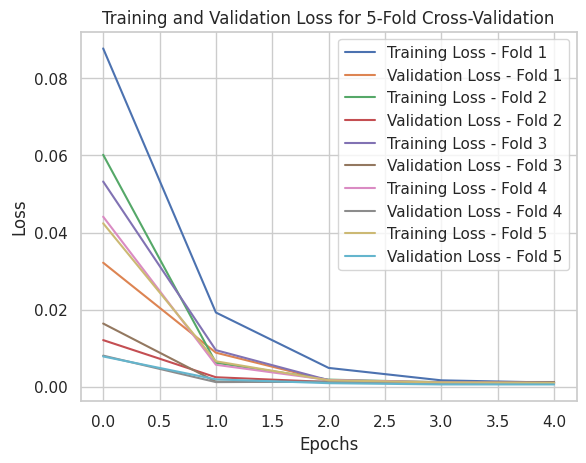

In [ ]:
# Plot training and validation loss for each fold
for i in range(num_folds):
    plt.plot(train_losses[i], label=f'Training Loss - Fold {i + 1}')
    plt.plot(val_losses[i], label=f'Validation Loss - Fold {i + 1}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for 5-Fold Cross-Validation')
plt.legend()
plt.show()

With 10 Ephocs

In [ ]:
# Import necessary libraries
from sklearn.model_selection import KFold

# Define number of folds
num_folds = 6
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
mse_scores, rmse_scores, r2_scores = [], [], []

# Initialize lists to store training and validation loss for each fold
train_losses, val_losses = [], []

# Perform 5-fold cross-validation
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model and record training and validation loss
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)

    # Evaluate the model on validation set
    val_loss = model.evaluate(X_val, y_val)

    # Record training and validation loss for this fold
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])

    # Make predictions
    y_pred = model.predict(X_val)

    # Invert predictions to original scale
    y_pred_inverse = scaler.inverse_transform(np.concatenate((y_pred, X_val[:, -1, 1:]), axis=1))[:, 0]

    # Invert actual values to original scale
    y_val_inverse = scaler.inverse_transform(np.concatenate((y_val.reshape(-1, 1), X_val[:, -1, 1:]), axis=1))[:, 0]

    # Calculate evaluation metrics
    mse = mean_squared_error(y_val_inverse, y_pred_inverse)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val_inverse, y_pred_inverse)

    # Record evaluation metrics for this fold
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)


5/5 [==============================] - 1s 7ms/step


In [ ]:
# Display evaluation metrics
print(f'Mean MSE: {np.mean(mse_scores)}')
print(f'Mean RMSE: {np.mean(rmse_scores)}')
print(f'Mean R^2: {np.mean(r2_scores)}')


Mean MSE: 2.2224864089970042
Mean RMSE: 1.4799384594568388
Mean R^2: 0.9830162556907478


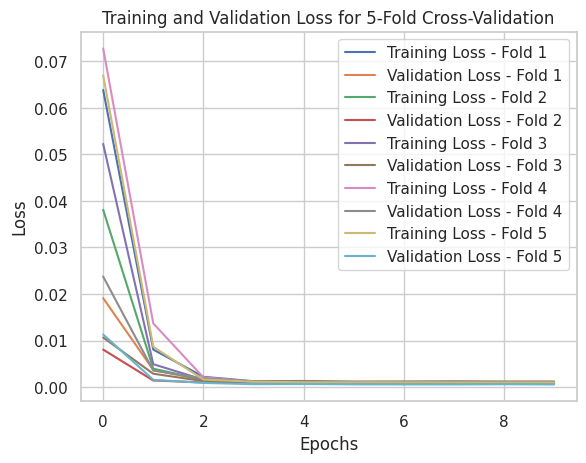

In [ ]:
# Plot training and validation loss for each fold
for i in range(num_folds):
    plt.plot(train_losses[i], label=f'Training Loss - Fold {i + 1}')
    plt.plot(val_losses[i], label=f'Validation Loss - Fold {i + 1}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for 5-Fold Cross-Validation')
plt.legend()
plt.show()

# Diagnosis of Model

## QQ Plot (Quantile-Quantile Plot)

This plot compares the quantiles of the residuals with the quantiles of a theoretical normal distribution. Deviations from a straight line might indicate non-normality.

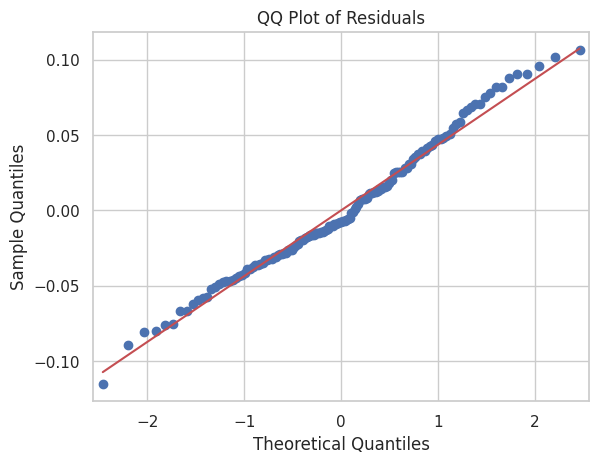

In [ ]:
import statsmodels.api as sm

# Create QQ plot
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()
